# Advanced Linear Regression 
## Assignment -- Surprise Housing model building
​
#### Problem Statement:
​
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

​
Practically, the company wants —
​
​
- The company is looking at prospective properties to buy to enter the market.
​
- Which variables are significant in predicting the price of a house.
​
- How well those variables describe the price of a house.
​


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,PolynomialFeatures
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')

In [3]:
def countplot_utility(feature_name):
    plt.figure(figsize=(28,8))
    ax=sns.countplot(x=f"{feature_name}",data=housing_price_data_df)
    ax.set(title=f'Type of {feature_name}')
    ax.set_xlabel(f'Type of {feature_name}',fontsize=14)
    ax.set_ylabel('House For Sale Count',fontsize=14)
    plt.show()

In [4]:
def plot_boxplot(feature_name):
    plt.figure(figsize=(40, 30))
    plt.subplot(9,4,1)
    sns.boxplot(x = f'{feature_name}', y = 'SalePrice', data = housing_price_data_df)

In [5]:
housing_price_data_df = pd.read_csv("train.csv")

In [6]:
housing_price_data_df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [7]:
housing_price_data_df.shape

(1460, 81)

In [8]:
housing_price_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

# Studying some of the variable showing nulls but having none or NA as part of their value allocation. Hence allocating proper value.
- Alley
- MasVnrType
- MasVnrArea
- BsmtQual
- BsmtCond
- BsmtExposure
- BsmtFinType1
- BsmtFinType2
- Electrical
- FireplaceQu
- GarageType
- GarageYrBlt
- GarageFinish
- GarageQual
- GarageCond
- PoolQC
- Fence
- MiscFeature

In [9]:
housing_price_data_df.Alley = housing_price_data_df.Alley.fillna("No_Alley")
housing_price_data_df.MasVnrArea = housing_price_data_df.MasVnrArea.fillna(housing_price_data_df.MasVnrArea.median().round(1))
housing_price_data_df.BsmtQual = housing_price_data_df.BsmtQual.fillna("No_Basement")
housing_price_data_df.BsmtCond = housing_price_data_df.BsmtCond.fillna("No_Basement")
housing_price_data_df.BsmtExposure = housing_price_data_df.BsmtExposure.fillna("No_Basement")
housing_price_data_df.BsmtFinType1 = housing_price_data_df.BsmtFinType1.fillna("No_Basement")
housing_price_data_df.BsmtFinType2 = housing_price_data_df.BsmtFinType2.fillna("No_Basement")
housing_price_data_df.Electrical = housing_price_data_df.Electrical.fillna(housing_price_data_df.Electrical.value_counts().index[0])
housing_price_data_df.FireplaceQu = housing_price_data_df.FireplaceQu.fillna("No_Fireplace")
housing_price_data_df.GarageType = housing_price_data_df.GarageType.fillna("No_Garage")
housing_price_data_df.GarageYrBlt = housing_price_data_df.GarageYrBlt.fillna(0)
housing_price_data_df.GarageFinish = housing_price_data_df.GarageFinish.fillna("No_Garage")
housing_price_data_df.GarageQual = housing_price_data_df.GarageQual.fillna("No_Garage")
housing_price_data_df.GarageCond = housing_price_data_df.GarageCond.fillna("No_Garage")
housing_price_data_df.PoolQC = housing_price_data_df.PoolQC.fillna("No_Pool")
housing_price_data_df.Fence = housing_price_data_df.Fence.fillna("No_Fence")
housing_price_data_df.MiscFeature = housing_price_data_df.MiscFeature.fillna("None")
housing_price_data_df.LotFrontage = housing_price_data_df.LotFrontage.fillna(housing_price_data_df.LotFrontage.mean().round(1))

# seggregating feature columns into categorical and continous


In [10]:
# MSSubClass
housing_price_data_df['MSSubClass'] = housing_price_data_df['MSSubClass'].apply(lambda x :'1-STORY 1946 & NEWER ALL STYLES' if x==20 else '1-STORY 1945 & OLDER' if x==30 else '1-STORY W/FINISHED ATTIC ALL AGES' if x==40 else '1-1/2 STORY - UNFINISHED ALL AGES' if x==45 else '1-1/2 STORY FINISHED ALL AGES' if x==50 else '2-STORY 1946 & NEWER' if x==60 else '2-STORY 1945 & OLDER' if x==70 else '2-1/2 STORY ALL AGES' if x==75 else 'SPLIT OR MULTI-LEVEL' if x==80 else 'SPLIT FOYER' if x==85 else 'DUPLEX - ALL STYLES AND AGES' if x==90 else '1-STORY PUD (Planned Unit Development) - 1946 & NEWER' if x==120 else '1-1/2 STORY PUD - ALL AGES' if x==150 else '2-STORY PUD - 1946 & NEWER' if x==160 else 'PUD - MULTILEVEL - INCL SPLIT LEV/FOYER' if x==180 else '2 FAMILY CONVERSION - ALL STYLES AND AGES')

# BsmtFullBath
housing_price_data_df['BsmtFullBath'] = housing_price_data_df['BsmtFullBath'].apply(lambda x : 'zero_bathroom' if x == 0 else 'one_bathroom' if x==1 else 'two_bathroom' if x==2 else 'three_bathroom')

# YrSold
housing_price_data_df['YrSold'] = housing_price_data_df['YrSold'].apply(lambda x : '2006' if x == 2006 else '2007' if x==2007 else '2008' if x==2008 else '2009' if x==2009 else '2010')

# MoSold
housing_price_data_df['MoSold'] = housing_price_data_df['MoSold'].apply(lambda x : 'Jan' if x == 1 else 'Feb' if x==2 else 'Mar' if x==3 else 'Apr' if x==4 else 'May' if x == 5 else 'Jun' if x==6 else 'Jul' if x==7 else 'Aug' if x==8 else 'Sep' if x == 9 else 'Oct' if x==10 else 'Nov' if x==11 else 'Dec')

# GarageCars
housing_price_data_df['GarageCars'] = housing_price_data_df['GarageCars'].apply(lambda x : 'zero_car_capacity' if x == 0 else 'one_car_capacity' if x==1 else 'two_car_capacity' if x==2 else 'three_car_capacity' if x==3 else 'four_car_capacity')

# Fireplaces
housing_price_data_df['Fireplaces'] = housing_price_data_df['Fireplaces'].apply(lambda x : 'zero_fireplaces' if x == 0 else 'one_fireplaces' if x==1 else 'two_fireplaces' if x==2 else 'three_fireplaces')

# BsmtHalfBath
housing_price_data_df['BsmtHalfBath'] = housing_price_data_df['BsmtHalfBath'].apply(lambda x : 'zero_half_bath' if x == 0 else 'one_half_bath' if x==1 else 'two_half_bath' )

# FullBath
housing_price_data_df['FullBath'] = housing_price_data_df['FullBath'].apply(lambda x : 'zero_bath_above_grd' if x == 0 else 'one_bath_above_grd' if x==1 else 'two_bath_above_grd' if x == 2 else 'three_bath_above_grd')

# HalfBath
housing_price_data_df['HalfBath'] = housing_price_data_df['HalfBath'].apply(lambda x : 'zero_half_bath_above_grd' if x == 0 else 'one_half_bath_above_grd' if x==1 else 'two_half_bath_above_grd')

# BedroomAbvGr
housing_price_data_df['BedroomAbvGr'] = housing_price_data_df['BedroomAbvGr'].apply(lambda x : 'zero_bed_above_grd' if x == 0 else 'one_bed_above_grd' if x==1 else 'two_bed_above_grd' if x == 2 else 'three_bed_above_grd' if x==3 else 'four_bed_above_grd' if x==4 else 'five_bed_above_grd' if x==5 else 'six_bed_above_grd' if x==6 else 'eight_bed_above_grd')

# KitchenAbvGr
housing_price_data_df['KitchenAbvGr'] = housing_price_data_df['KitchenAbvGr'].apply(lambda x : 'zero_kitchen_above_grd' if x == 0 else 'one_kitchen_above_grd' if x==1 else 'two_kitchen_above_grd' if x==2 else 'three_kitchen_above_grd')

#OverallQuality
housing_price_data_df['OverallQual'] = housing_price_data_df['OverallQual'].apply(lambda x : 'Very Poor' if x == 1 else 'Poor' if x==2 else 'Fair' if x==3 else 'Below Average' if x==4 else 'Average' if x == 5 else 'Above Average' if x==6 else 'Good' if x==7 else 'Very Good' if x==8 else 'Excellent' if x == 9 else 'Very Excellent')

#OverallCondition
housing_price_data_df['OverallCond'] = housing_price_data_df['OverallCond'].apply(lambda x : 'Very Poor' if x == 1 else 'Poor' if x==2 else 'Fair' if x==3 else 'Below Average' if x==4 else 'Average' if x == 5 else 'Above Average' if x==6 else 'Good' if x==7 else 'Very Good' if x==8 else 'Excellent' if x == 9 else 'Very Excellent')



#
# housing_price_data_df['TotRmsAbvGrd'] = housing_price_data_df['TotRmsAbvGrd'].apply(lambda x : 'Jan' if x == 2 else 'Feb' if x==2 else 'Mar' if x==3 else 'Apr' if x==4 else 'May' if x == 5 else 'Jun' if x==6 else 'Jul' if x==7 else 'Aug' if x==8 else 'Sep' if x == 9 else 'Oct' if x==10 else 'Nov' if x==11 else 'Dec')

## After fixing the null values

In [11]:
housing_price_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   object 
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   object 
 18  OverallC

# Categorical analysis of the variables/feature

In [12]:
housing_price_data_df = housing_price_data_df.drop(['YrSold','MoSold','Condition2', 'OverallQual','MSSubClass','MiscFeature', 'Exterior2nd'],axis=1)
categorical=[ 'MSZoning', 'Street', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Condition1',
        'BldgType', 'HouseStyle', 'OverallCond',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'MasVnrType','Neighborhood',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType',
       'SaleCondition','BsmtFullBath','GarageCars','Fireplaces',
       'BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','Fence','FireplaceQu','Alley','PoolQC']

In [13]:
pd.set_option('display.max_columns', None)
housing_price_data_df[categorical].head()

MSZoning Street LotShape LandContour Utilities LotConfig LandSlope  \
0       RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1       RL   Pave      Reg         Lvl    AllPub       FR2       Gtl   
2       RL   Pave      IR1         Lvl    AllPub    Inside       Gtl   
3       RL   Pave      IR1         Lvl    AllPub    Corner       Gtl   
4       RL   Pave      IR1         Lvl    AllPub       FR2       Gtl   

  Condition1 BldgType HouseStyle OverallCond RoofStyle RoofMatl Exterior1st  \
0       Norm     1Fam     2Story     Average     Gable  CompShg     VinylSd   
1      Feedr     1Fam     1Story   Very Good     Gable  CompShg     MetalSd   
2       Norm     1Fam     2Story     Average     Gable  CompShg     VinylSd   
3       Norm     1Fam     2Story     Average     Gable  CompShg     Wd Sdng   
4       Norm     1Fam     2Story     Average     Gable  CompShg     VinylSd   

  MasVnrType Neighborhood ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0    BrkFace      CollgCr        Gd        TA      PConc       Gd       TA   
1       None      Veenker        TA        TA     CBlock       Gd       TA   
2    BrkFace      CollgCr        Gd        TA      PConc       Gd       TA   
3       None      Crawfor        TA        TA     BrkTil       TA       Gd   
4    BrkFace      NoRidge        Gd        TA      PConc       Gd       TA   

  BsmtExposure BsmtFinType1 BsmtFinType2 Heating HeatingQC CentralAir  \
0           No          GLQ          Unf    GasA        Ex          Y   
1           Gd          ALQ          Unf    GasA        Ex          Y   
2           Mn          GLQ          Unf    GasA        Ex          Y   
3           No          ALQ          Unf    GasA        Gd          Y   
4           Av          GLQ          Unf    GasA        Ex          Y   

  Electrical KitchenQual Functional GarageType GarageFinish GarageQual  \
0      SBrkr          Gd        Typ     Attchd          RFn         TA   
1      SBrkr          TA        Typ     Attchd          RFn         TA   
2      SBrkr          Gd        Typ     Attchd          RFn         TA   
3      SBrkr          Gd        Typ     Detchd          Unf         TA   
4      SBrkr          Gd        Typ     Attchd          RFn         TA   

  GarageCond PavedDrive SaleType SaleCondition   BsmtFullBath  \
0         TA          Y       WD        Normal   one_bathroom   
1         TA          Y       WD        Normal  zero_bathroom   
2         TA          Y       WD        Normal   one_bathroom   
3         TA          Y       WD       Abnorml   one_bathroom   
4         TA          Y       WD        Normal   one_bathroom   

           GarageCars       Fireplaces    BsmtHalfBath            FullBath  \
0    two_car_capacity  zero_fireplaces  zero_half_bath  two_bath_above_grd   
1    two_car_capacity   one_fireplaces   one_half_bath  two_bath_above_grd   
2    two_car_capacity   one_fireplaces  zero_half_bath  two_bath_above_grd   
3  three_car_capacity   one_fireplaces  zero_half_bath  one_bath_above_grd   
4  three_car_capacity   one_fireplaces  zero_half_bath  two_bath_above_grd   

                   HalfBath         BedroomAbvGr           KitchenAbvGr  \
0   one_half_bath_above_grd  three_bed_above_grd  one_kitchen_above_grd   
1  zero_half_bath_above_grd  three_bed_above_grd  one_kitchen_above_grd   
2   one_half_bath_above_grd  three_bed_above_grd  one_kitchen_above_grd   
3  zero_half_bath_above_grd  three_bed_above_grd  one_kitchen_above_grd   
4   one_half_bath_above_grd   four_bed_above_grd  one_kitchen_above_grd   

      Fence   FireplaceQu     Alley   PoolQC  
0  No_Fence  No_Fireplace  No_Alley  No_Pool  
1  No_Fence            TA  No_Alley  No_Pool  
2  No_Fence            TA  No_Alley  No_Pool  
3  No_Fence            Gd  No_Alley  No_Pool  
4  No_Fence            TA  No_Alley  No_Pool

In [14]:
housing_price_data_df[categorical].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 49 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1460 non-null   object
 1   Street         1460 non-null   object
 2   LotShape       1460 non-null   object
 3   LandContour    1460 non-null   object
 4   Utilities      1460 non-null   object
 5   LotConfig      1460 non-null   object
 6   LandSlope      1460 non-null   object
 7   Condition1     1460 non-null   object
 8   BldgType       1460 non-null   object
 9   HouseStyle     1460 non-null   object
 10  OverallCond    1460 non-null   object
 11  RoofStyle      1460 non-null   object
 12  RoofMatl       1460 non-null   object
 13  Exterior1st    1460 non-null   object
 14  MasVnrType     1452 non-null   object
 15  Neighborhood   1460 non-null   object
 16  ExterQual      1460 non-null   object
 17  ExterCond      1460 non-null   object
 18  Foundation     1460 non-null

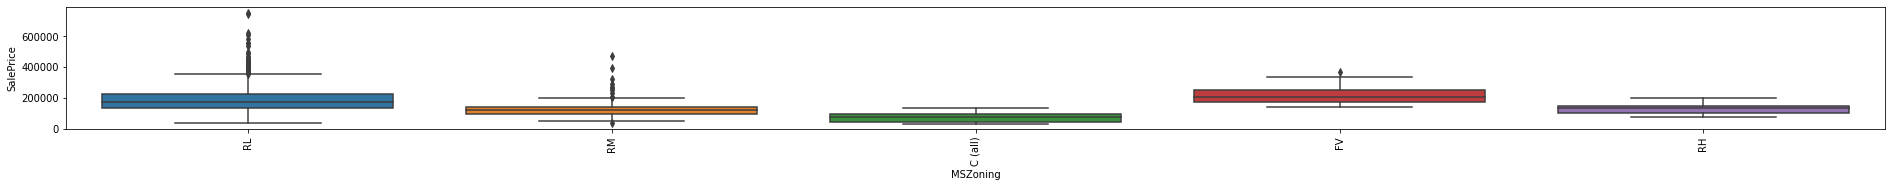

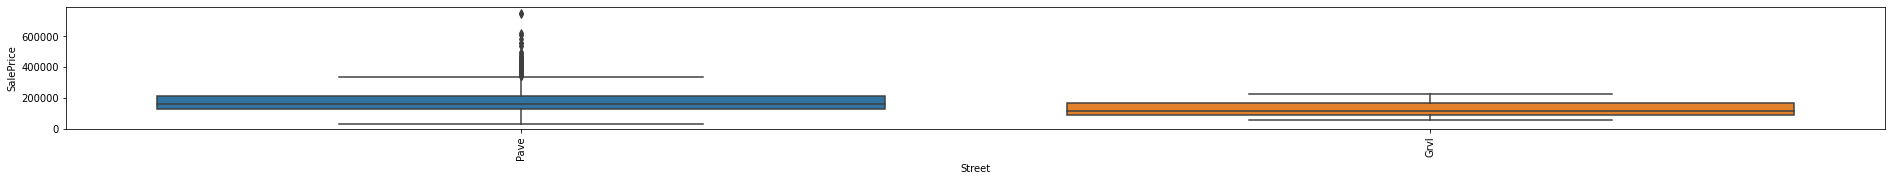

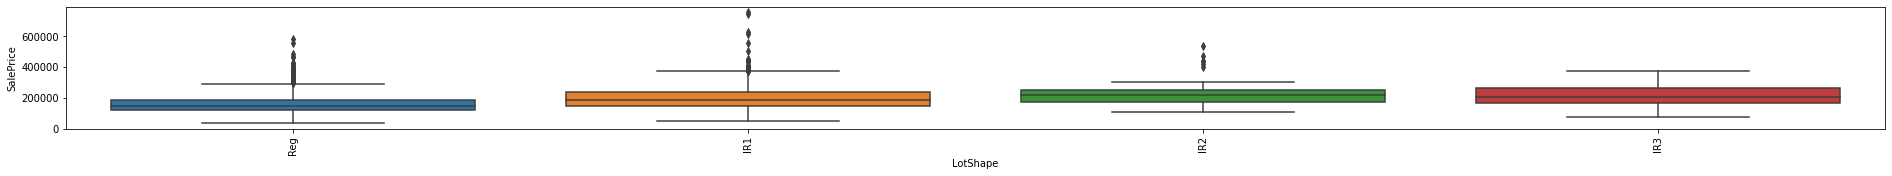

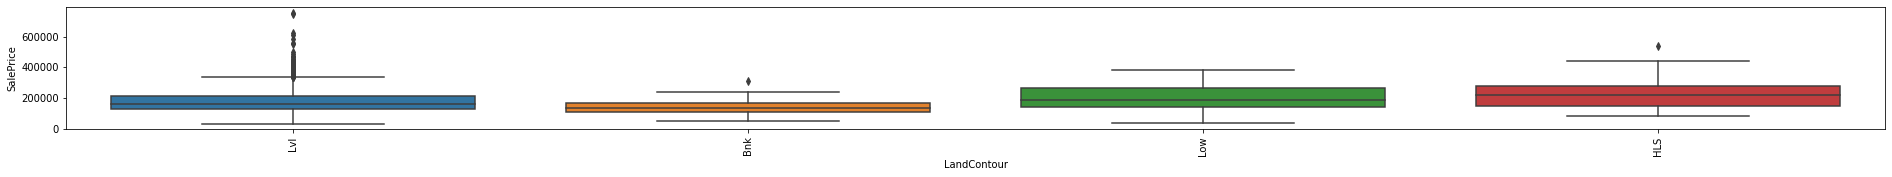

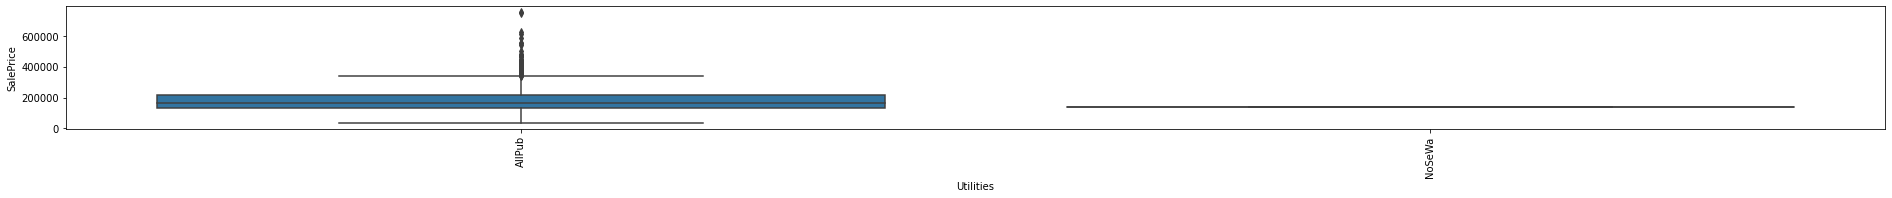

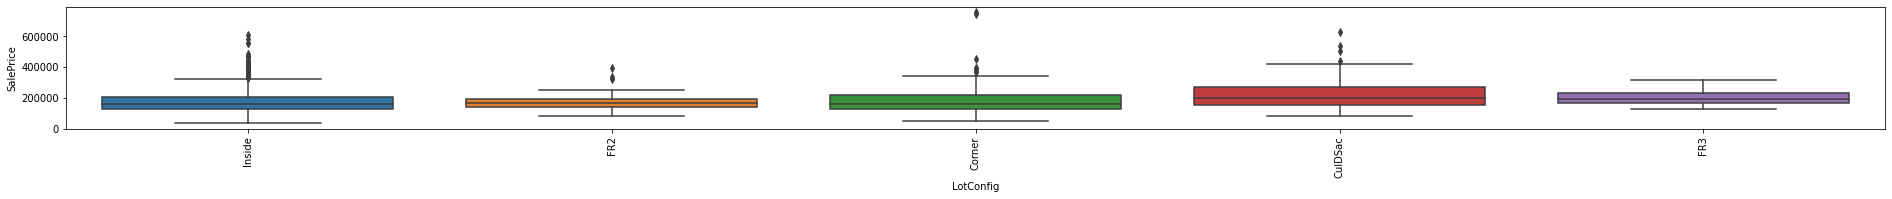

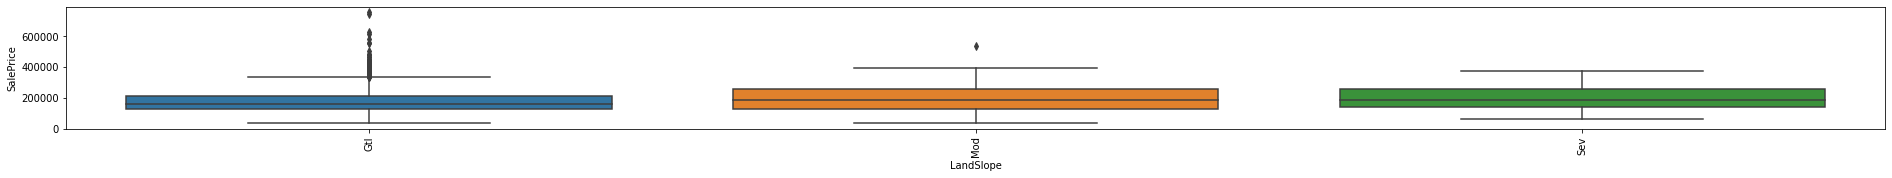

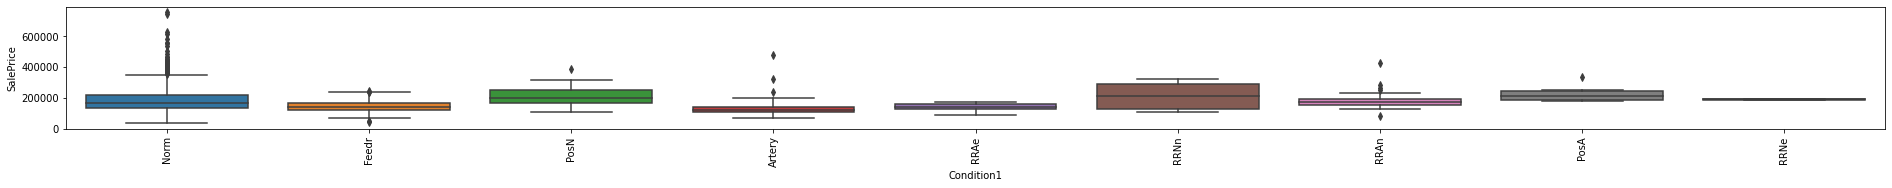

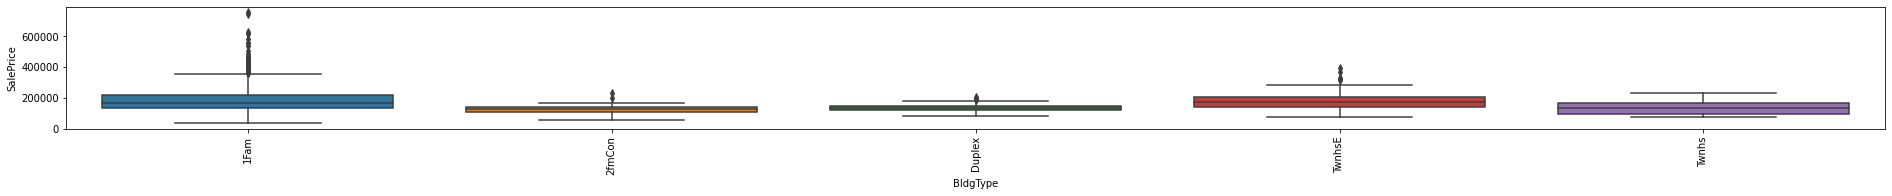

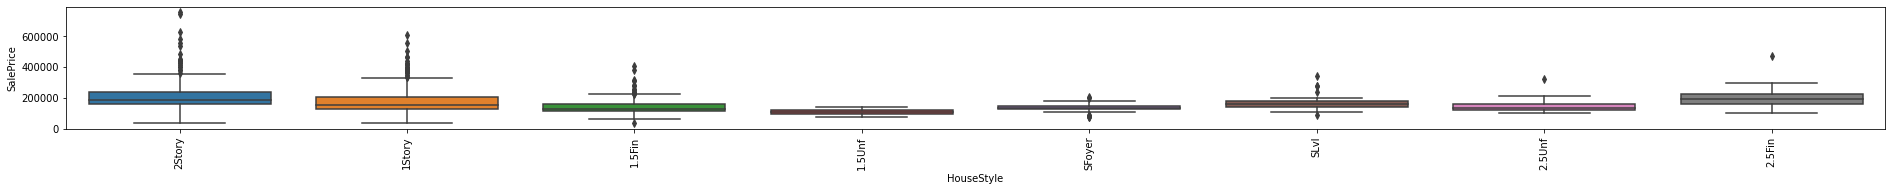

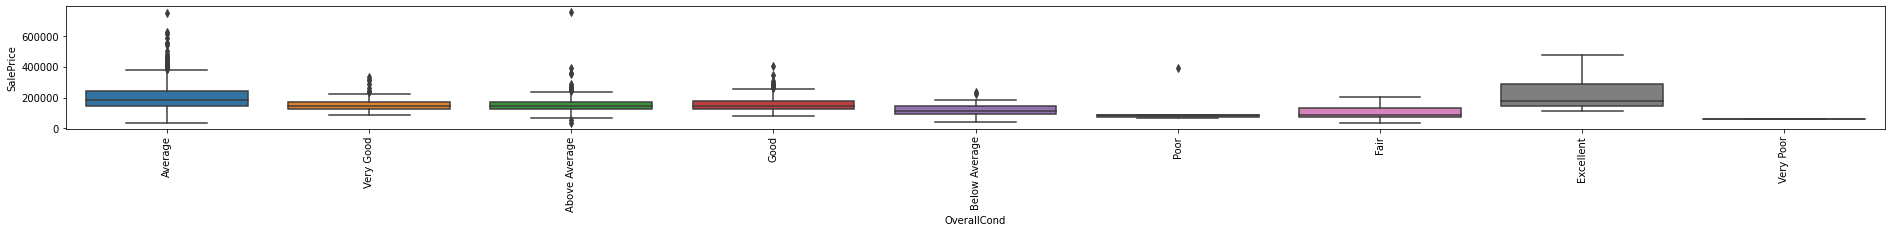

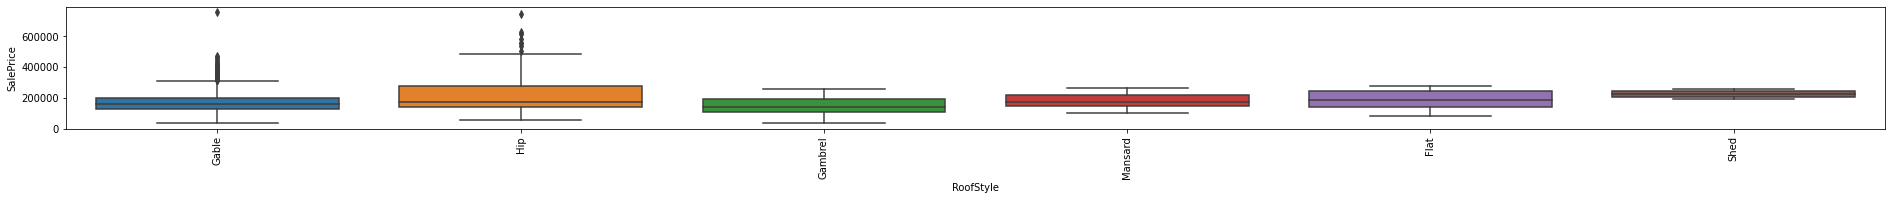

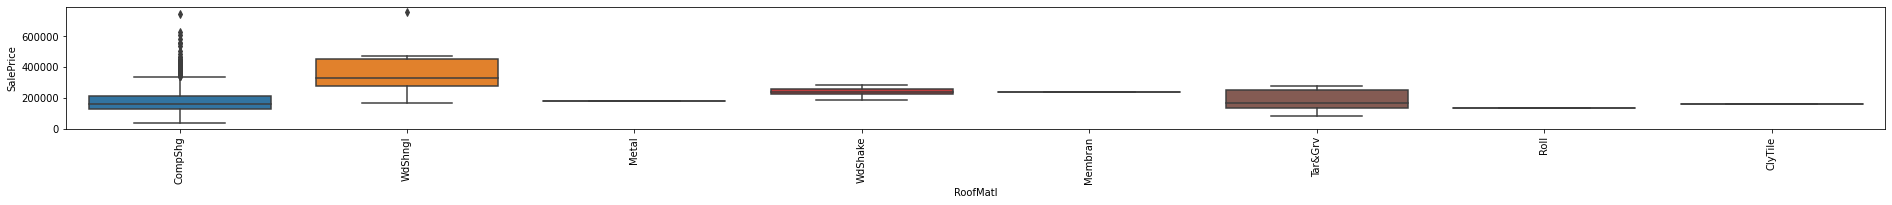

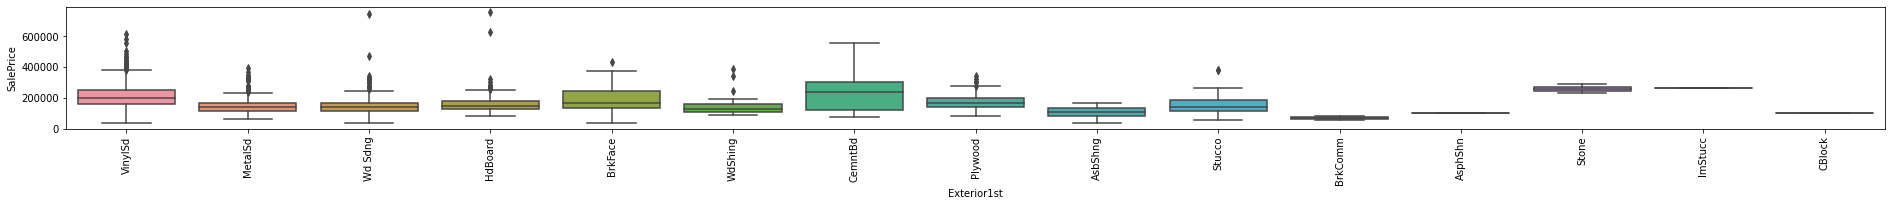

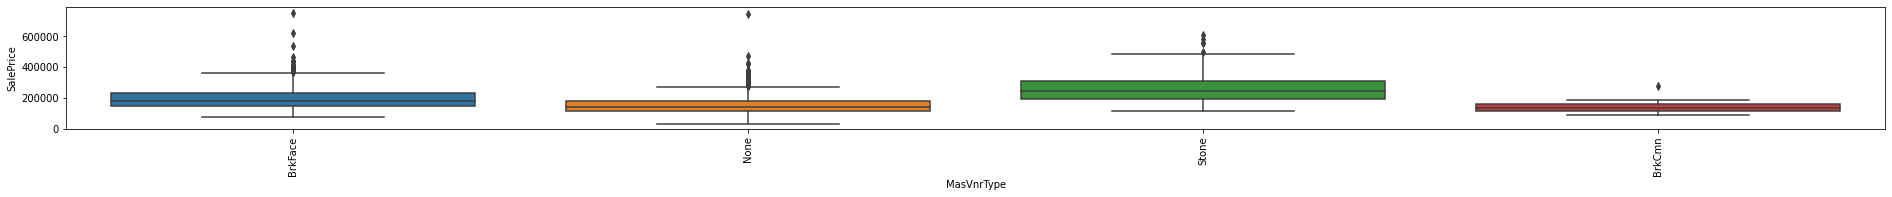

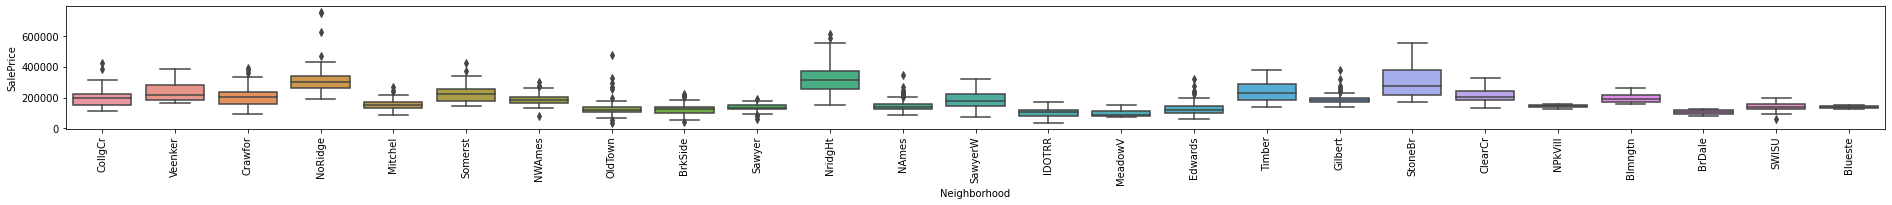

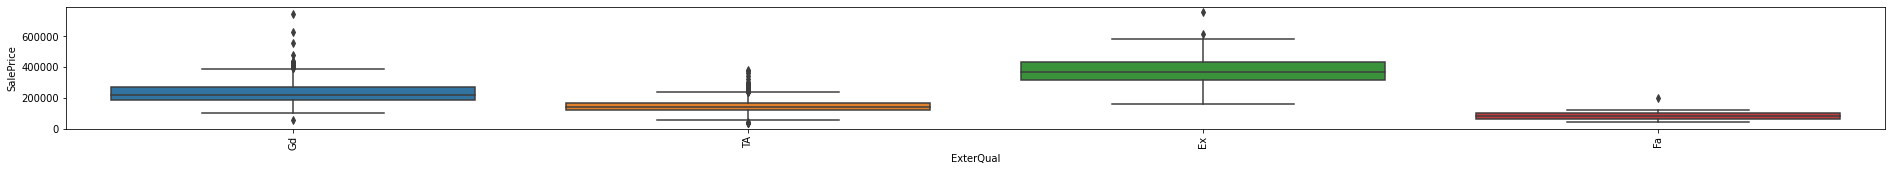

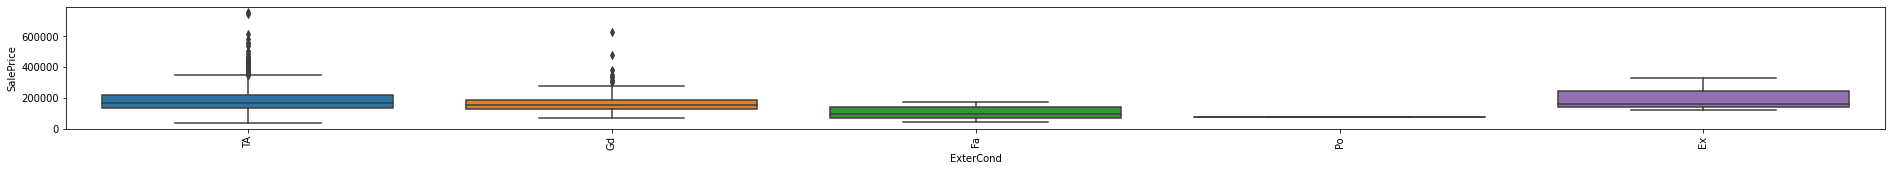

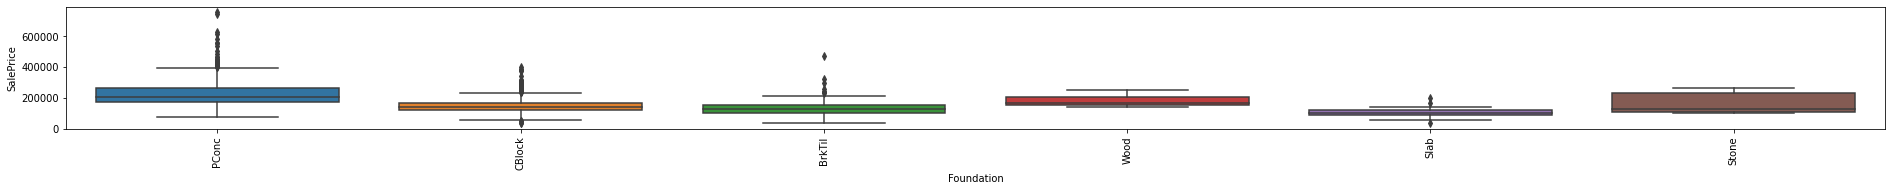

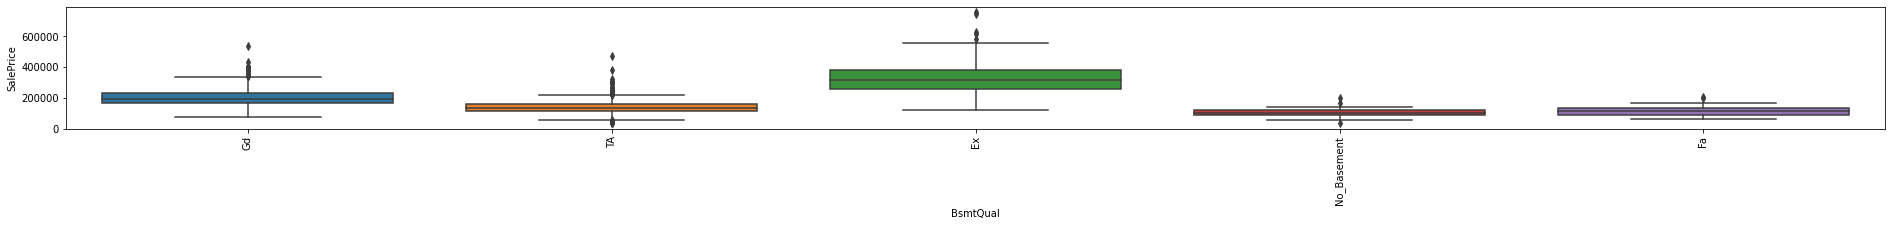

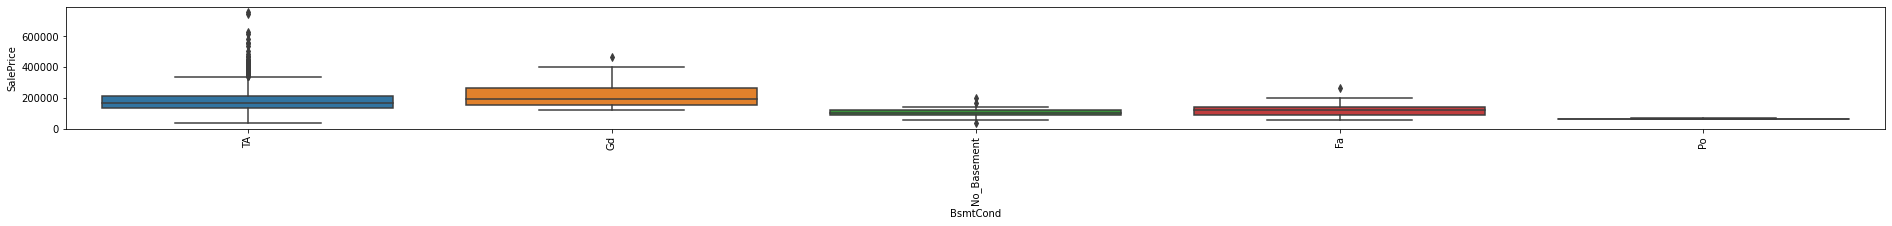

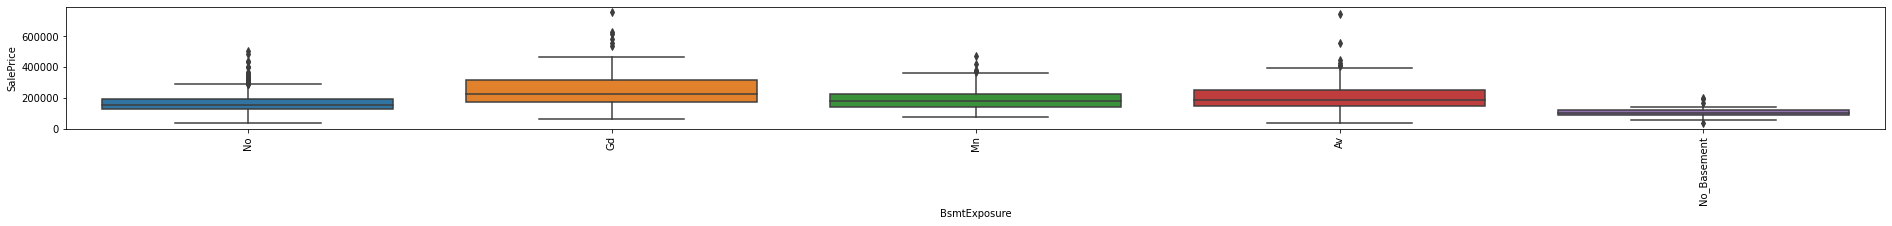

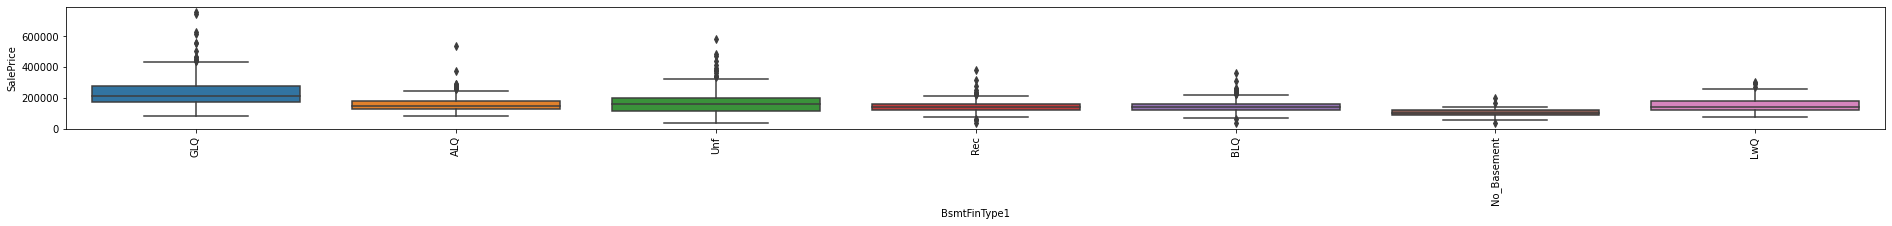

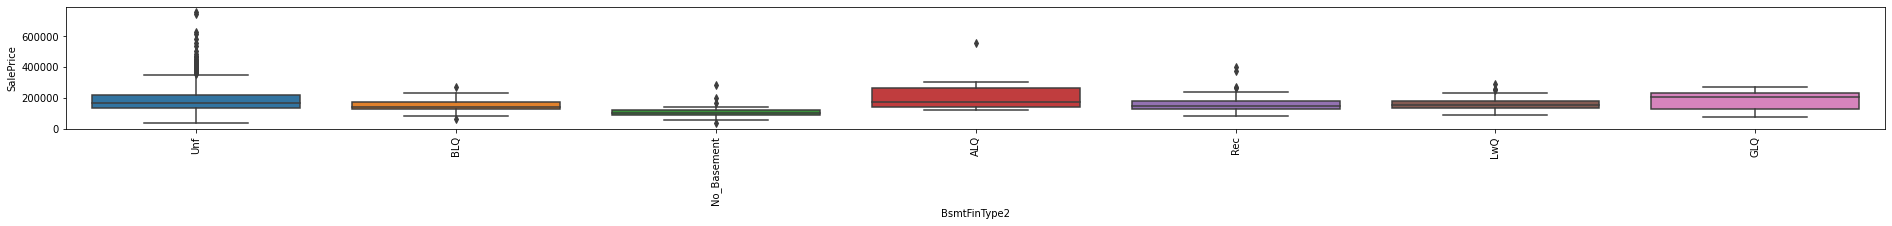

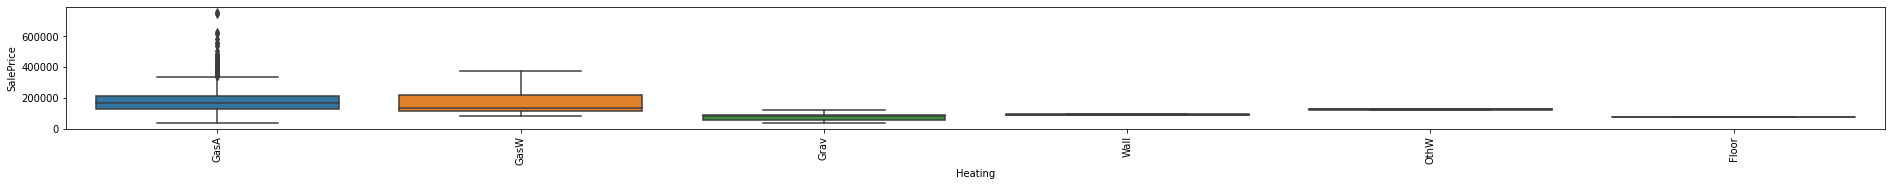

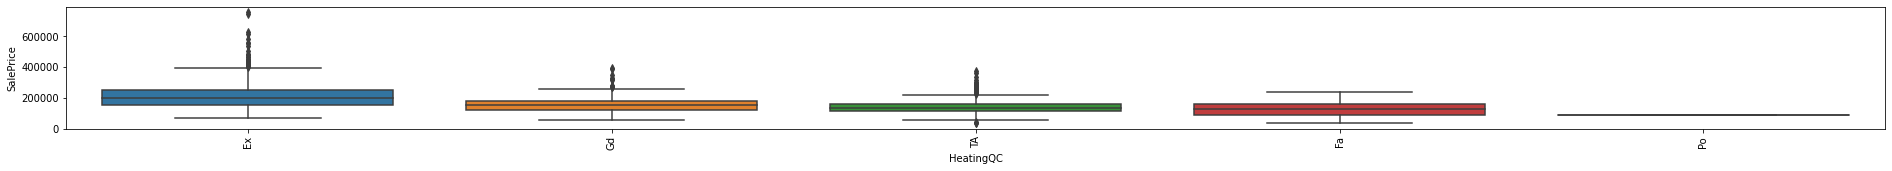

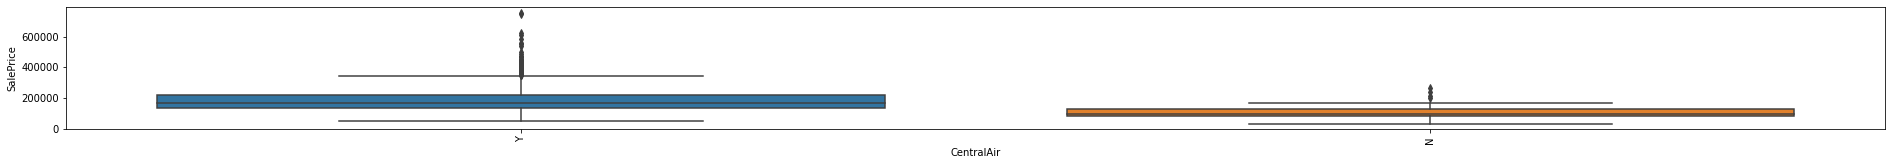

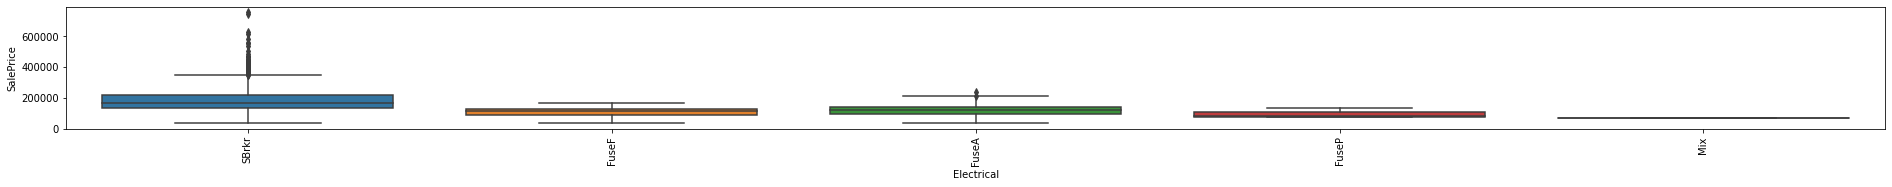

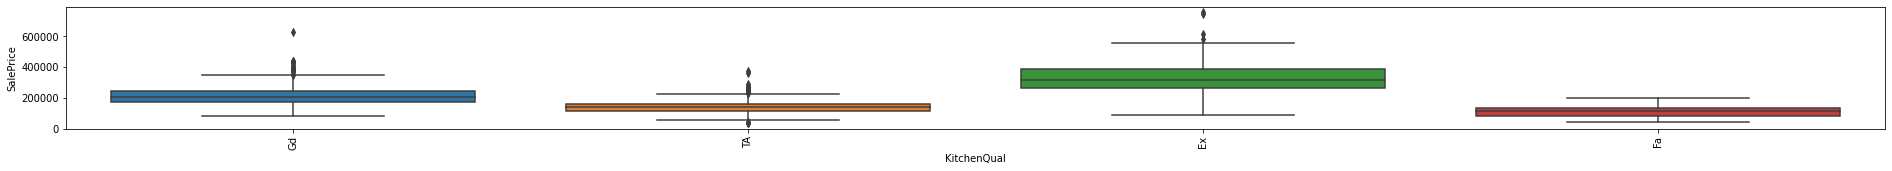

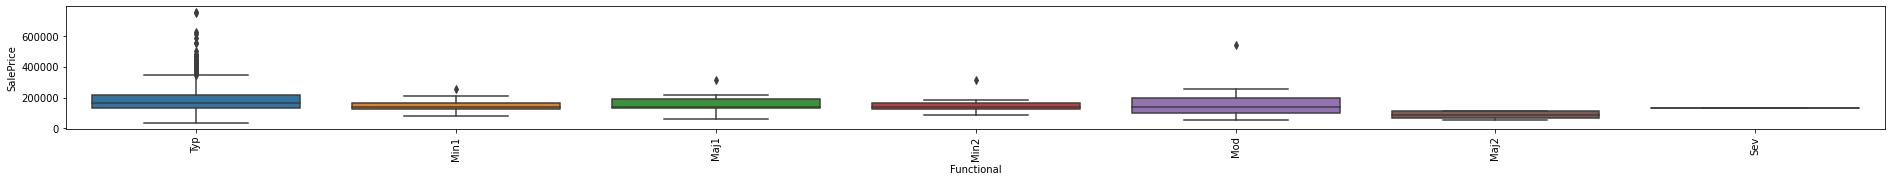

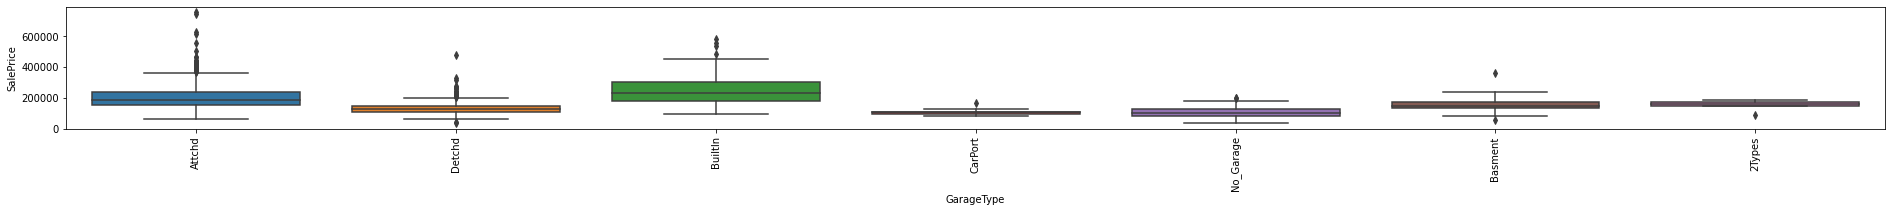

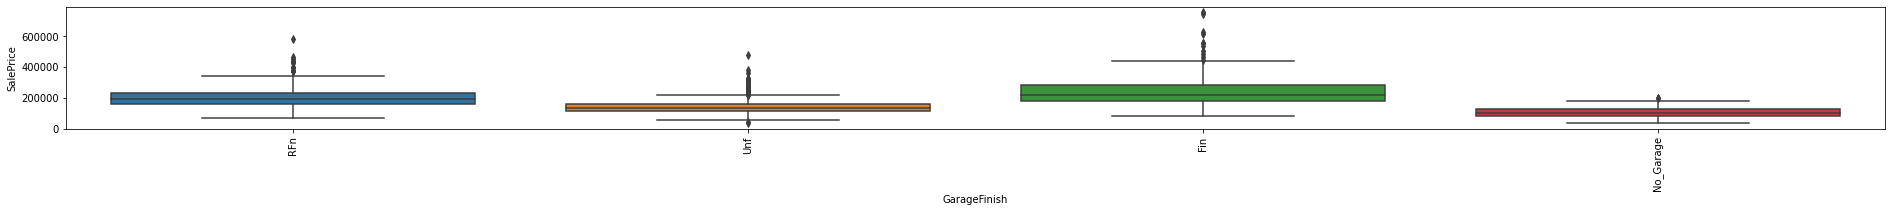

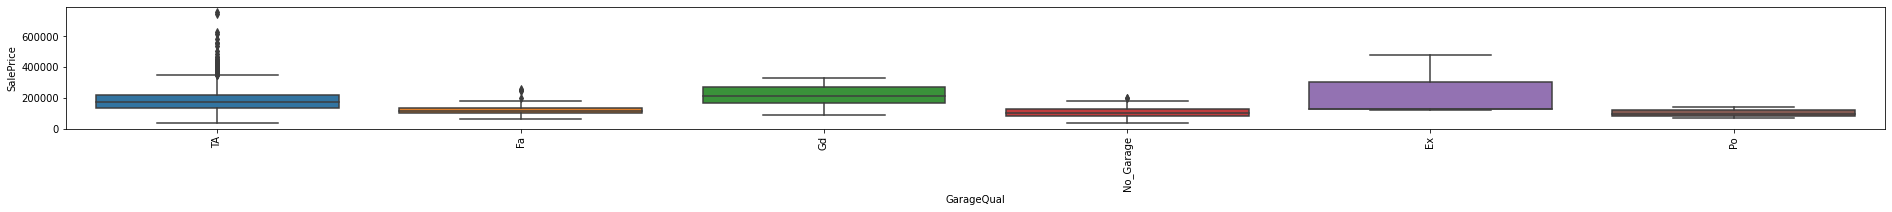

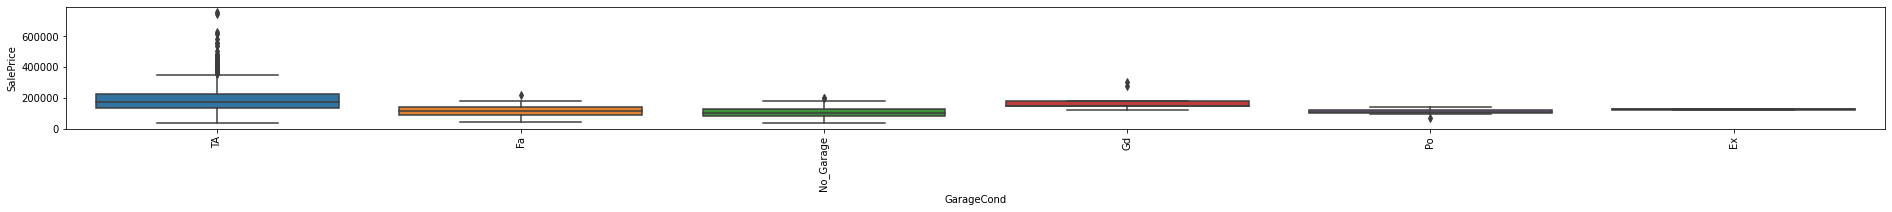

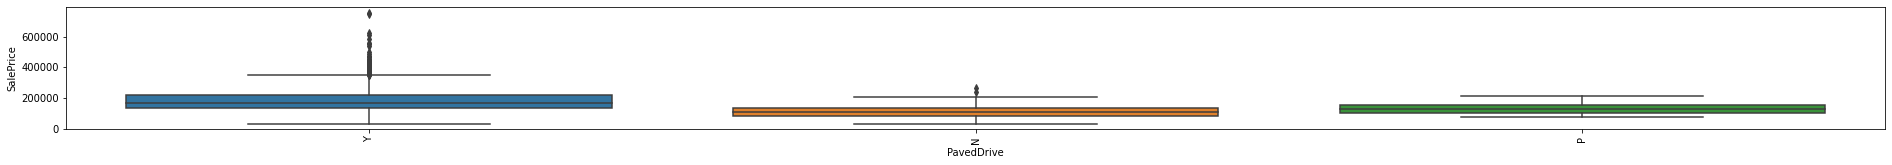

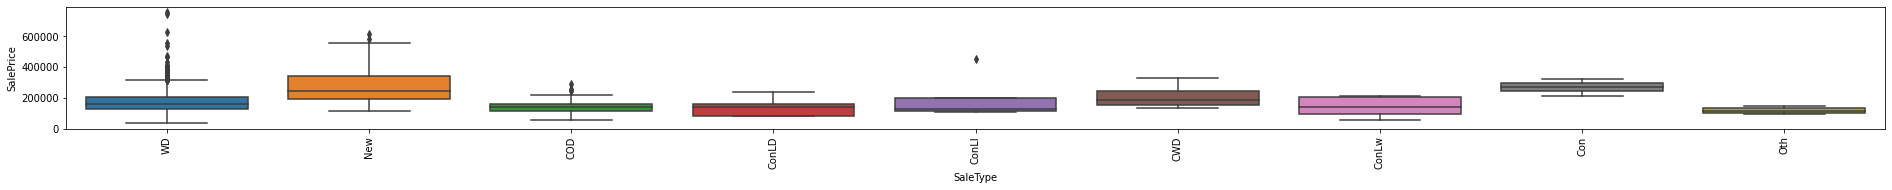

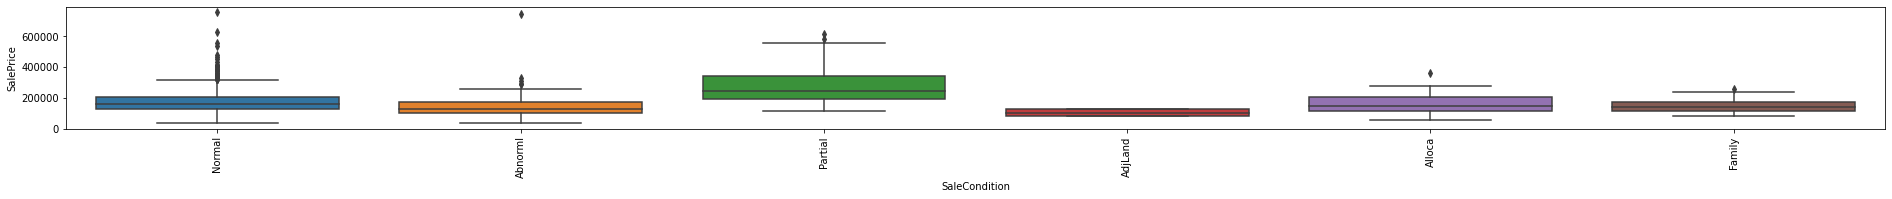

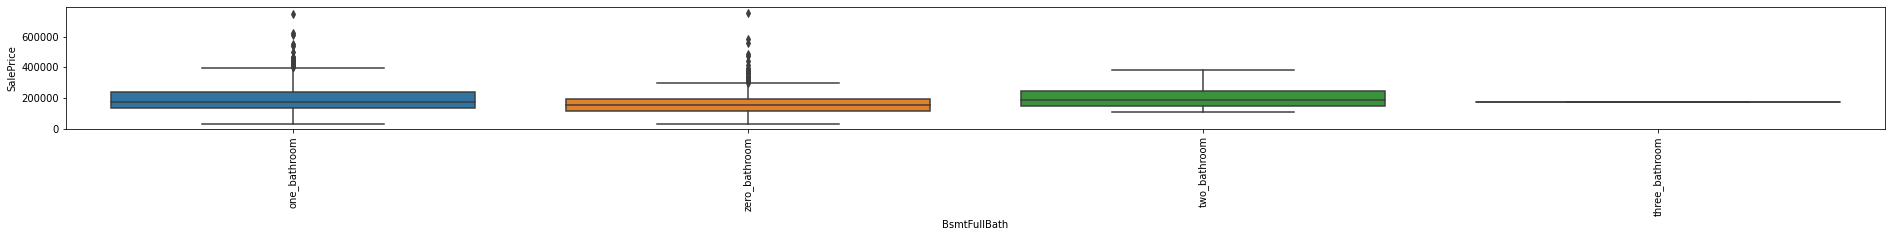

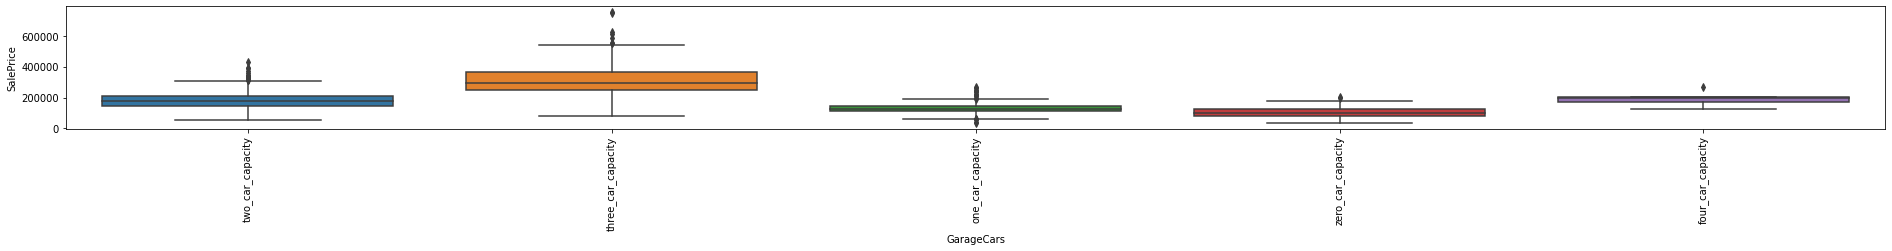

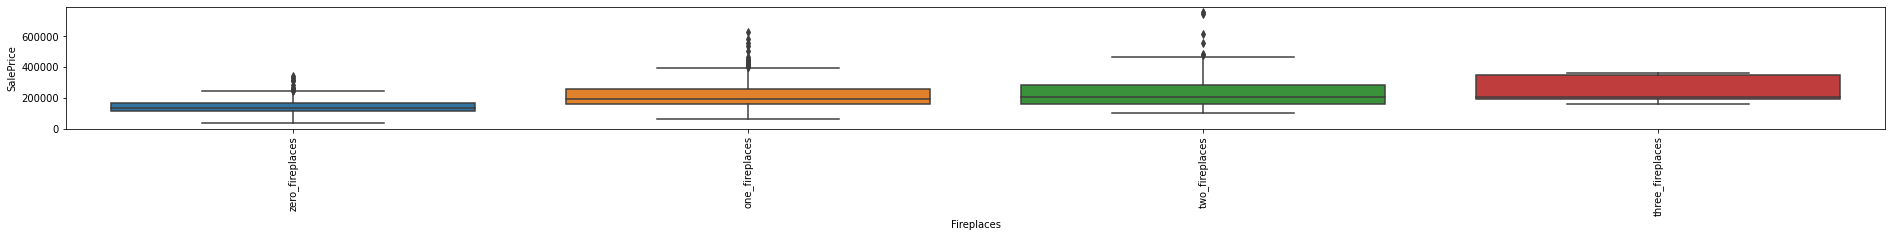

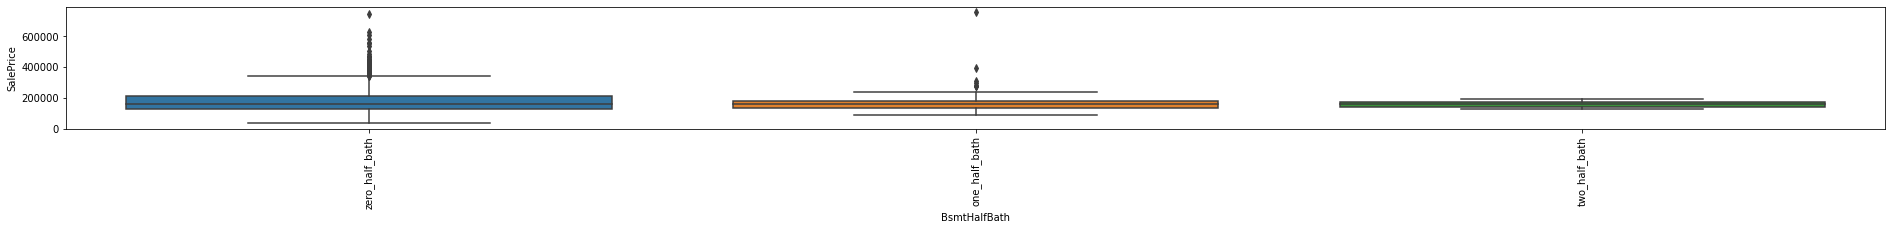

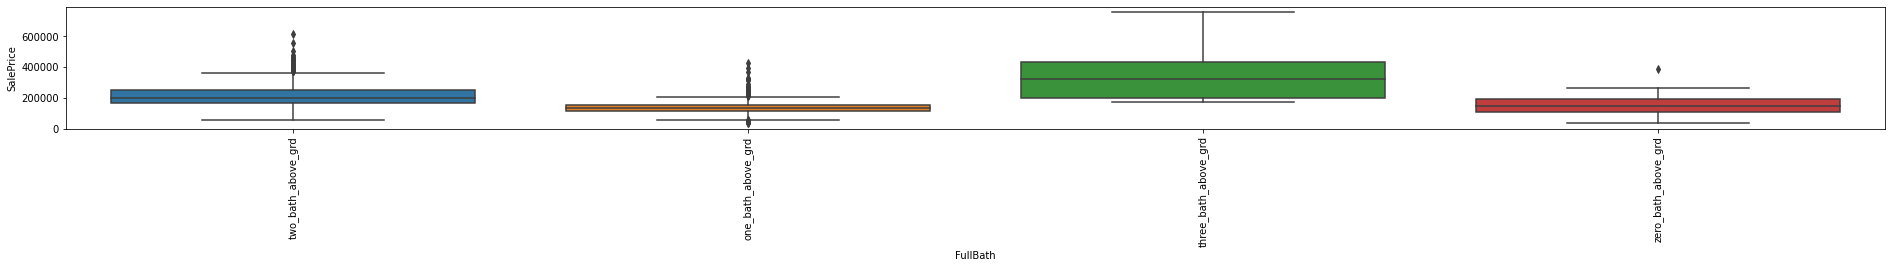

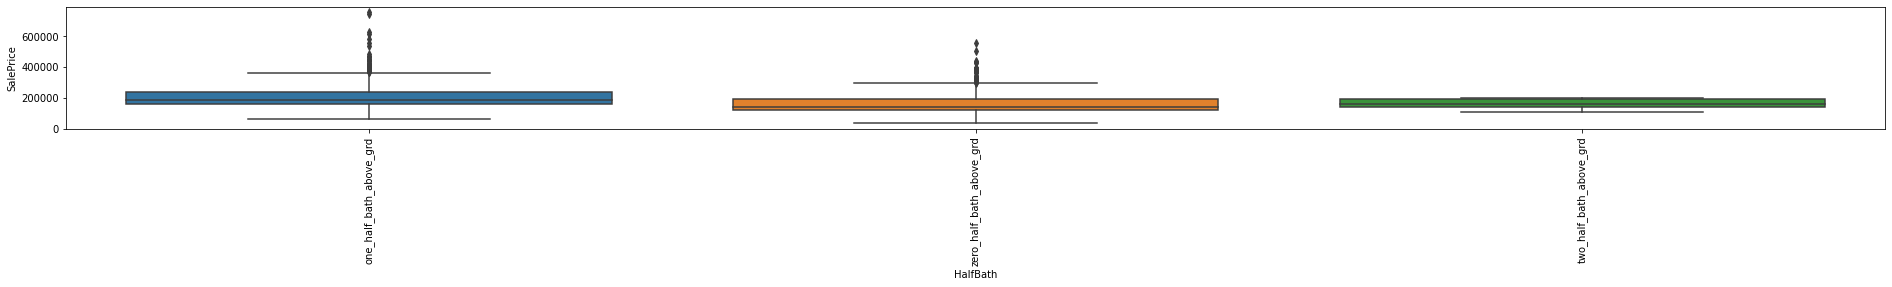

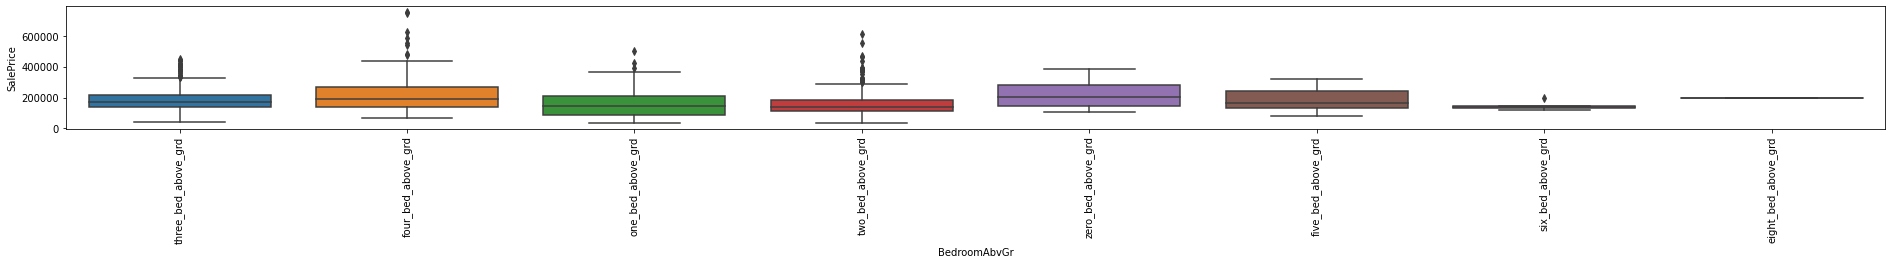

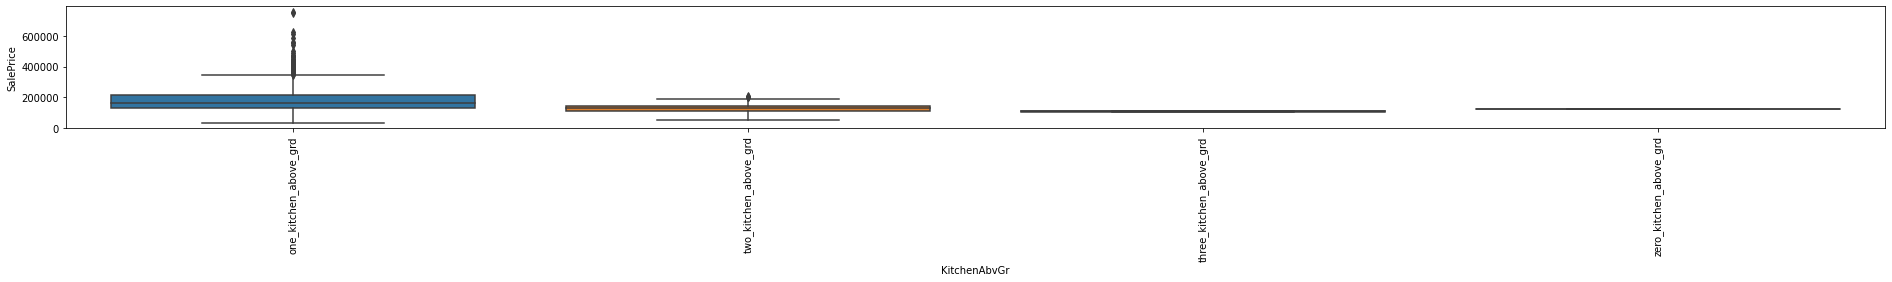

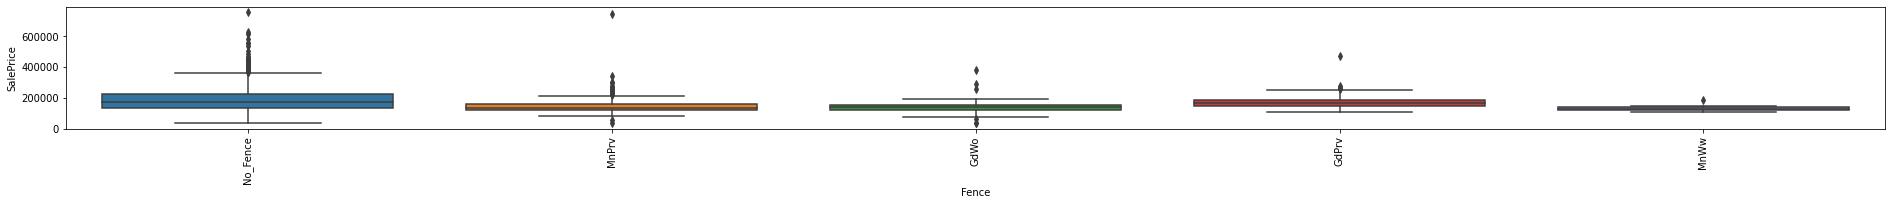

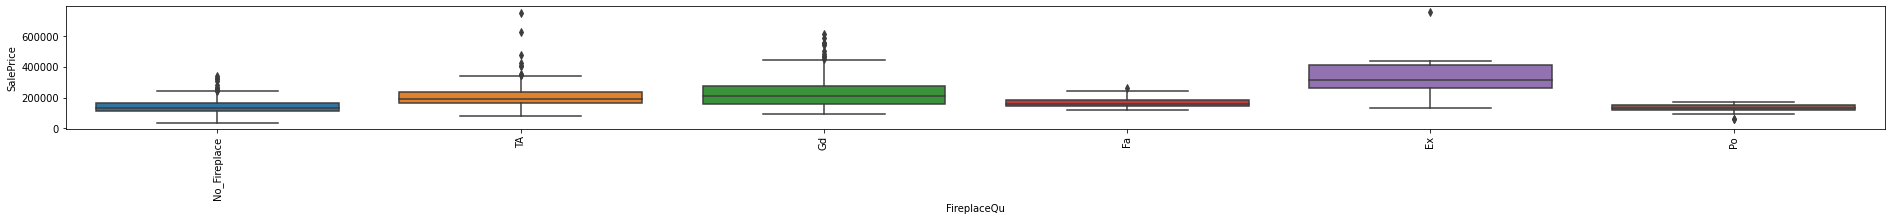

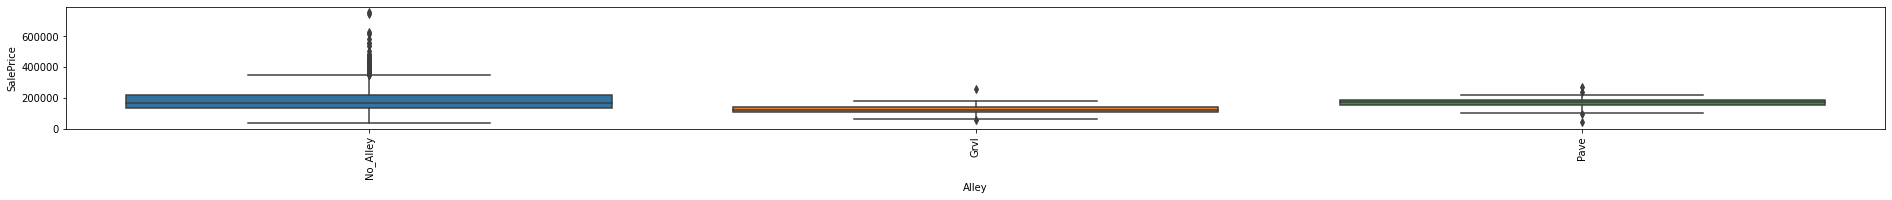

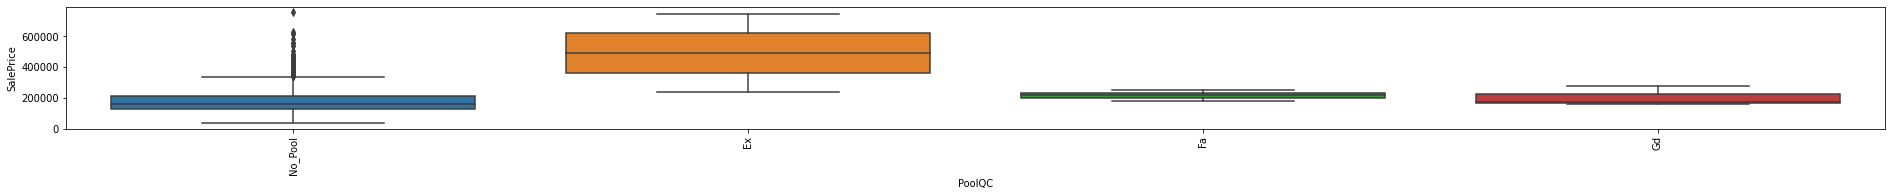

In [15]:
count = 1
size = len(categorical)
for feature in categorical:
    plt.figure(figsize=(150, 40))
    plt.subplot(15,4,count)
    sns.boxplot(x = f'{feature}', y = 'SalePrice', data = housing_price_data_df)
    plt.xticks(rotation=90)
    # plot_boxplot(feature)
    plt.show()
    count = count + 1

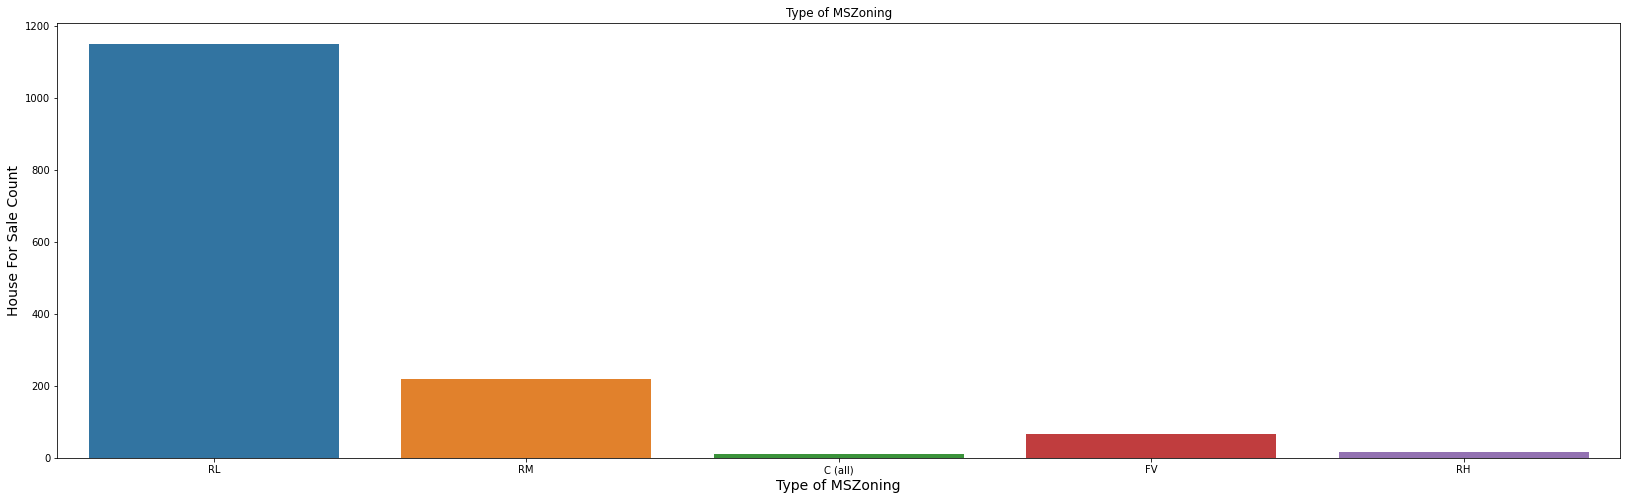

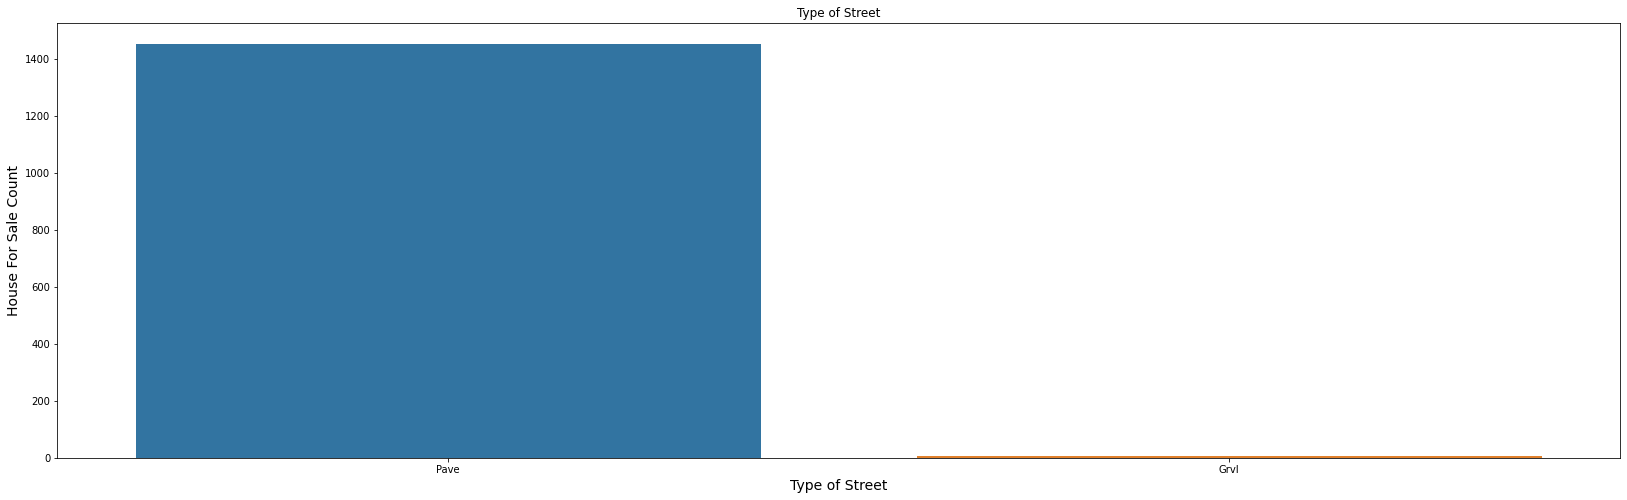

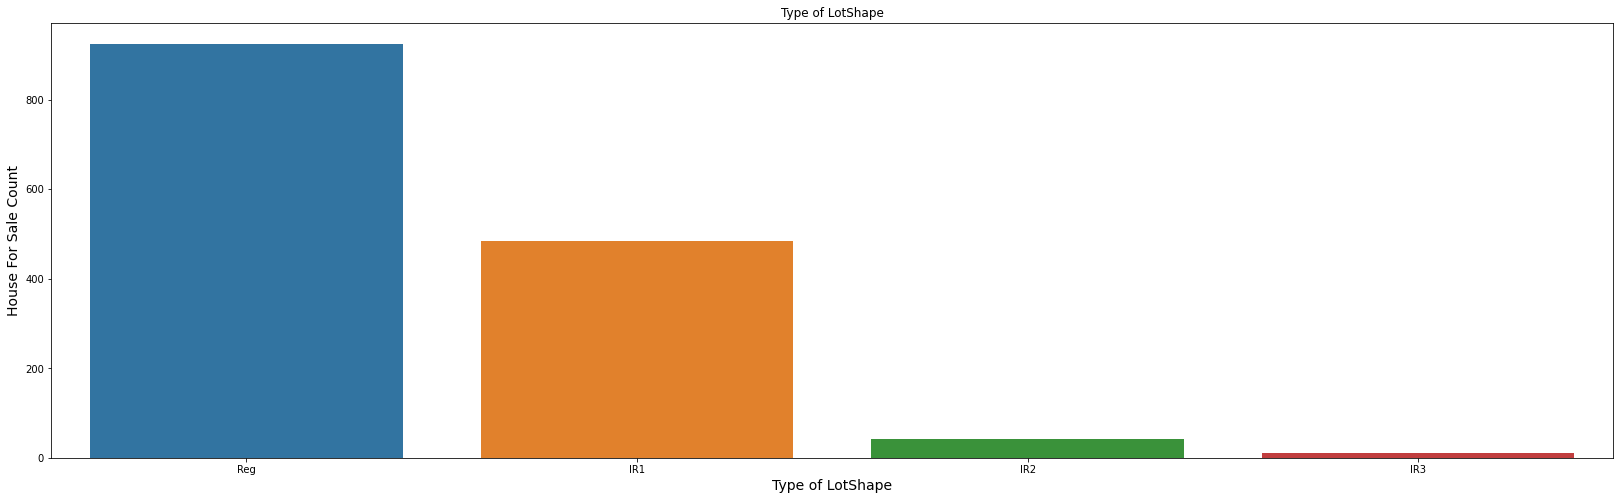

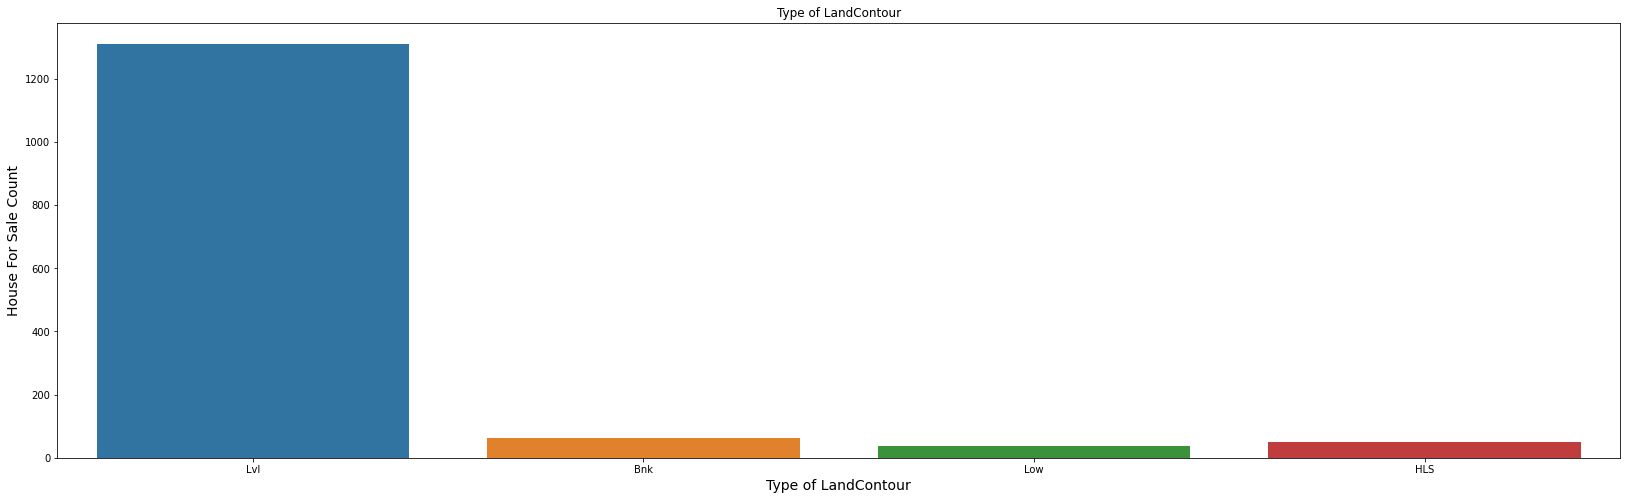

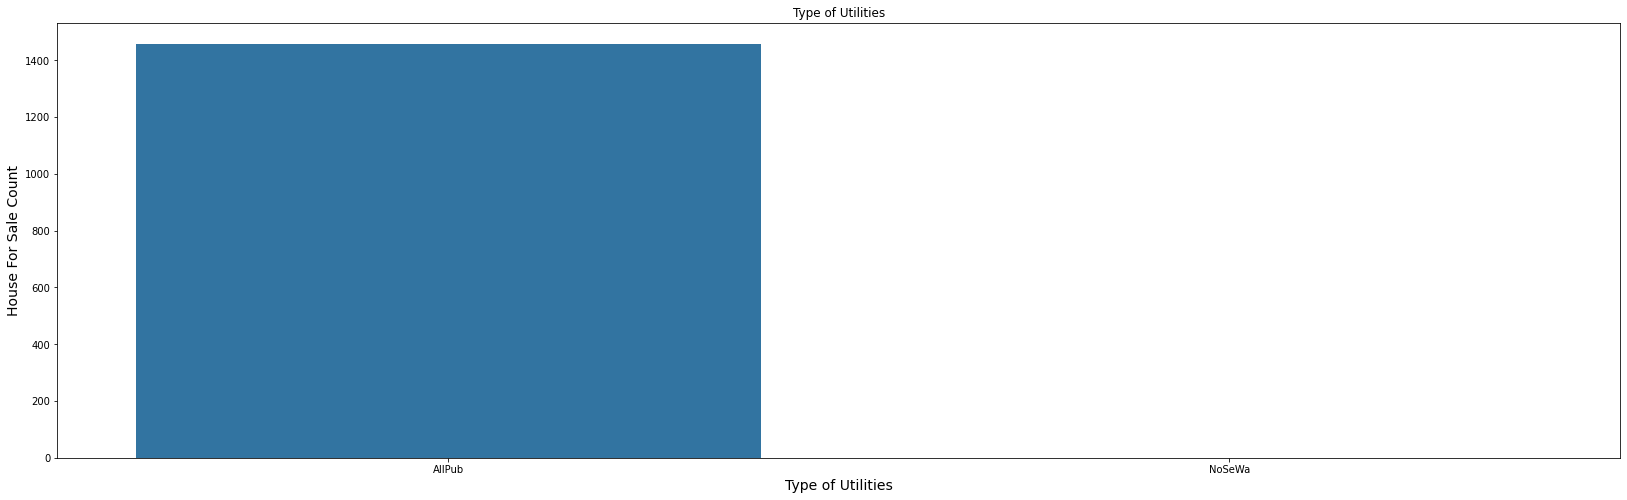

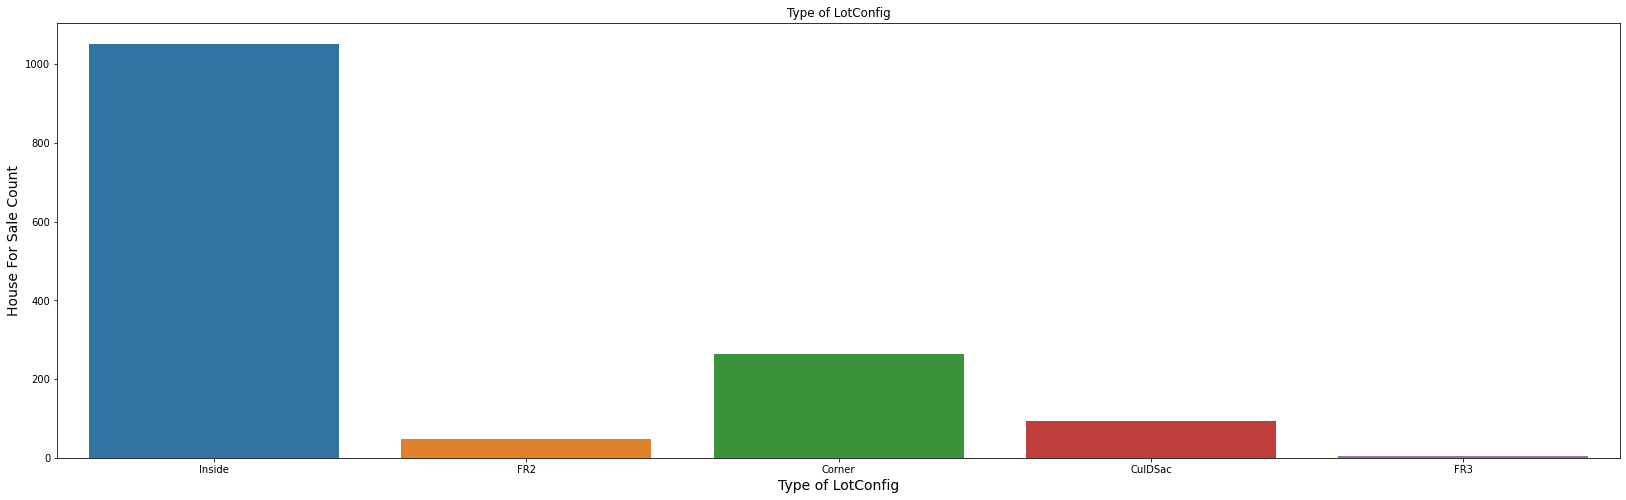

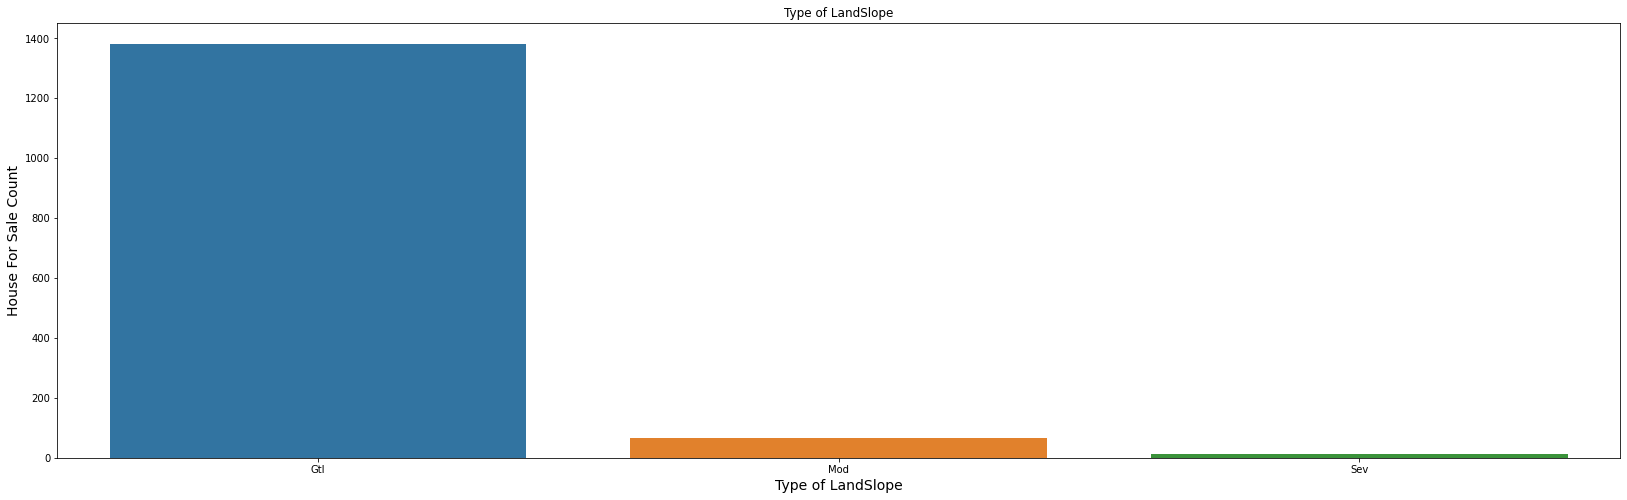

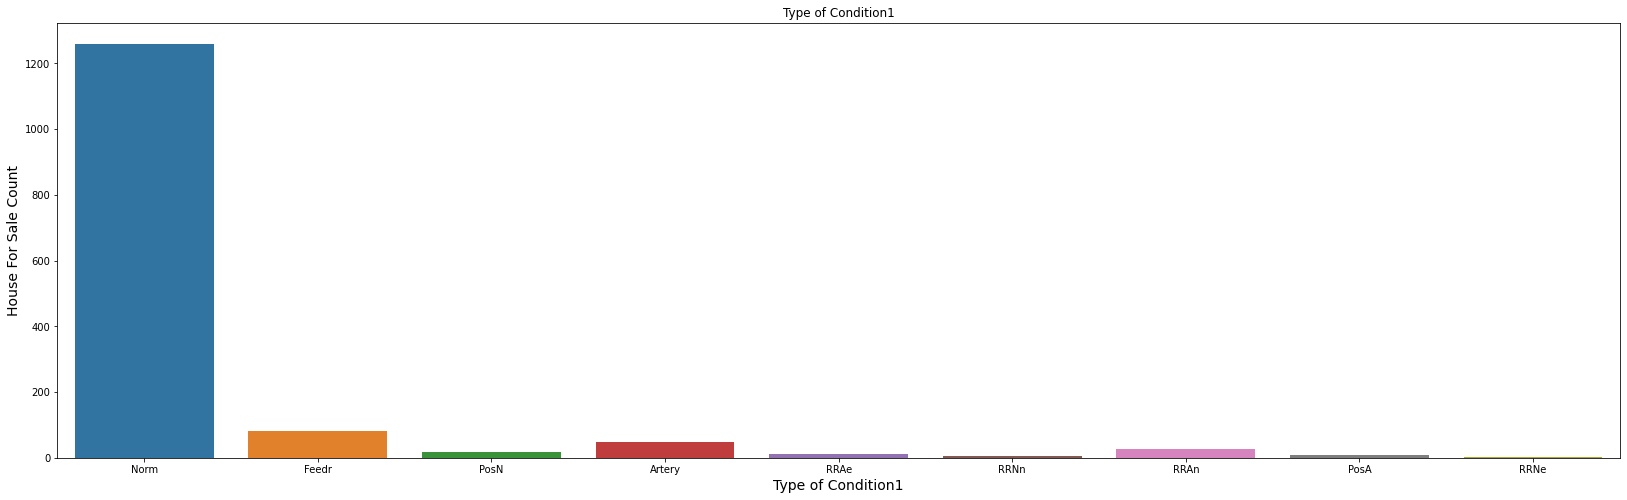

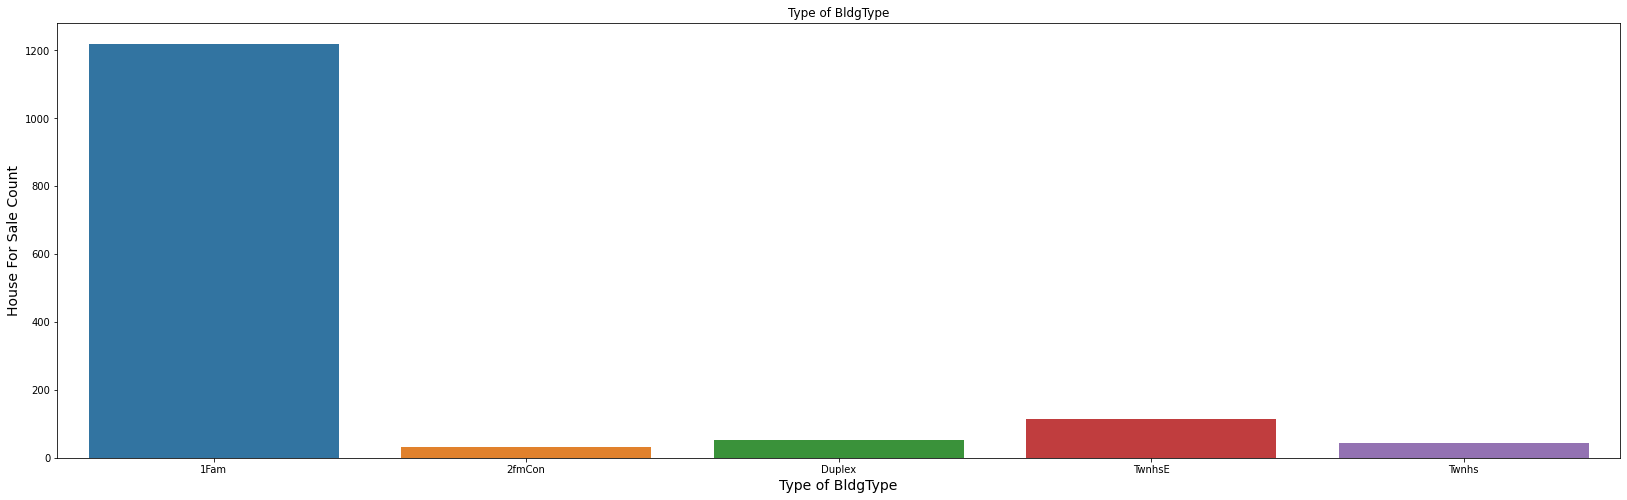

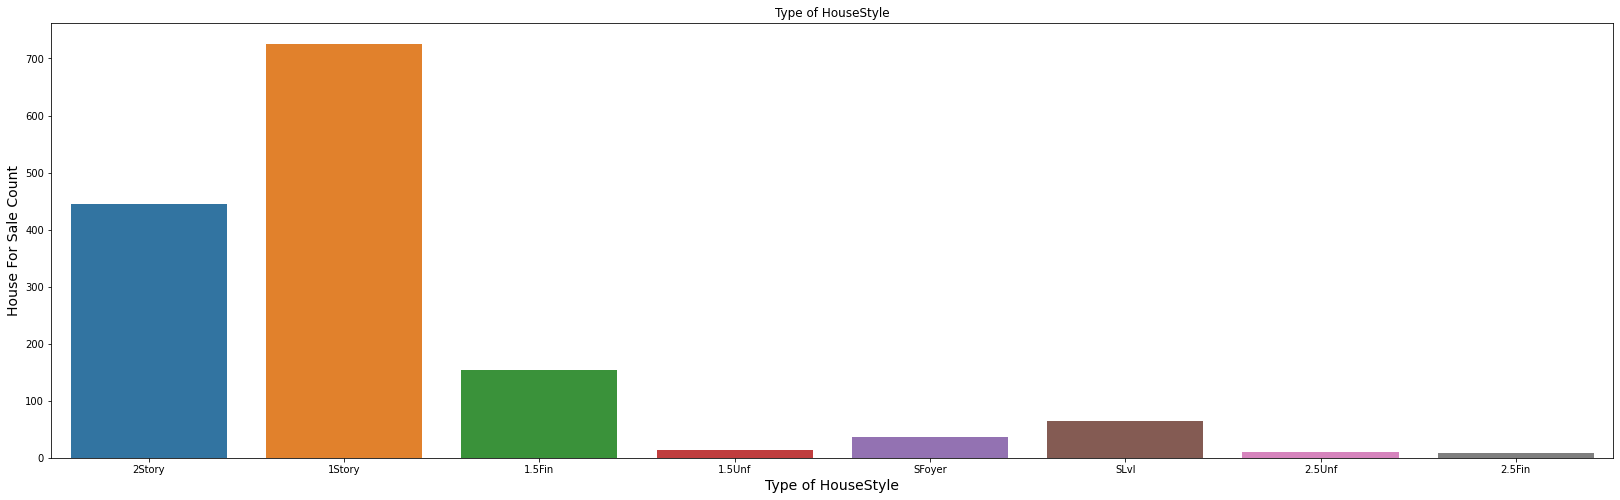

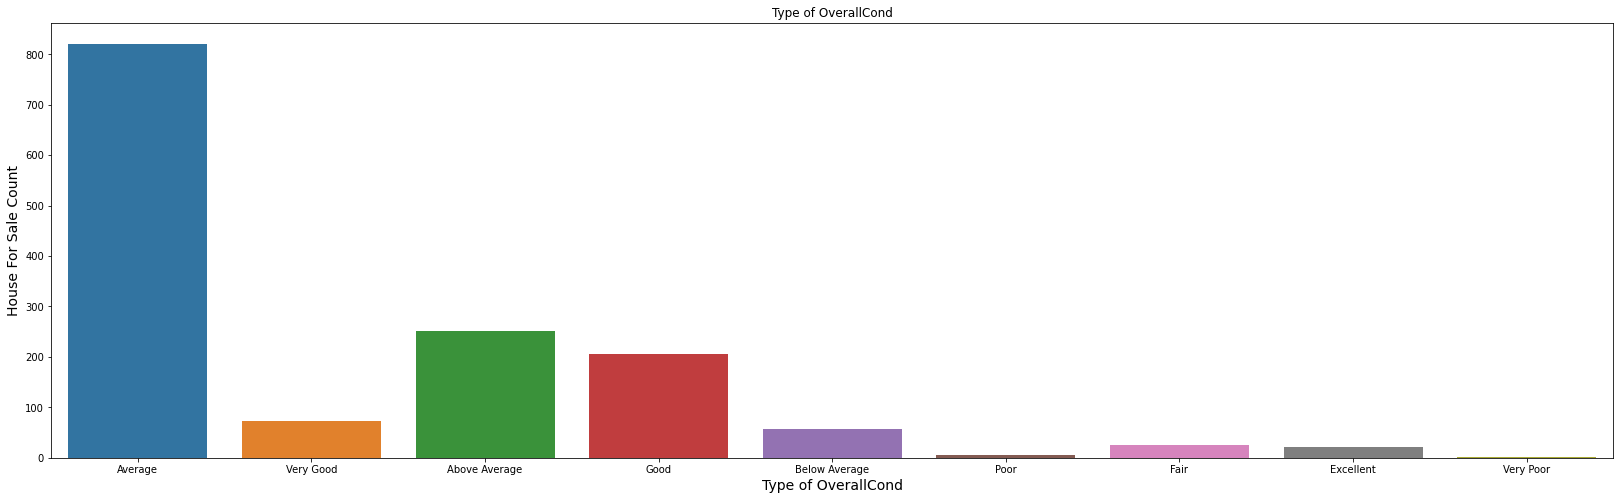

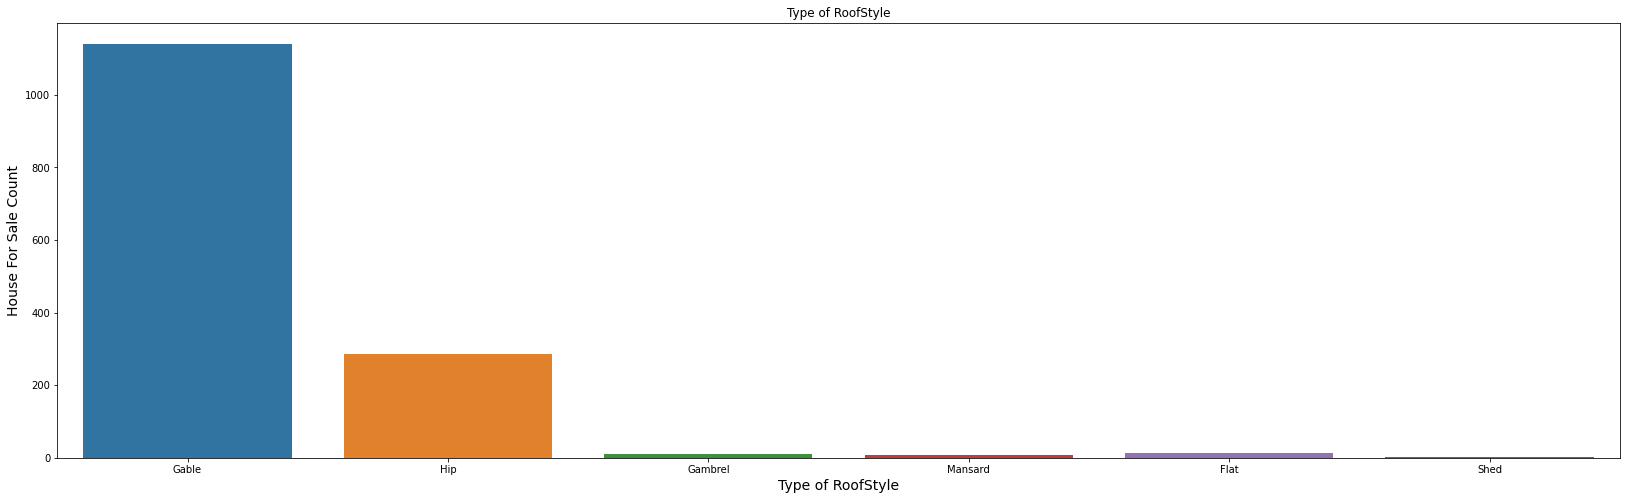

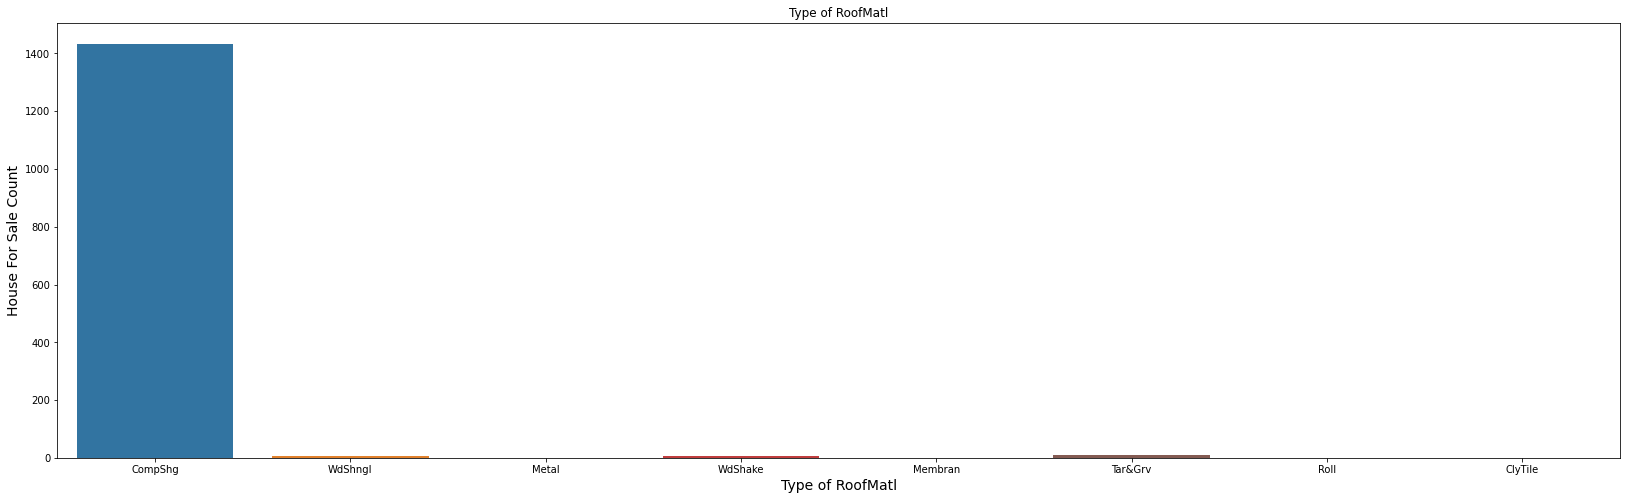

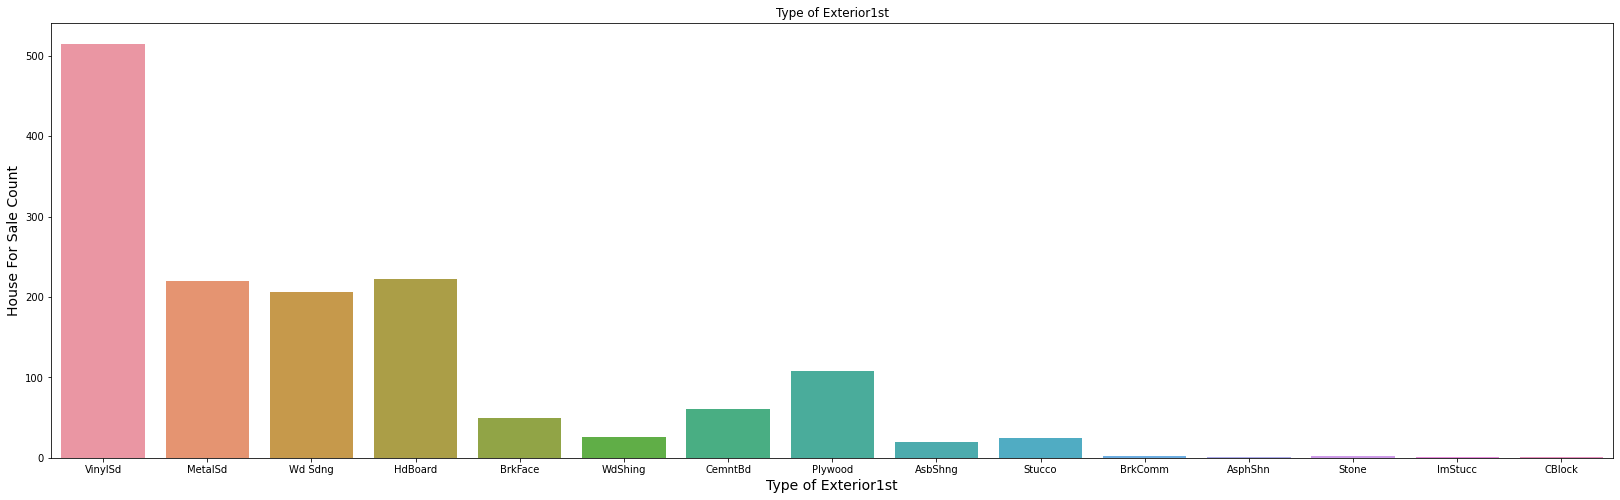

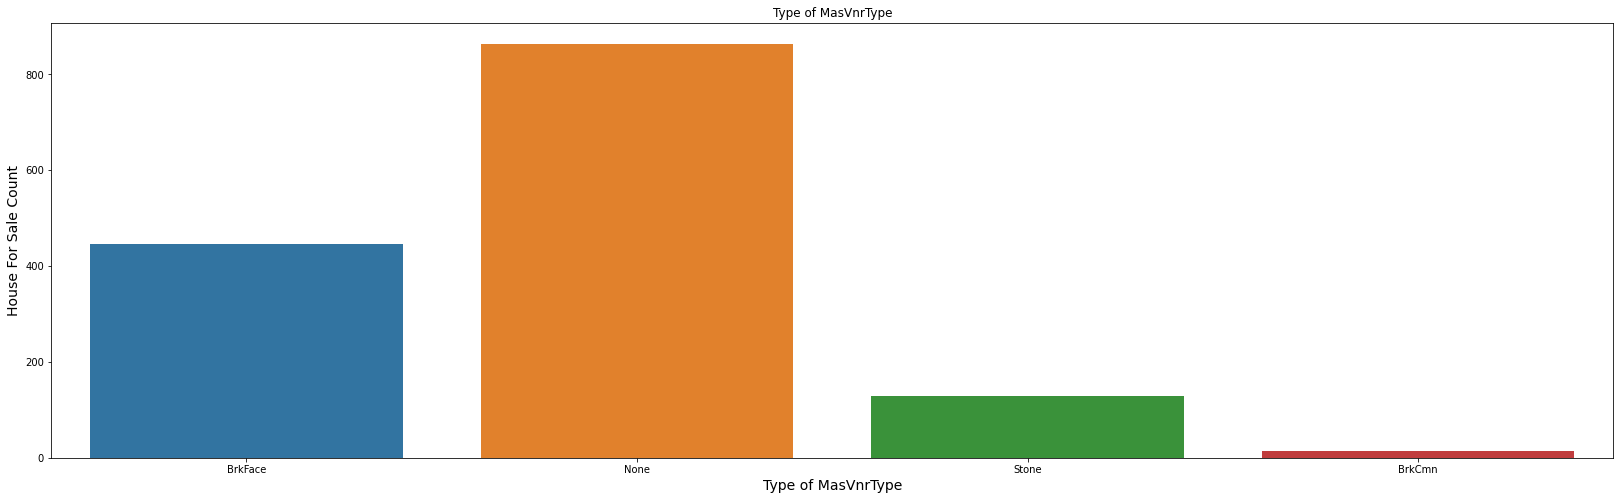

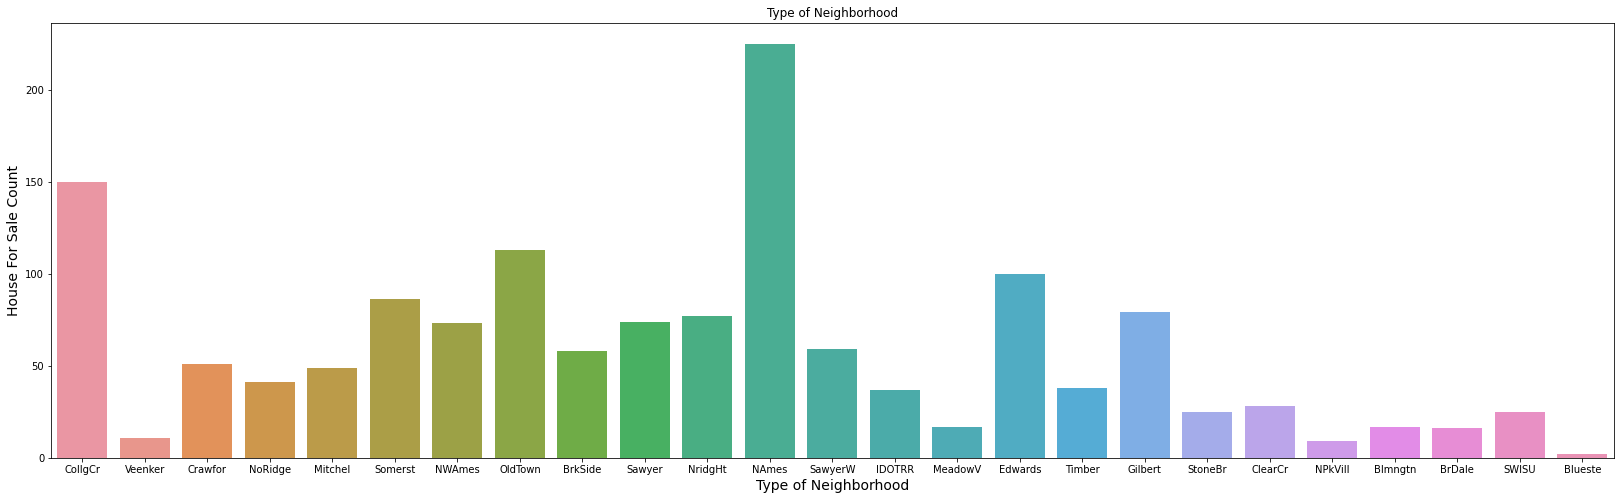

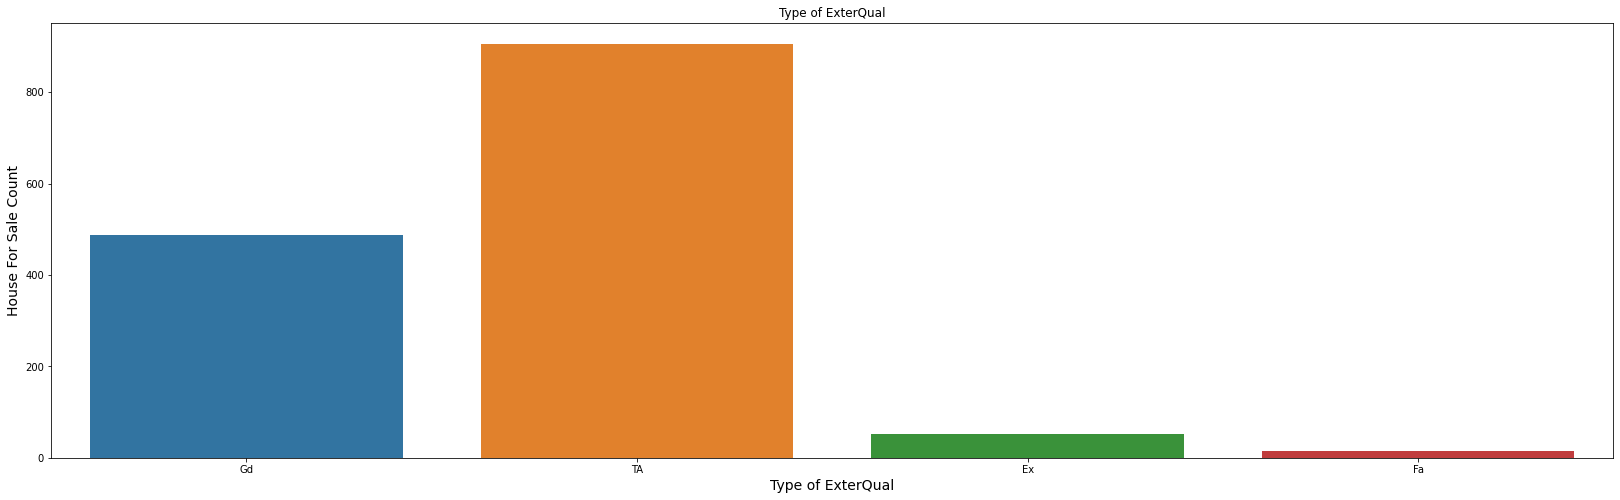

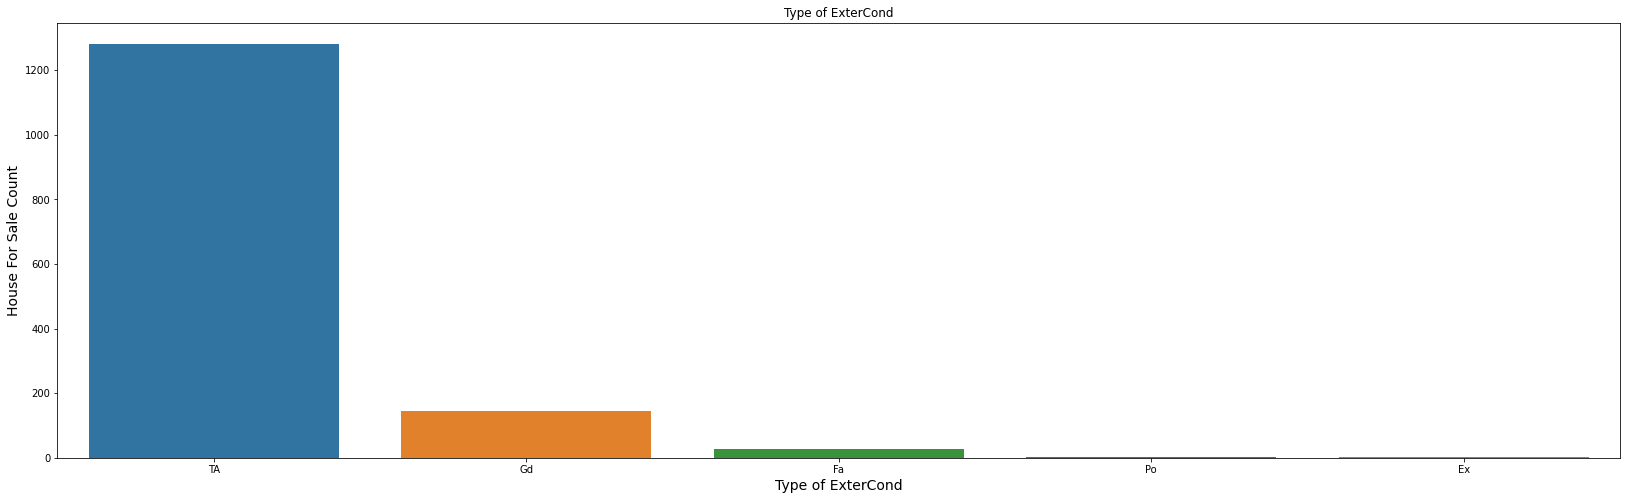

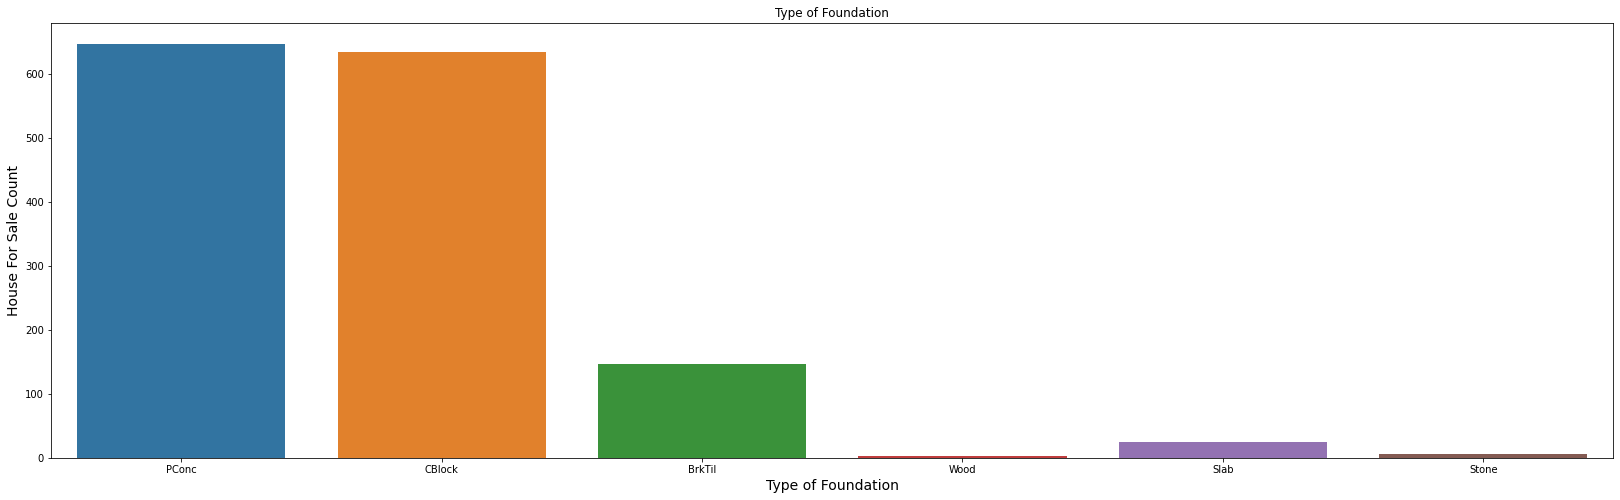

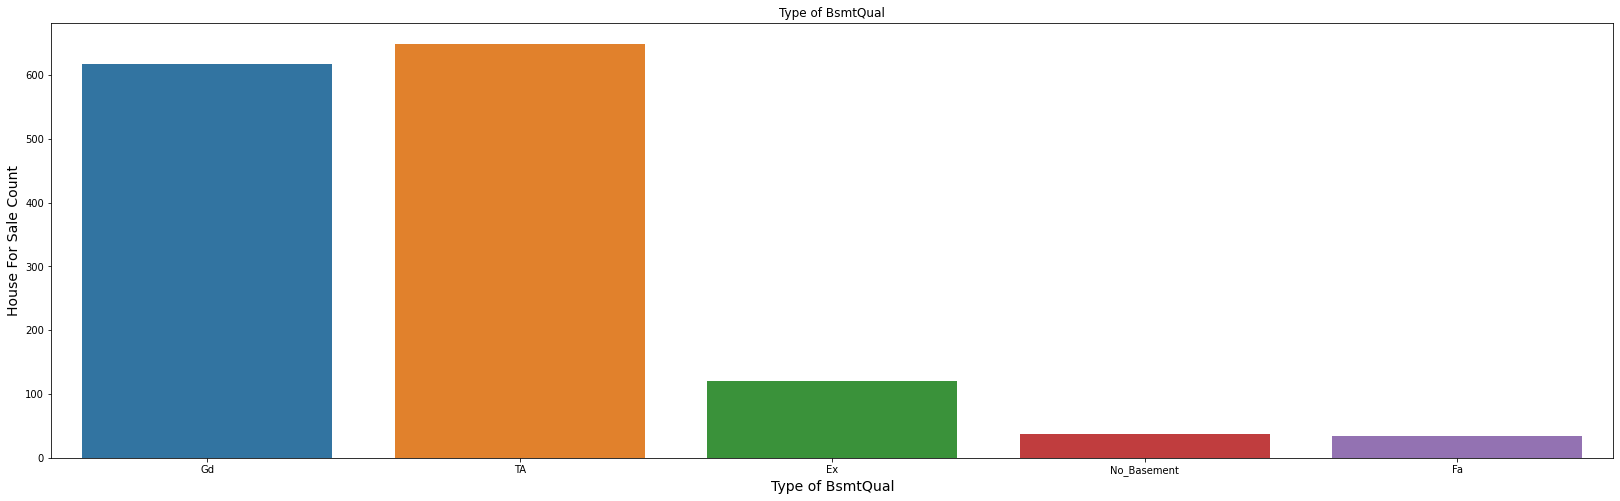

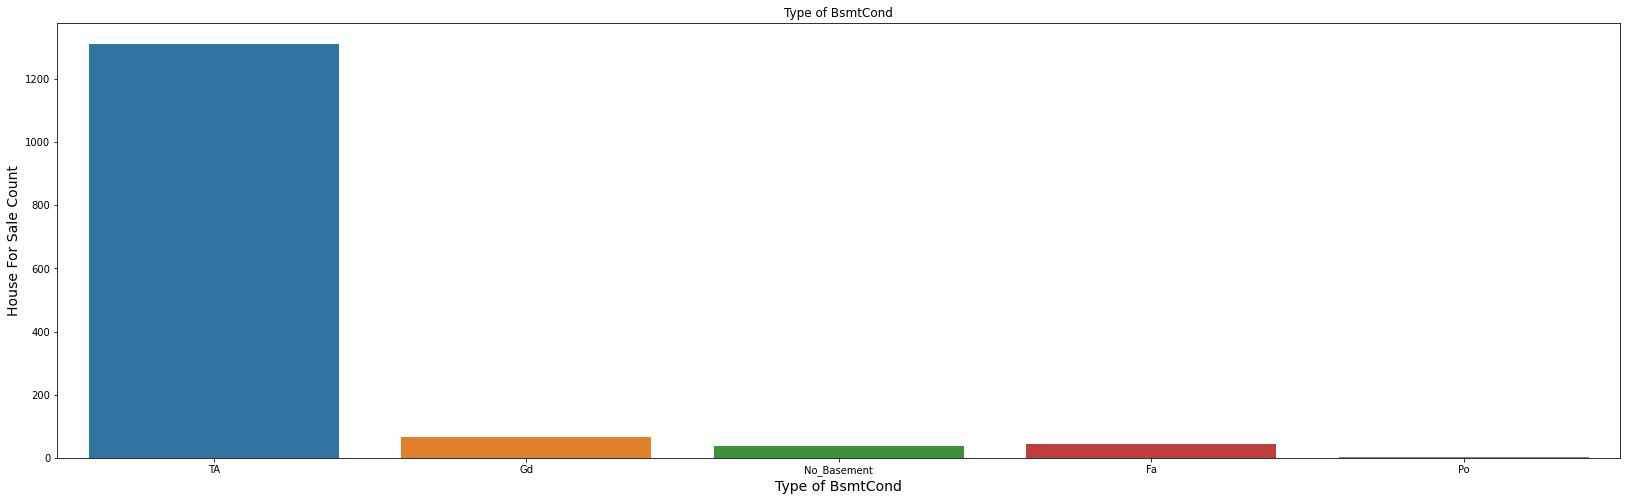

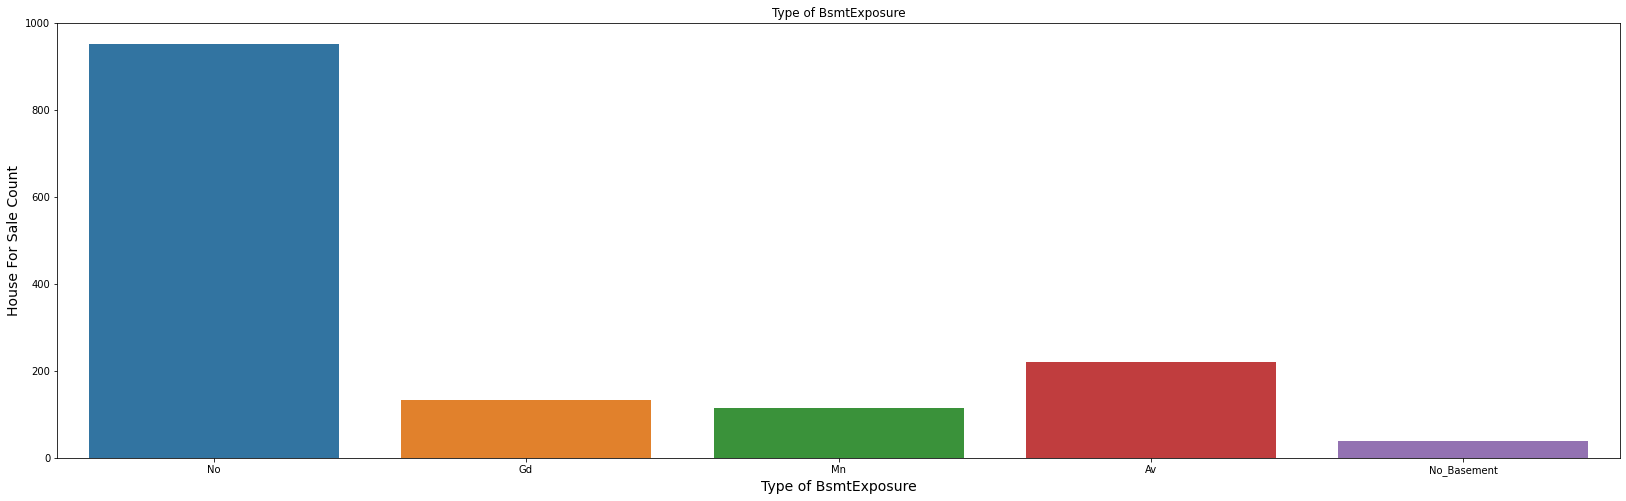

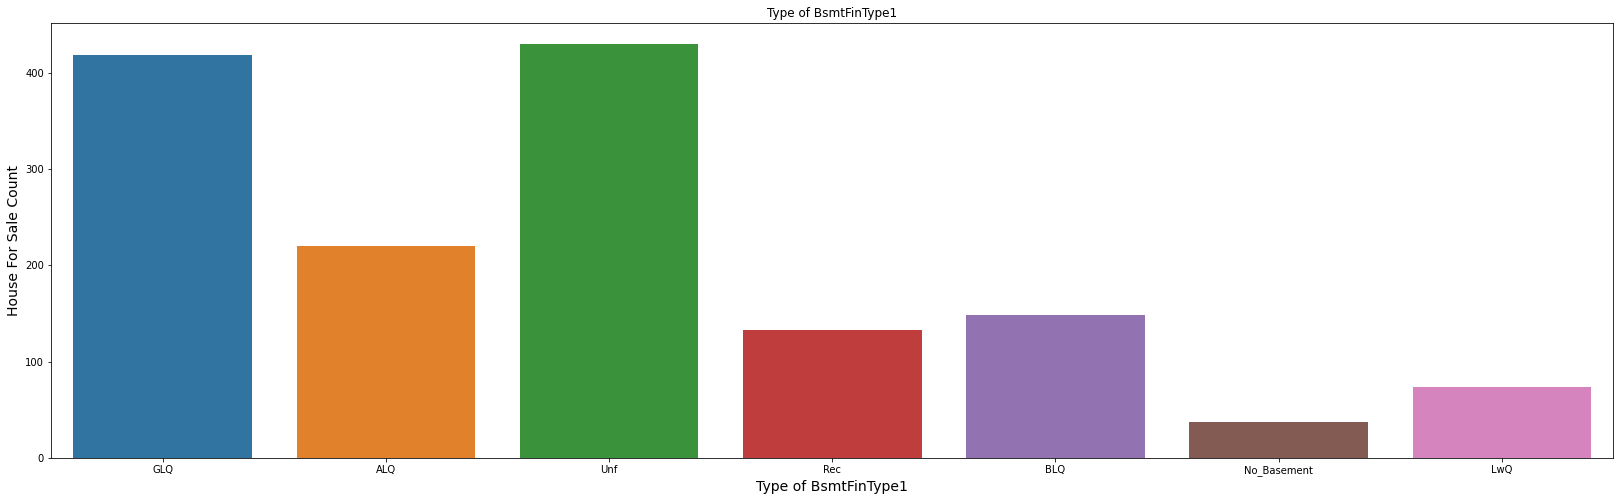

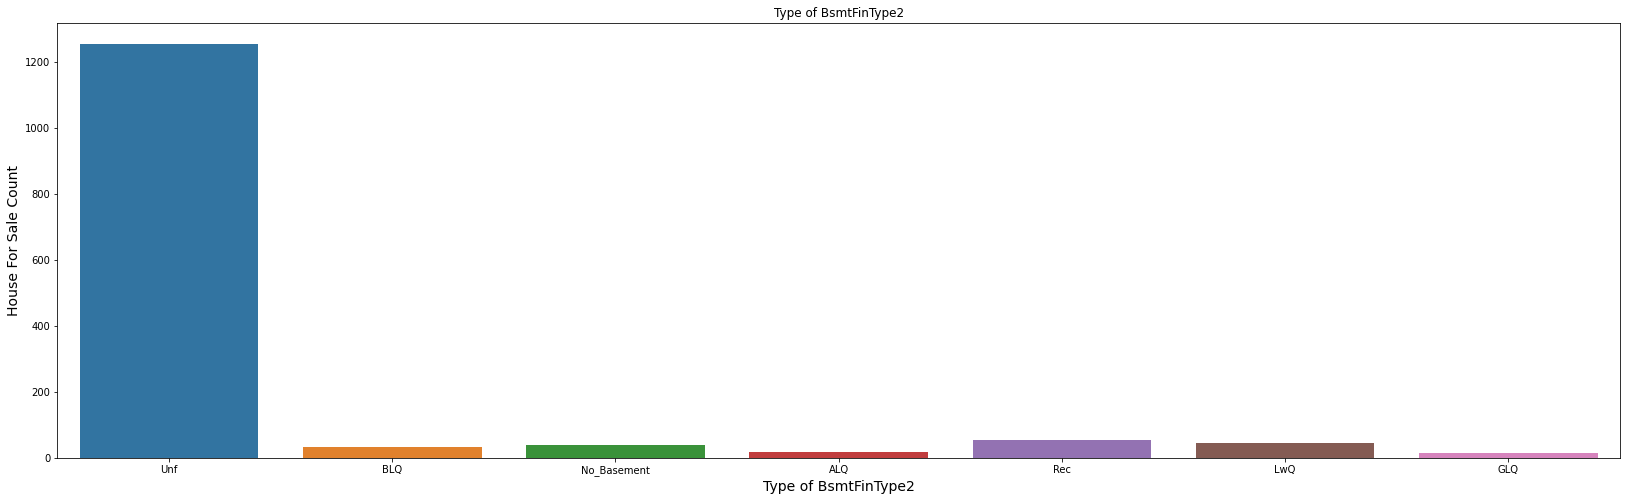

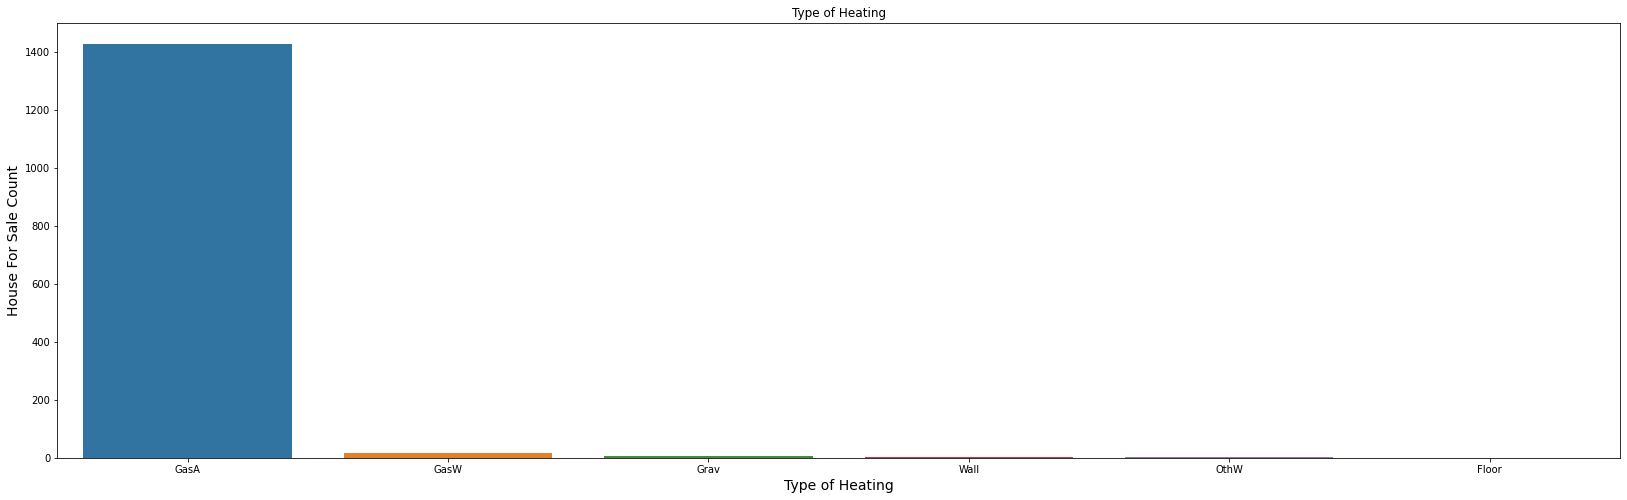

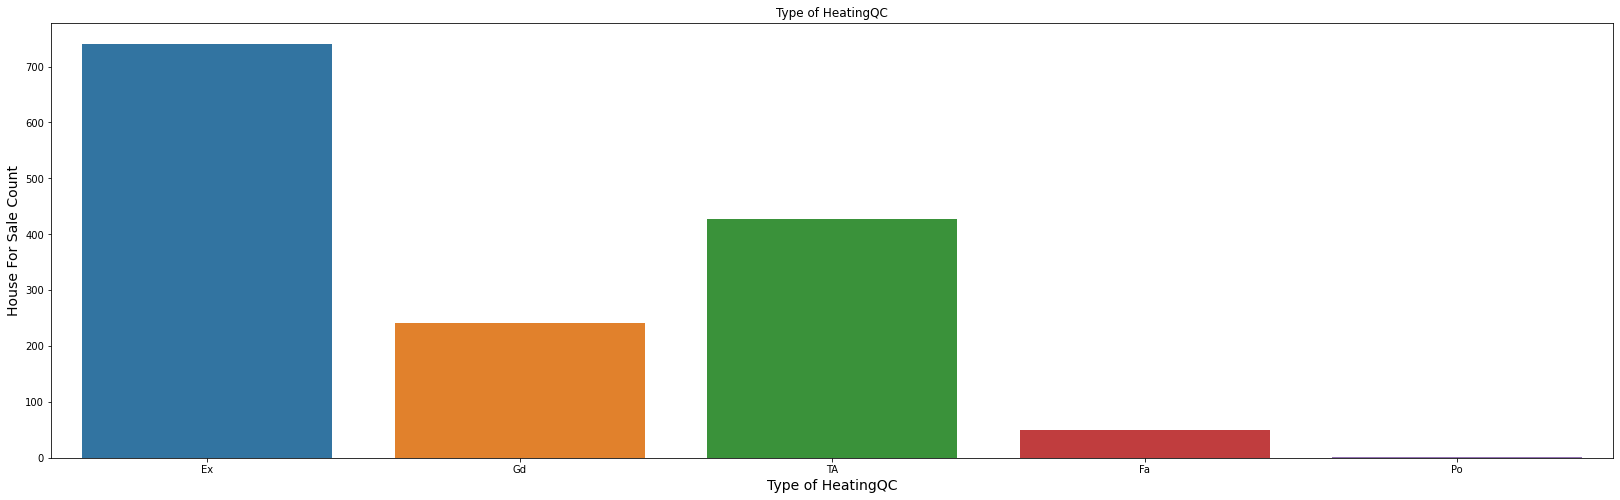

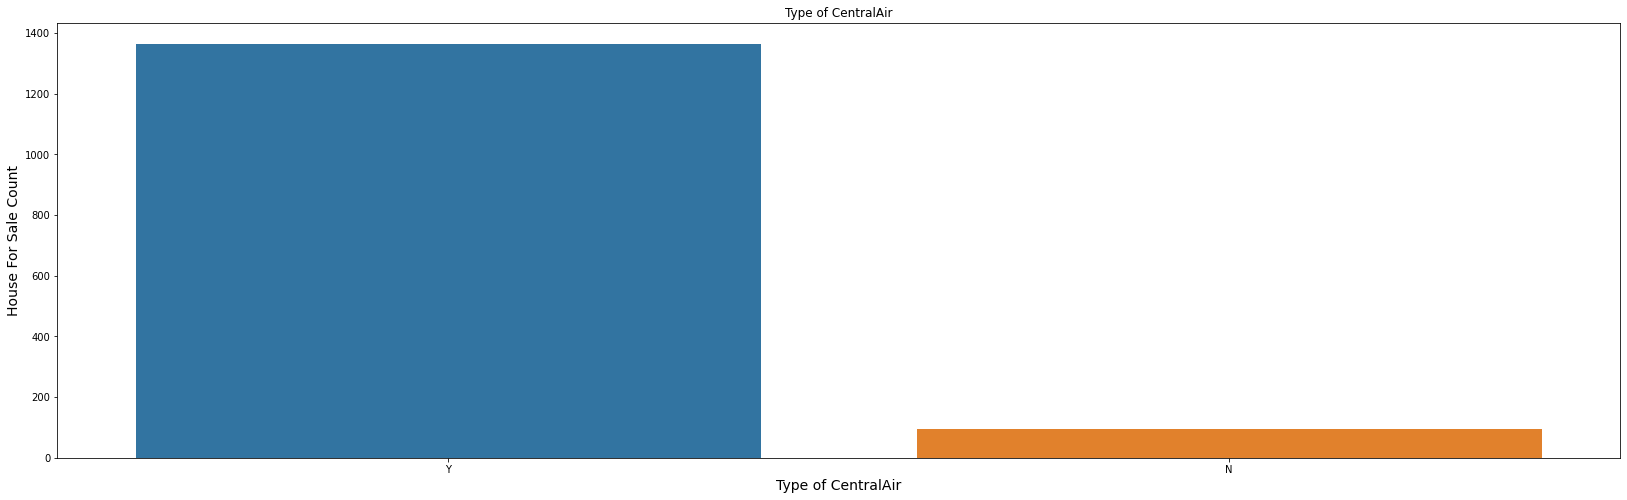

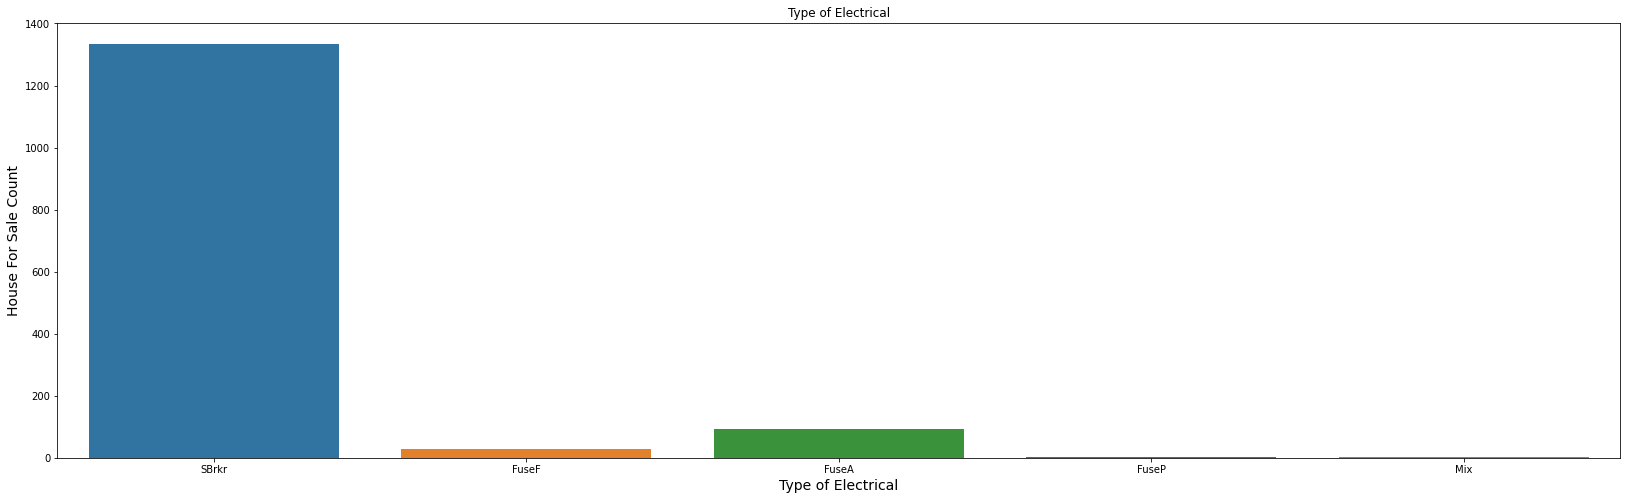

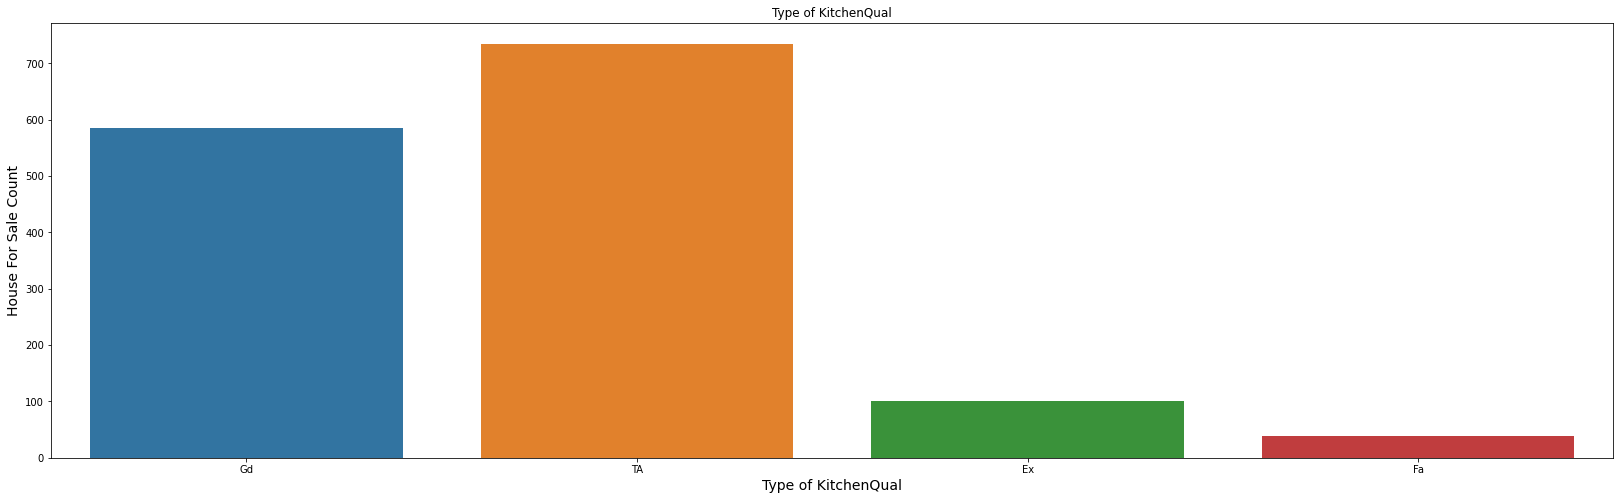

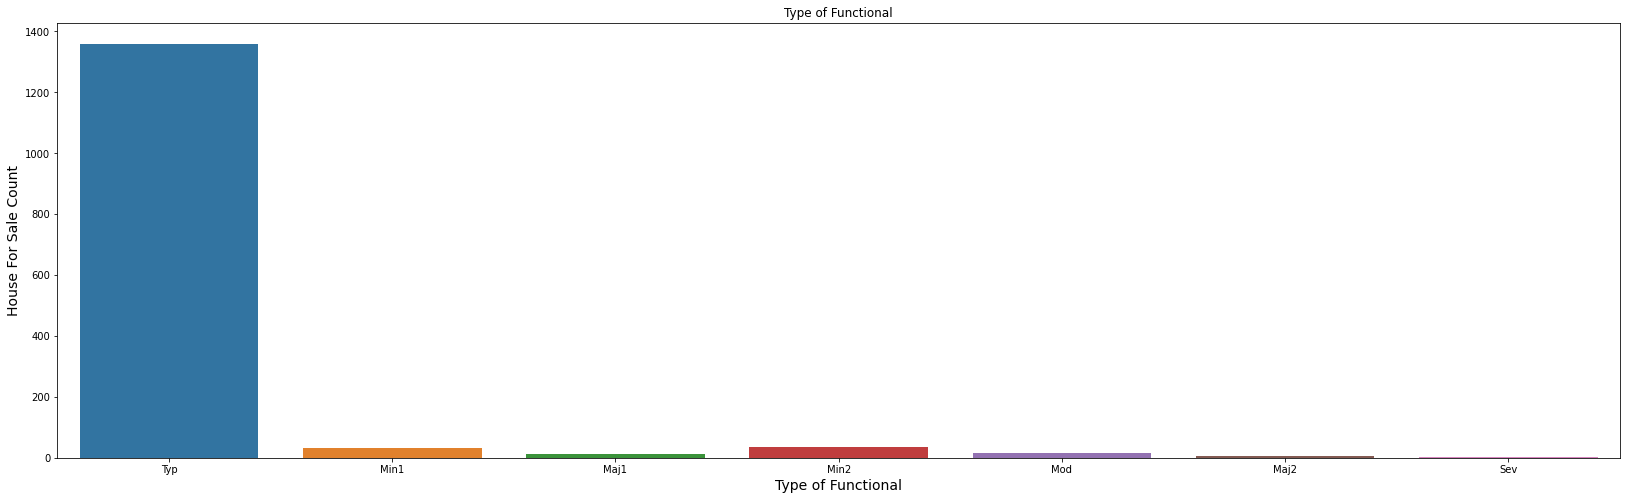

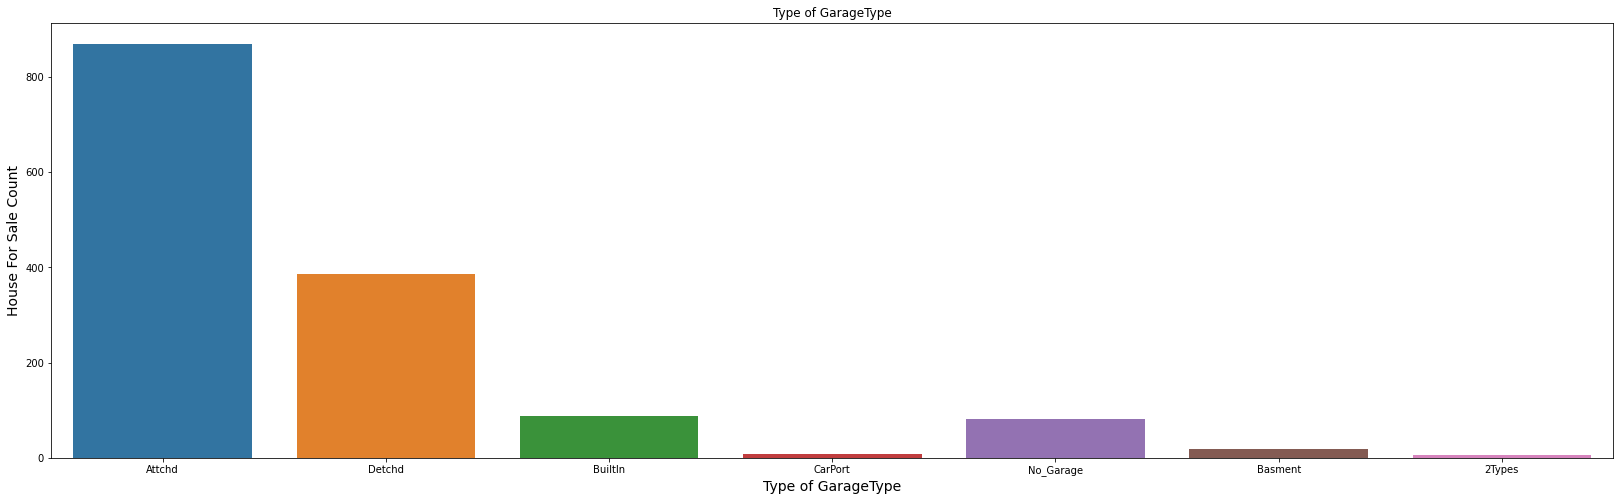

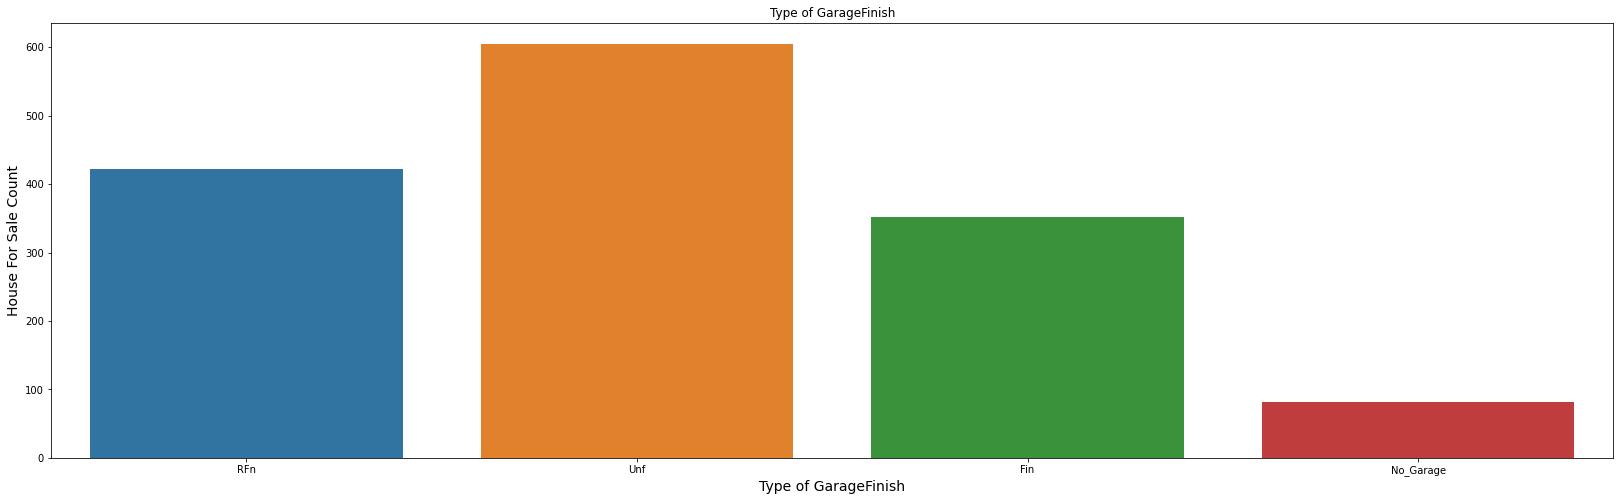

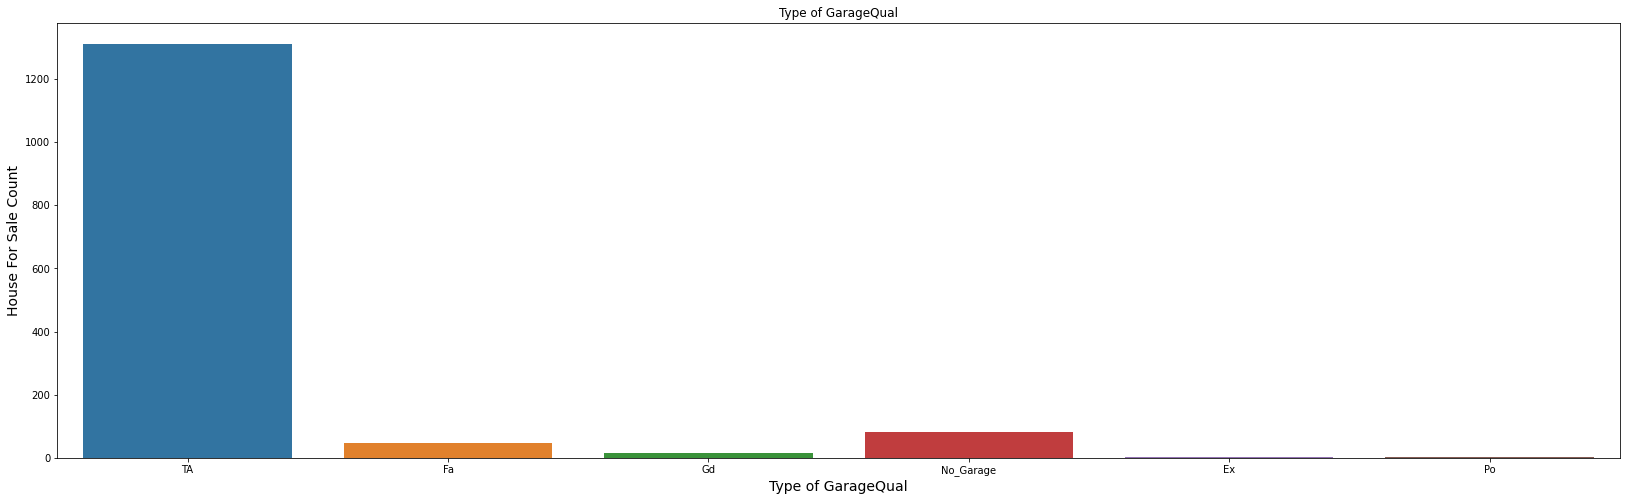

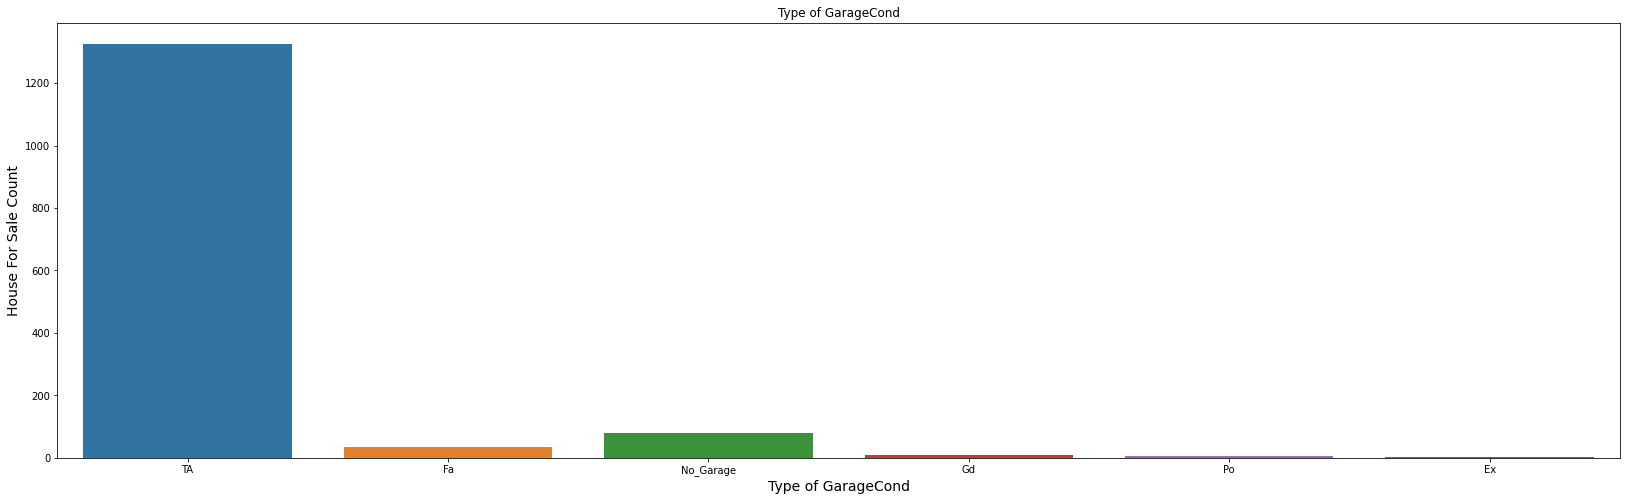

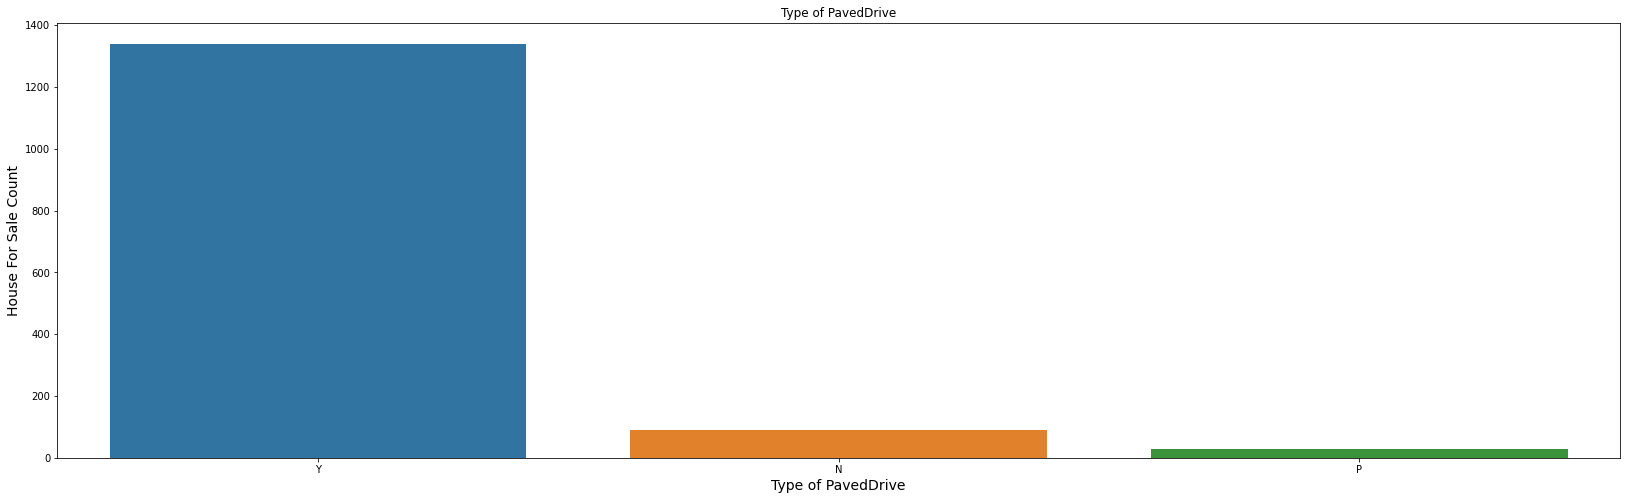

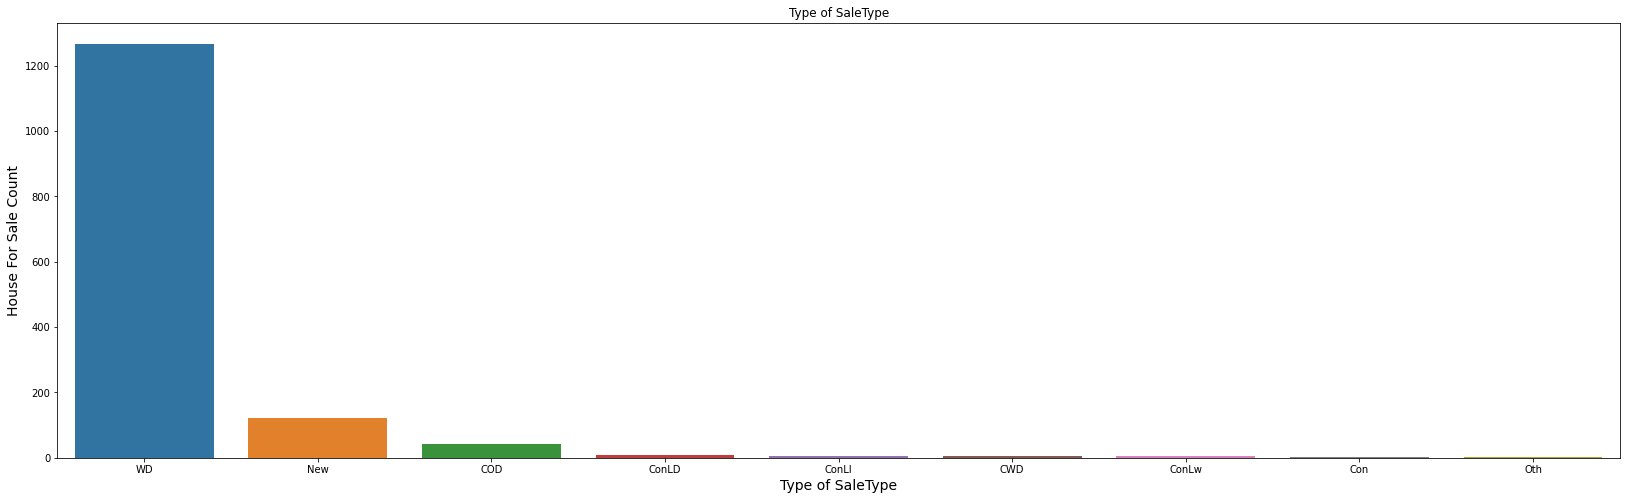

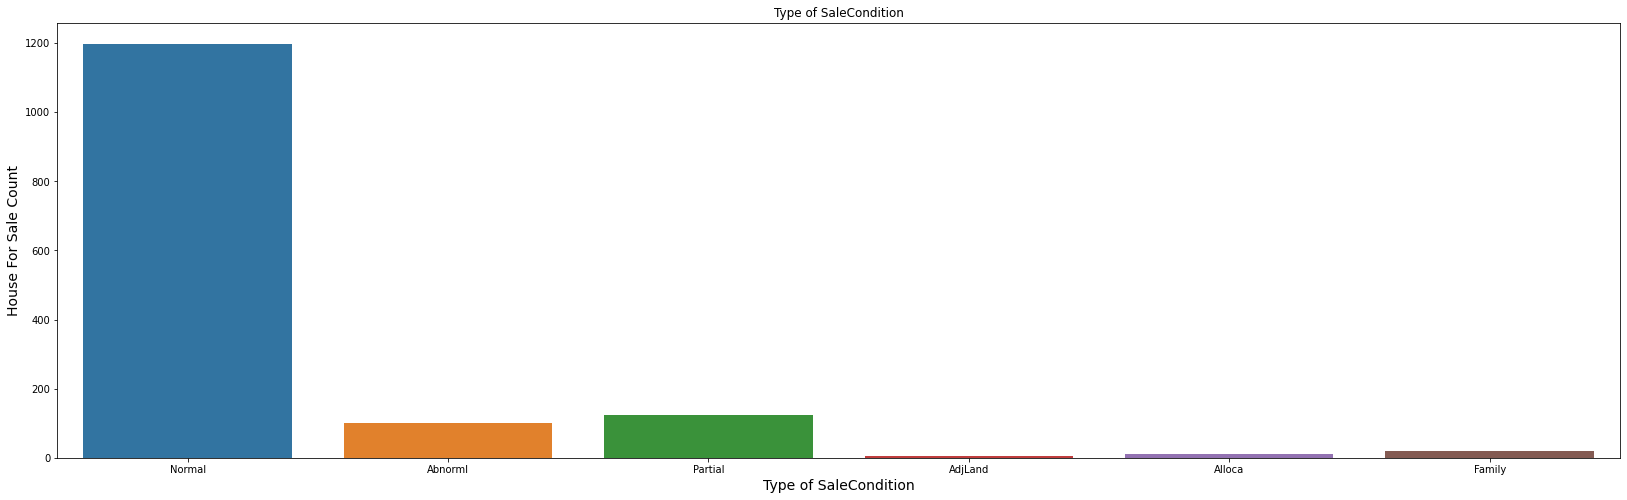

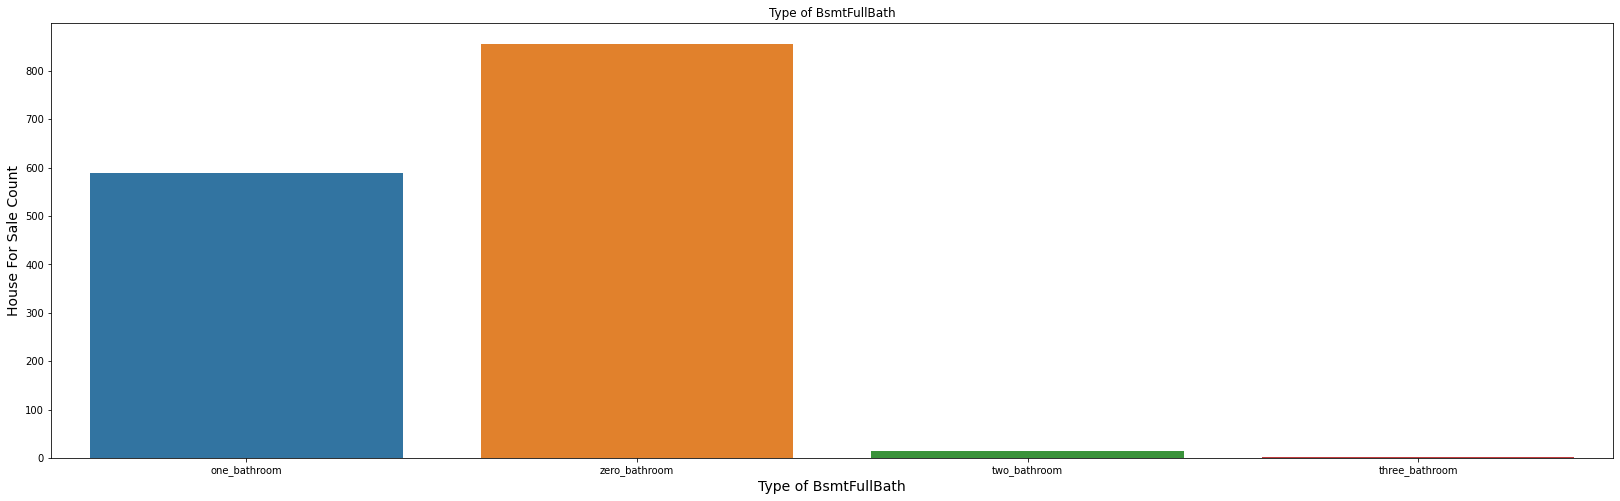

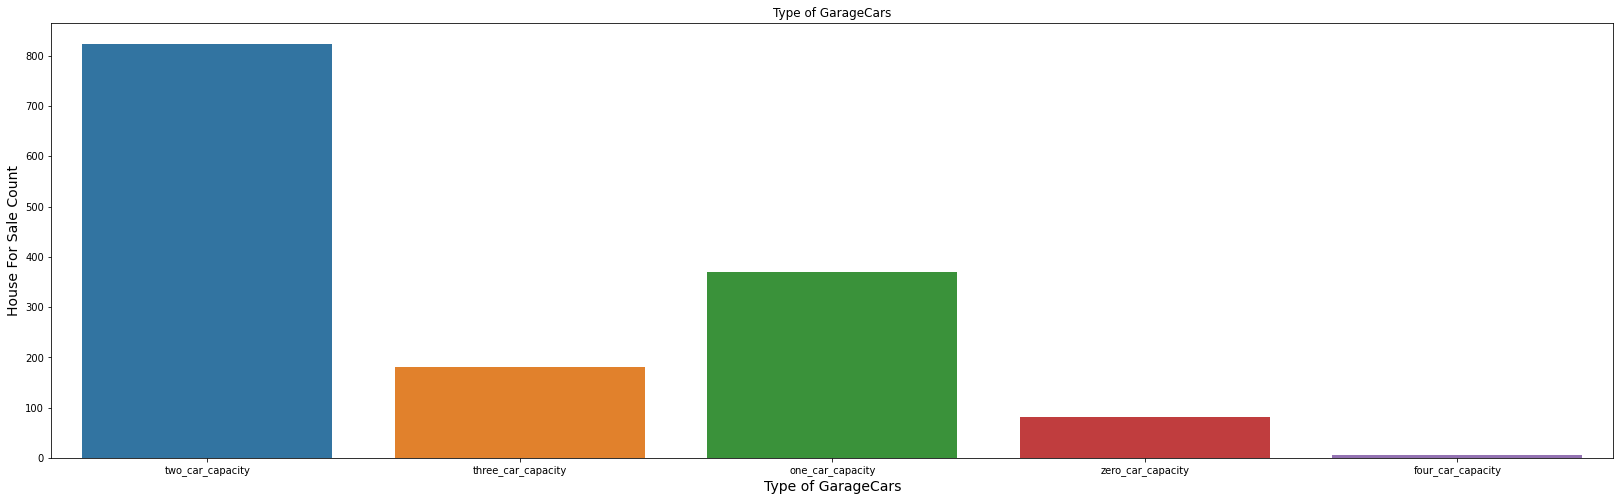

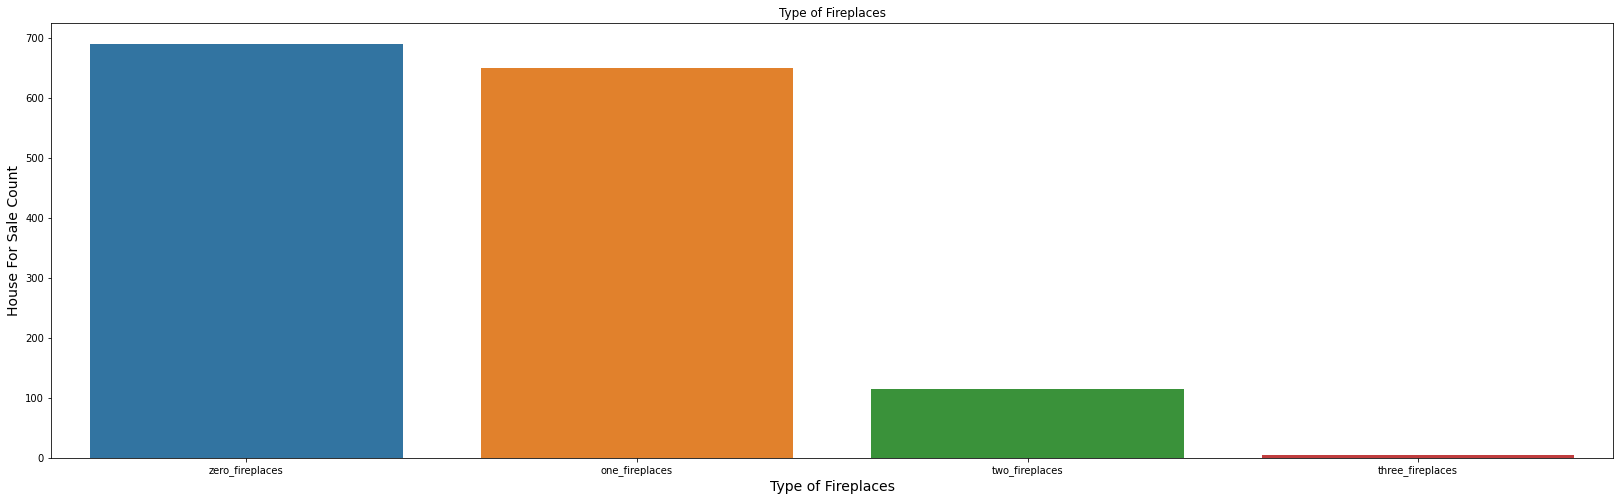

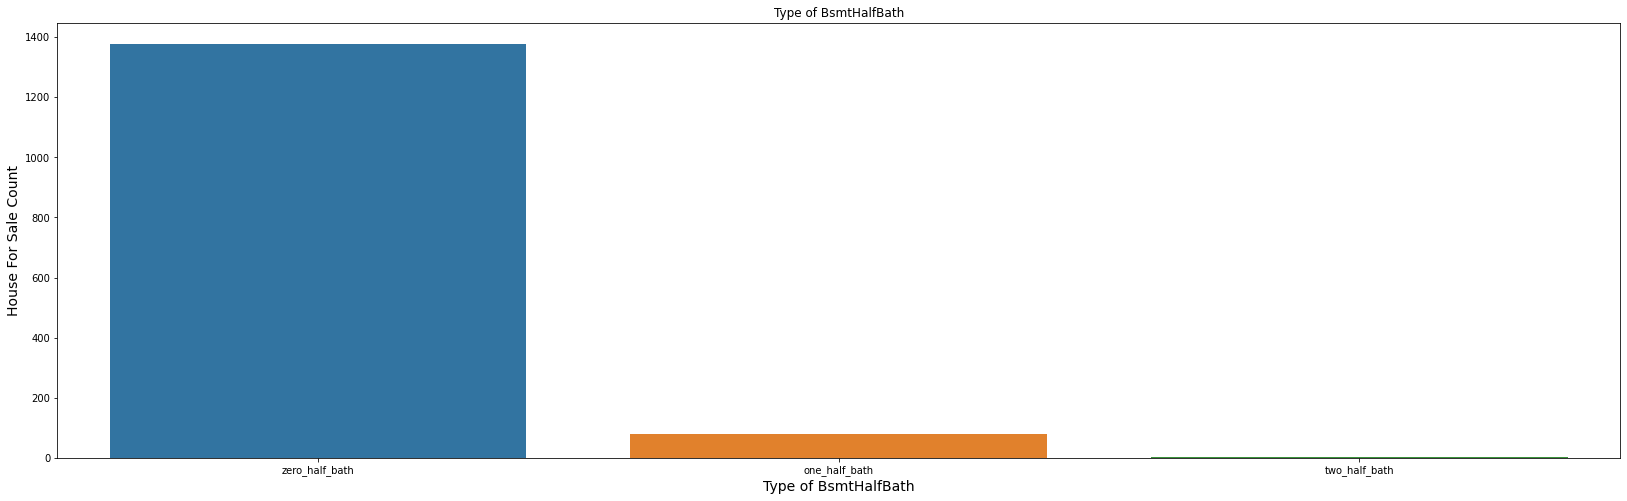

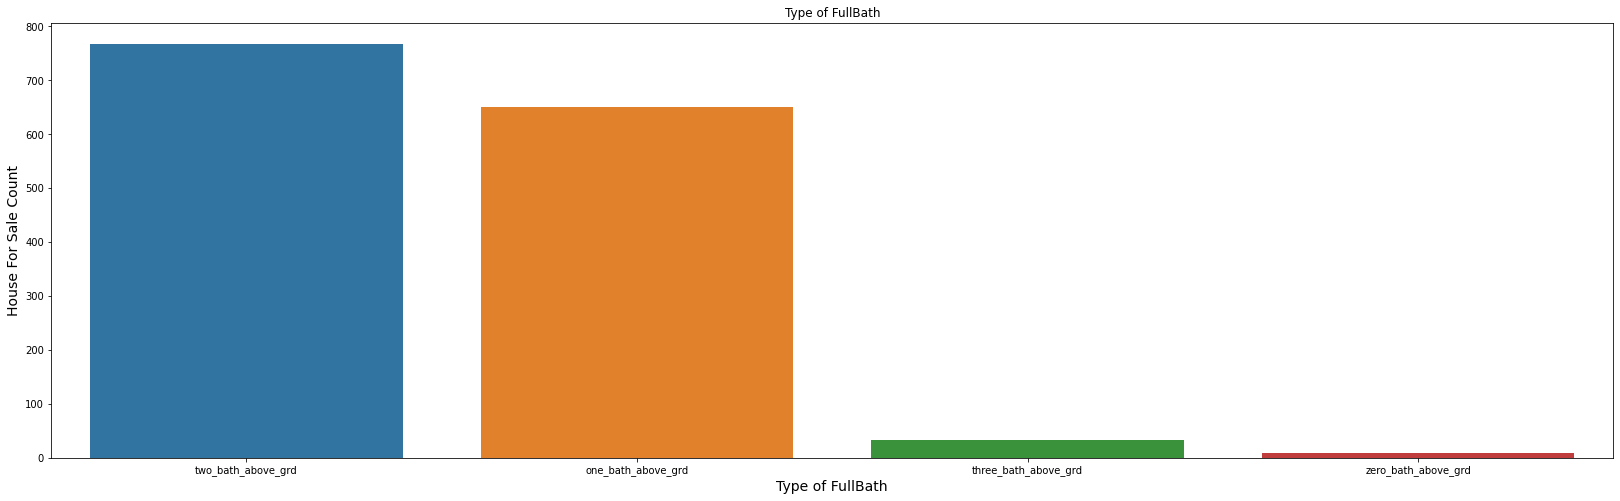

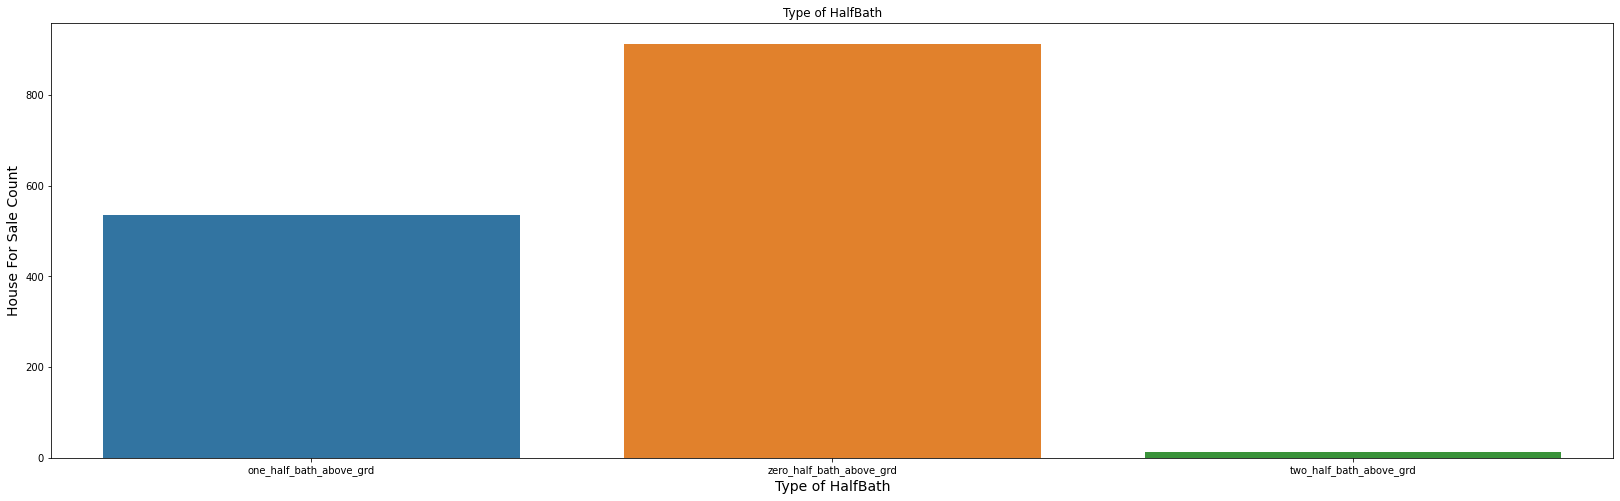

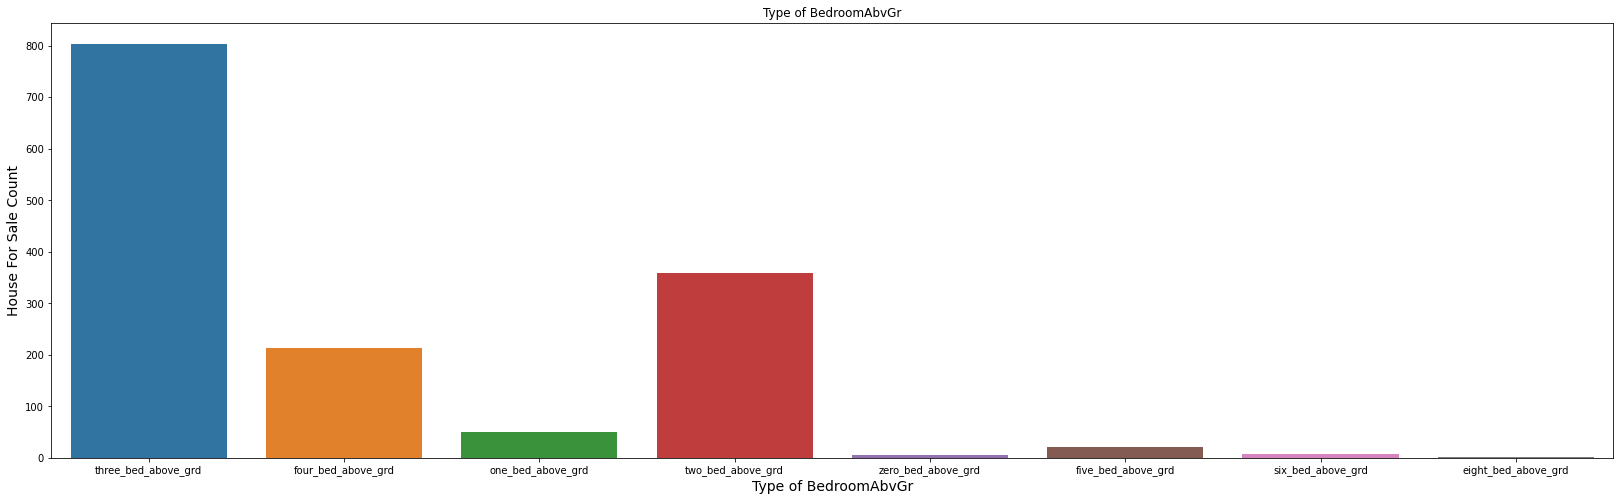

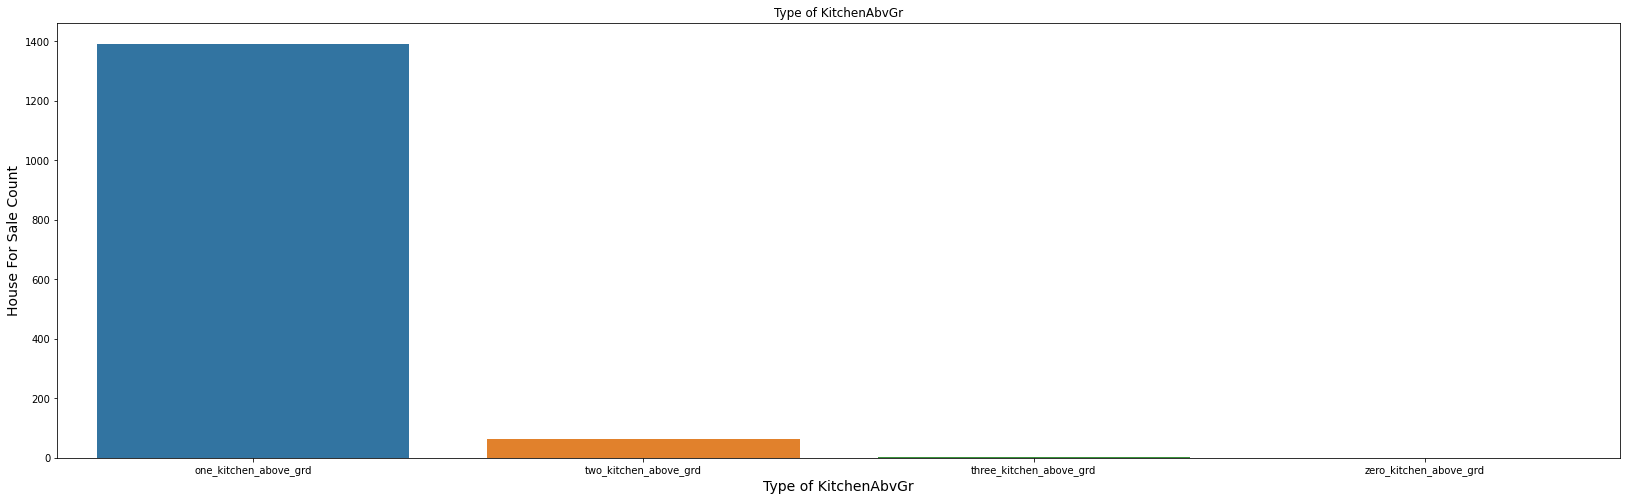

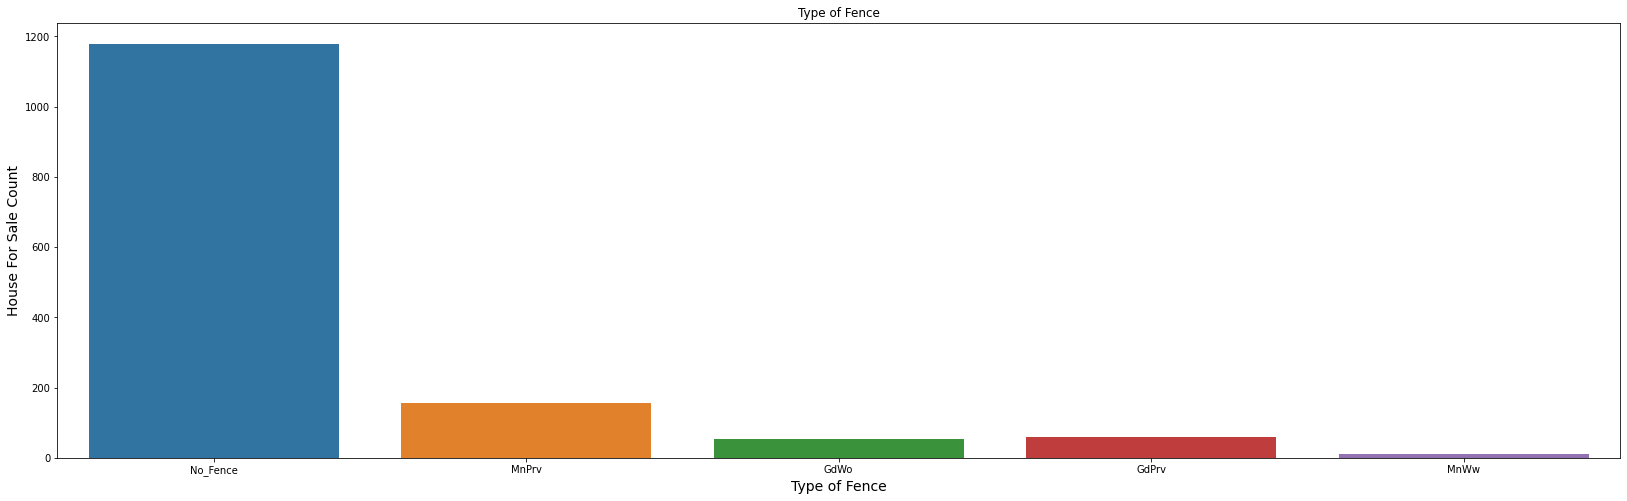

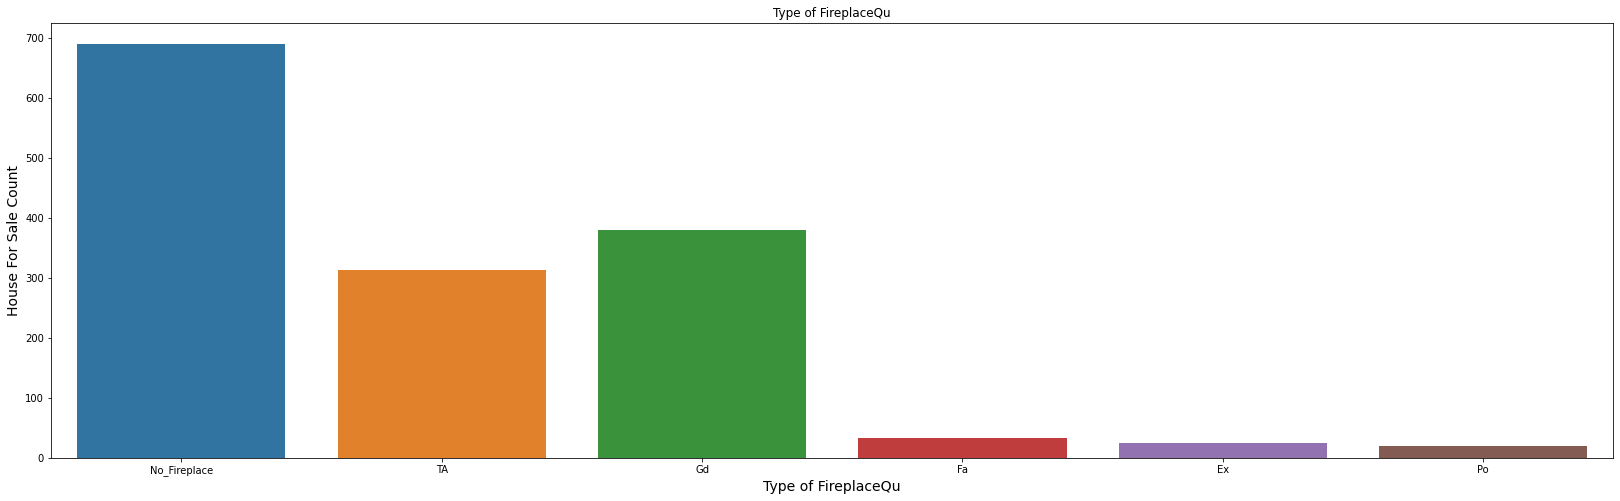

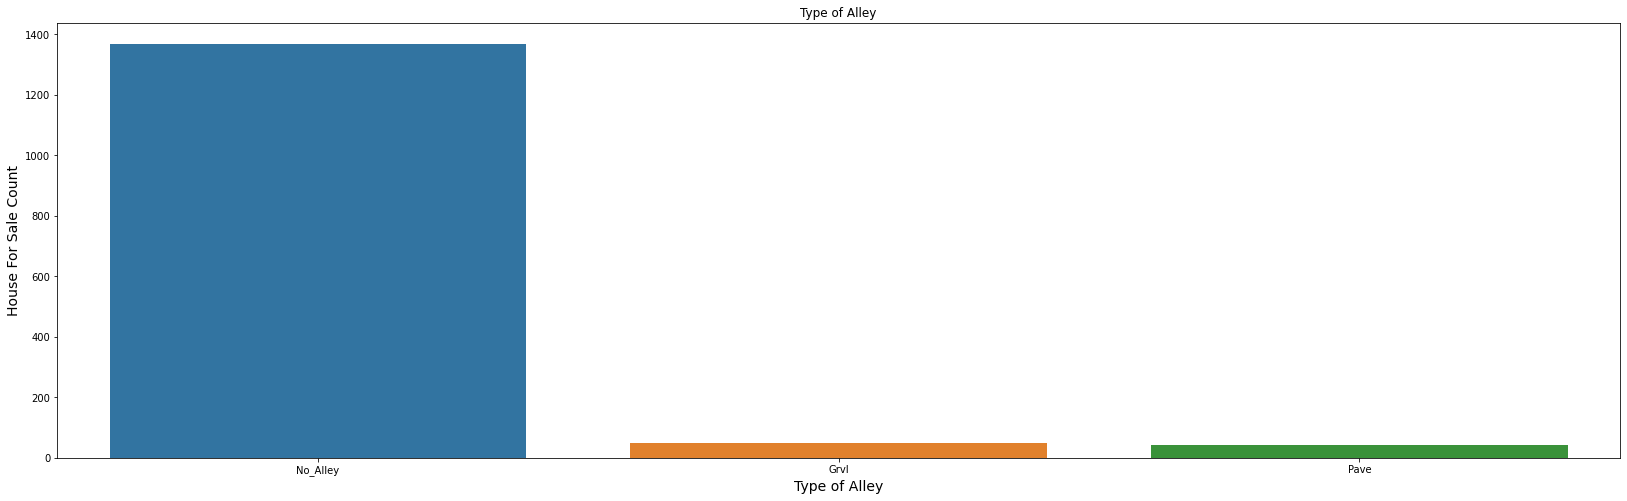

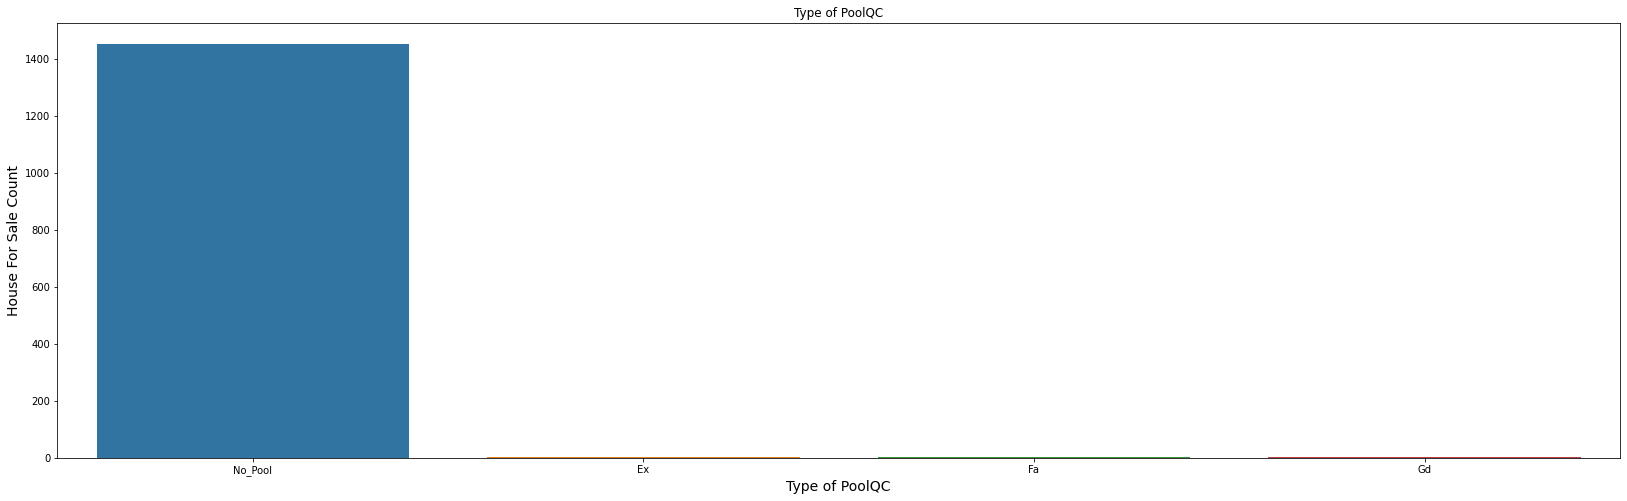

In [2142]:
for cat_feature in categorical:
    countplot_utility(cat_feature)

### From the above categorical feature analysis we can see that there are some of the very important aspect for a house in demand such as Garage, Sale Type and Sale condtion where people are more interested where the condition and sale type is normal.
### Provided a house having good air conditioning and quality also the construction material used in Roof and the size and shape and area situated for a house is also important.
### Apart from this some of the variables such as garagecondition and garage quality might have correlation also overall qualitya nd condition etc. These all variable will be removed while tracking correlation.

# Continous variable/feature analysis

In [16]:
continuous = ['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'TotRmsAbvGrd', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'SalePrice']

In [17]:
housing_price_data_continous_df = housing_price_data_df[continuous]

## Just visualising the data to understand the relationship among each other for continous feature

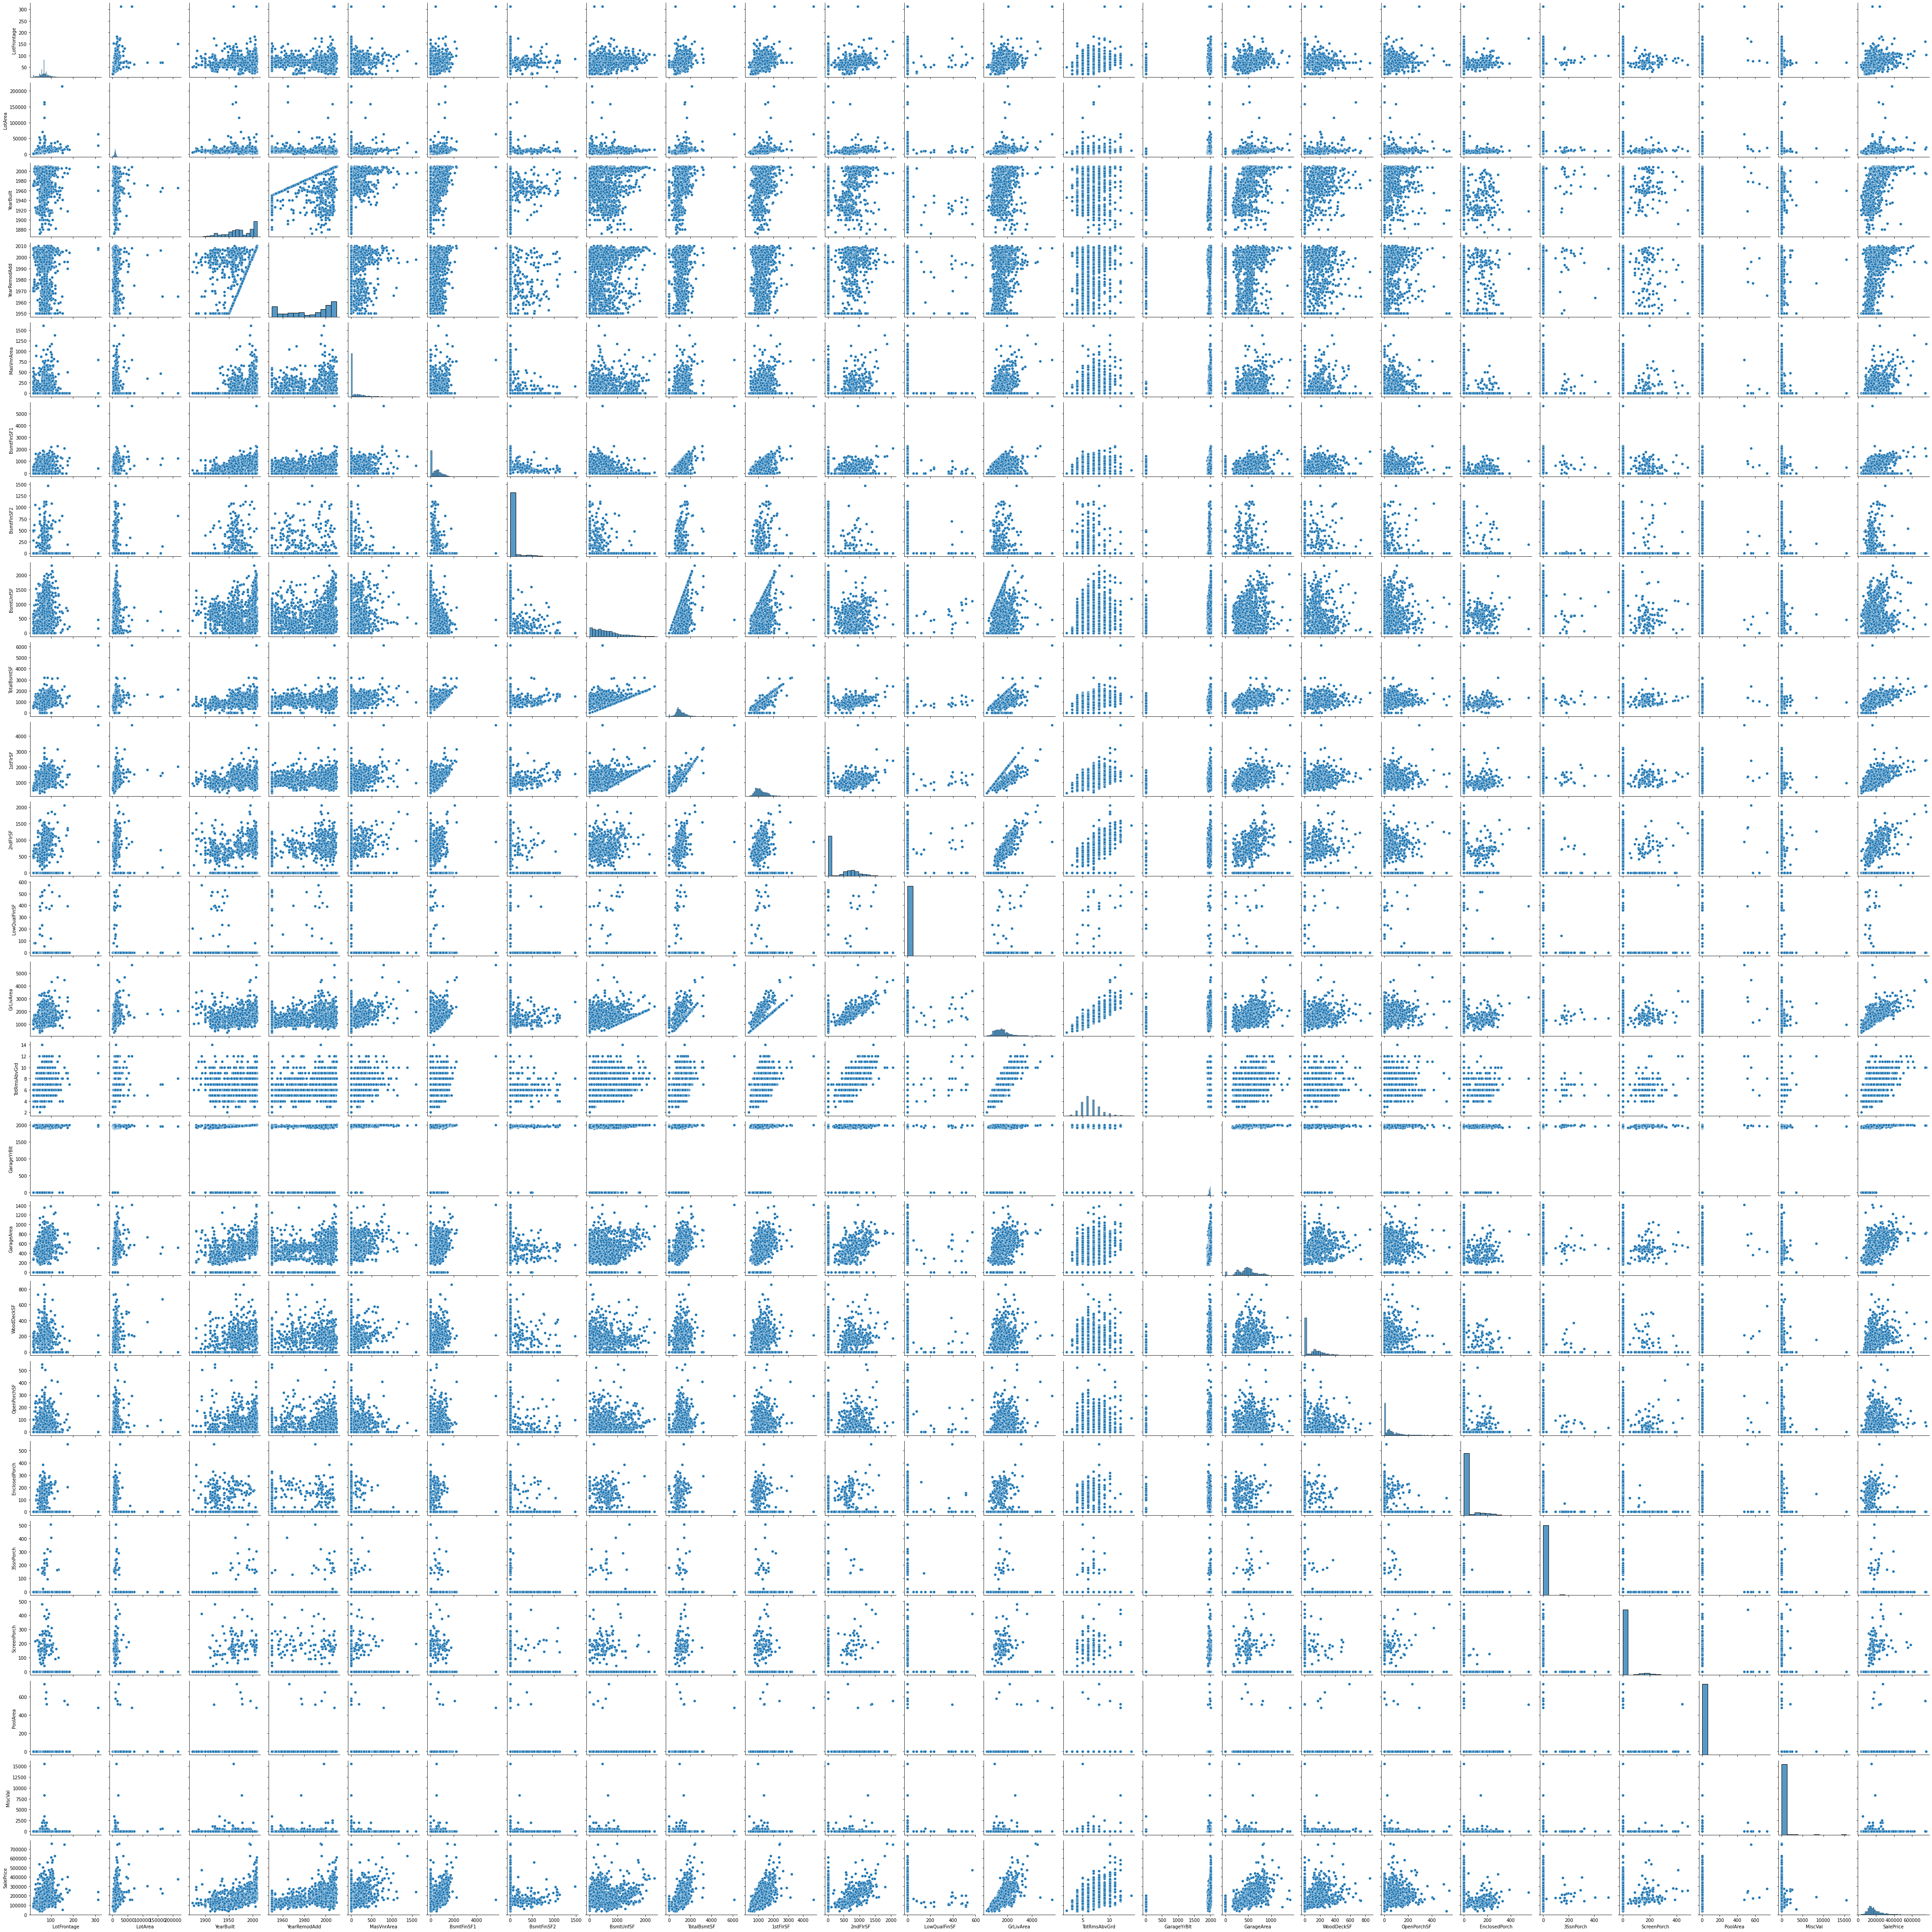

In [2145]:
sns.pairplot(housing_price_data_continous_df)
plt.show()

## Plotting heat map/correlation to find correlation among the continous variable / feature

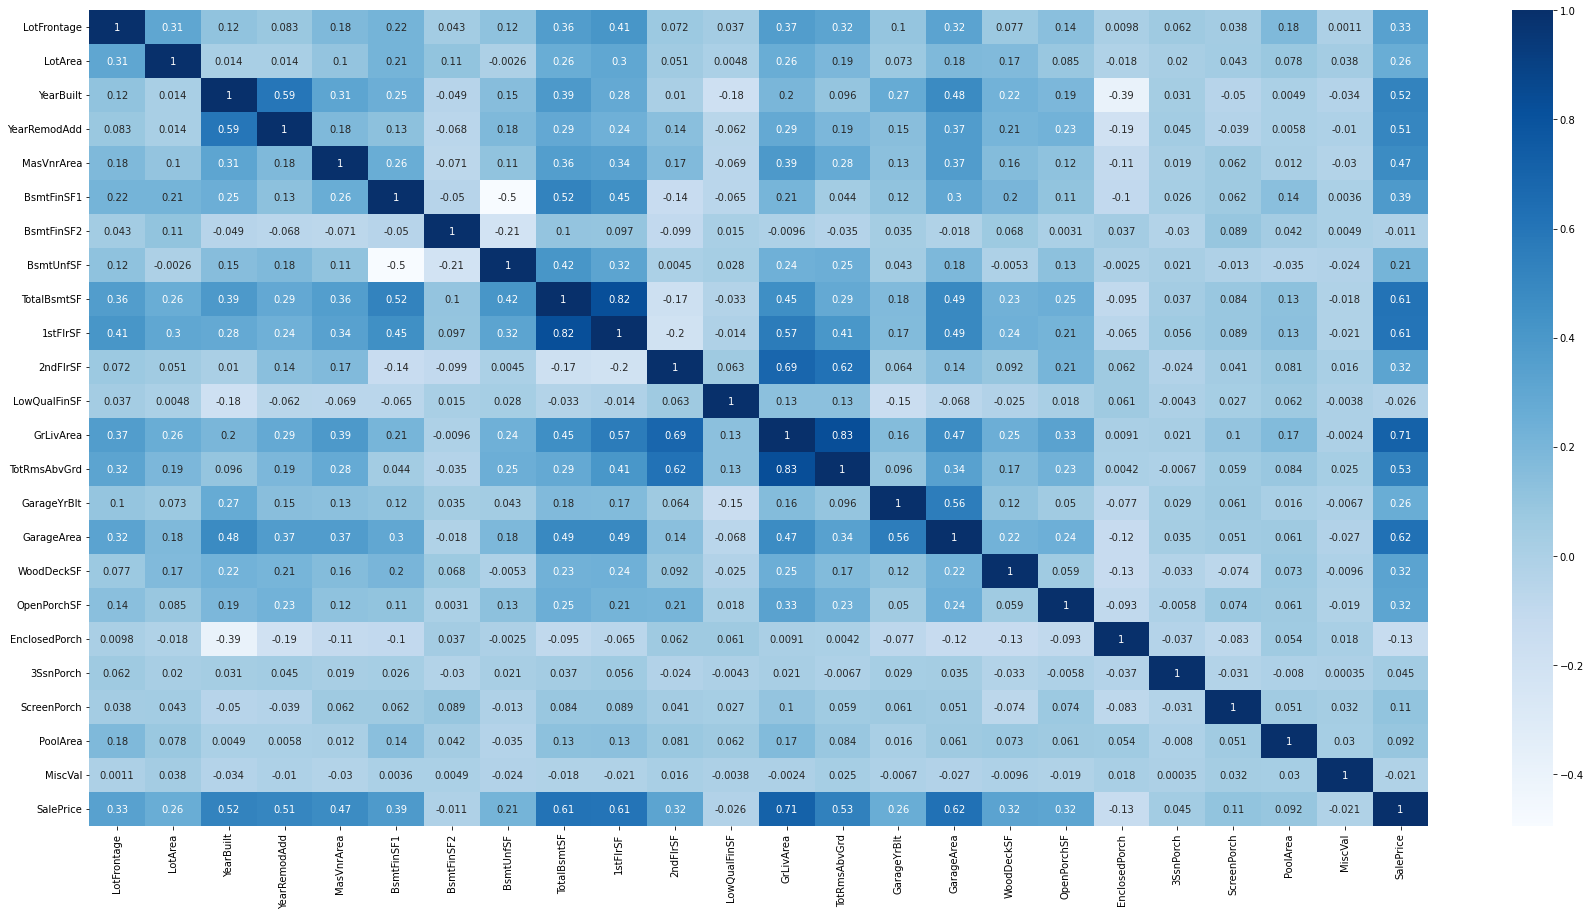

In [2146]:
plt.figure(figsize=(30,15))
sns.heatmap(housing_price_data_continous_df.corr(),annot=True,cmap='Blues')
plt.show()

## Removing outliers and taking data between 5% and 95%

In [18]:
for feature in continuous:
    housing_price_data_df[feature][housing_price_data_df[feature] <= housing_price_data_df[feature].quantile(0.05)] = housing_price_data_df[feature].quantile(0.05)
    housing_price_data_df[feature][housing_price_data_df[feature] >= housing_price_data_df[feature].quantile(0.95)] = housing_price_data_df[feature].quantile(0.95)

## dropping some of the correlated columns in the above image we see feature like TotRmsAbvGrd ,GirLivArea and TotalBsmtSF, 1stFlrSF and GarageYrBuild , GarageArea and yearbuild,yearremodadd

In [19]:
housing_price_data_df = housing_price_data_df.drop(['Id','TotRmsAbvGrd','TotalBsmtSF','YearRemodAdd','GarageYrBlt','YearRemodAdd'],axis=1)

# Creating Dummy Variables

In [20]:
dummies = pd.get_dummies(housing_price_data_df[categorical],drop_first=True)
dummies

MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Pave  \
0               0            0            1            0            1   
1               0            0            1            0            1   
2               0            0            1            0            1   
3               0            0            1            0            1   
4               0            0            1            0            1   
...           ...          ...          ...          ...          ...   
1455            0            0            1            0            1   
1456            0            0            1            0            1   
1457            0            0            1            0            1   
1458            0            0            1            0            1   
1459            0            0            1            0            1   

      LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  \
0                0             0             1                0   
1                0             0             1                0   
2                0             0             0                0   
3                0             0             0                0   
4                0             0             0                0   
...            ...           ...           ...              ...   
1455             0             0             1                0   
1456             0             0             1                0   
1457             0             0             1                0   
1458             0             0             1                0   
1459             0             0             1                0   

      LandContour_Low  LandContour_Lvl  Utilities_NoSeWa  LotConfig_CulDSac  \
0                   0                1                 0                  0   
1                   0                1                 0                  0   
2                   0                1                 0                  0   
3                   0                1                 0                  0   
4                   0                1                 0                  0   
...               ...              ...               ...                ...   
1455                0                1                 0                  0   
1456                0                1                 0                  0   
1457                0                1                 0                  0   
1458                0                1                 0                  0   
1459                0                1                 0                  0   

      LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  LandSlope_Mod  \
0                 0              0                 1              0   
1                 1              0                 0              0   
2                 0              0                 1              0   
3                 0              0                 0              0   
4                 1              0                 0              0   
...             ...            ...               ...            ...   
1455              0              0                 1              0   
1456              0              0                 1              0   
1457              0              0                 1              0   
1458              0              0                 1              0   
1459              0              0                 1              0   

      LandSlope_Sev  Condition1_Feedr  Condition1_Norm  Condition1_PosA  \
0                 0                 0                1                0   
1                 0                 1                0                0   
2                 0                 0                1                0   
3                 0                 0                1                0   
4                 0                 0                1                0   
...             ...               ...              ...              ... 

### Concatenating with the original dataframe

In [21]:
housing_price_data_df = pd.concat([housing_price_data_df,dummies],axis=1)

In [22]:
housing_price_data_df = housing_price_data_df.drop(categorical,axis=1)

In [23]:
housing_price_data_df.head()

LotFrontage  LotArea  YearBuilt  MasVnrArea  BsmtFinSF1  BsmtFinSF2  \
0         65.0   8450.0       2003       196.0         706         0.0   
1         80.0   9600.0       1976         0.0         978         0.0   
2         68.0  11250.0       2001       162.0         486         0.0   
3         60.0   9550.0       1916         0.0         216         0.0   
4         84.0  14260.0       2000       350.0         655         0.0   

   BsmtUnfSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  GarageArea  \
0        150     856.0     854.0             0     1710.0       548.0   
1        284    1262.0       0.0             0     1262.0       460.0   
2        434     920.0     866.0             0     1786.0       608.0   
3        540     961.0     756.0             0     1717.0       642.0   
4        490    1145.0    1053.0             0     2198.0       836.0   

   WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  \
0           0         61.0           0.00          0            0         0   
1         298          0.0           0.00          0            0         0   
2           0         42.0           0.00          0            0         0   
3           0         35.0         180.15          0            0         0   
4         192         84.0           0.00          0            0         0   

   MiscVal  SalePrice  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  \
0        0   208500.0            0            0            1            0   
1        0   181500.0            0            0            1            0   
2        0   223500.0            0            0            1            0   
3        0   140000.0            0            0            1            0   
4        0   250000.0            0            0            1            0   

   Street_Pave  LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  \
0            1             0             0             1                0   
1            1             0             0             1                0   
2            1             0             0             0                0   
3            1             0             0             0                0   
4            1             0             0             0                0   

   LandContour_Low  LandContour_Lvl  Utilities_NoSeWa  LotConfig_CulDSac  \
0                0                1                 0                  0   
1                0                1                 0                  0   
2                0                1                 0                  0   
3                0                1                 0                  0   
4                0                1                 0                  0   

   LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  LandSlope_Mod  \
0              0              0                 1              0   
1              1              0                 0              0   
2              0              0                 1              0   
3              0              0                 0              0   
4              1              0                 0              0   

   LandSlope_Sev  Condition1_Feedr  Condition1_Norm  Condition1_PosA  \
0              0                 0                1                0   
1              0                 1                0                0   
2              0                 0                1                0   
3              0                 0                1                0   
4              0                 0                1                0   

   Condition1_PosN  Condition1_RRAe  Condition1_RRAn  Condition1_RRNe  \
0                0                0                0                0   
1                0                0                0                0   
2                0                0                0                0   
3                0                0                0                0   
4                0                0                0  

In [24]:
housing_price_data_df.shape

(1460, 252)

## Splitting into train and test data

In [106]:
housing_data_train,housing_data_test = train_test_split(housing_price_data_df,train_size = 0.7, test_size = 0.3, random_state = 100)
print(housing_data_train.shape)
print(housing_data_test.shape)

(1021, 252)
(438, 252)


## Rescaling the features using MInMax scaler

In [107]:
mm_scaler = MinMaxScaler()

In [108]:

#list of the numeric variables

removed_continous_features = ['id','YearRemodAdd', 'TotalBsmtSF', 'TotRmsAbvGrd', 'GarageYrBlt']

numeric_scalable_vars = list(set(continuous) - set(removed_continous_features))

#scaling the numeric variables using fit_transform

housing_data_train[numeric_scalable_vars] = mm_scaler.fit_transform(housing_data_train[numeric_scalable_vars])
housing_data_train.head()


LotFrontage   LotArea  YearBuilt  MasVnrArea  BsmtFinSF1  BsmtFinSF2  \
210      0.456282  0.162696   0.098901    0.000000    0.367347         0.0   
318      0.794269  0.467605   0.846154    0.561404    0.774725         0.0   
239      0.235856  0.385345   0.318681    0.000000    0.073783         0.0   
986      0.338722  0.141830   0.000000    0.000000    0.000000         0.0   
1416     0.353417  0.569809   0.000000    0.000000    0.000000         0.0   

      BsmtUnfSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  GarageArea  \
210    0.269755  0.164940  0.000000           0.0   0.009888    0.000000   
318    0.245232  0.603514  1.000000           0.0   1.000000    0.771674   
239    0.436649  0.107960  0.603830           0.0   0.394908    0.258793   
986    0.330381  0.283217  0.555629           0.0   0.486373    0.299965   
1416   0.529292  0.494734  0.914947           0.0   0.891169    0.658746   

      WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
210          0.0     0.000000       0.532889        0.0          0.0   
318          1.0     0.342759       0.799334        0.0          0.0   
239          0.0     0.799771       0.000000        0.0          0.0   
986          1.0     0.000000       0.000000        0.0          0.0   
1416         0.0     0.000000       0.632806        0.0          0.0   

      PoolArea  MiscVal  SalePrice  MSZoning_FV  MSZoning_RH  MSZoning_RL  \
210        0.0      0.0   0.041999            0            0            1   
318        0.0      0.0   0.722386            0            0            1   
239        0.0      0.0   0.104998            0            0            1   
986        0.0      0.0   0.121798            0            0            0   
1416       0.0      0.0   0.144897            0            0            0   

      MSZoning_RM  Street_Pave  LotShape_IR2  LotShape_IR3  LotShape_Reg  \
210             0            1             0             0             1   
318             0            1             0             0             1   
239             0            1             0             0             1   
986             1            1             0             0             1   
1416            1            1             0             0             1   

      LandContour_HLS  LandContour_Low  LandContour_Lvl  Utilities_NoSeWa  \
210                 0                0                1                 0   
318                 0                1                0                 0   
239                 0                0                1                 0   
986                 0                0                1                 0   
1416                0                0                1                 0   

      LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  \
210                   0              0              0                 1   
318                   0              0              0                 1   
239                   0              0              0                 1   
986                   0              0              0                 0   
1416                  0              0              0                 1   

      LandSlope_Mod  LandSlope_Sev  Condition1_Feedr  Condition1_Norm  \
210               0              0                 0                1   
318               1              0                 0                1   
239               0              0                 0                1   
986               0              0                 1                0   
1416              0              0                 0                1   

      Condition1_PosA  Condition1_PosN  Condition1_RRAe  Condition1_RRAn  \
210                 0                0                0                0   
318                 0                0                0                0   
239                 0                0                0                0   
986                 0                0                0               

## We will try to build the model with all the variable and then apply RFE to remove feature 

In [109]:
#Dividing the traing data into x train and y train
y_train = housing_data_train.pop('SalePrice')
X_train = housing_data_train

In [110]:
X_train.head()

LotFrontage   LotArea  YearBuilt  MasVnrArea  BsmtFinSF1  BsmtFinSF2  \
210      0.456282  0.162696   0.098901    0.000000    0.367347         0.0   
318      0.794269  0.467605   0.846154    0.561404    0.774725         0.0   
239      0.235856  0.385345   0.318681    0.000000    0.073783         0.0   
986      0.338722  0.141830   0.000000    0.000000    0.000000         0.0   
1416     0.353417  0.569809   0.000000    0.000000    0.000000         0.0   

      BsmtUnfSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  GarageArea  \
210    0.269755  0.164940  0.000000           0.0   0.009888    0.000000   
318    0.245232  0.603514  1.000000           0.0   1.000000    0.771674   
239    0.436649  0.107960  0.603830           0.0   0.394908    0.258793   
986    0.330381  0.283217  0.555629           0.0   0.486373    0.299965   
1416   0.529292  0.494734  0.914947           0.0   0.891169    0.658746   

      WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
210          0.0     0.000000       0.532889        0.0          0.0   
318          1.0     0.342759       0.799334        0.0          0.0   
239          0.0     0.799771       0.000000        0.0          0.0   
986          1.0     0.000000       0.000000        0.0          0.0   
1416         0.0     0.000000       0.632806        0.0          0.0   

      PoolArea  MiscVal  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  \
210        0.0      0.0            0            0            1            0   
318        0.0      0.0            0            0            1            0   
239        0.0      0.0            0            0            1            0   
986        0.0      0.0            0            0            0            1   
1416       0.0      0.0            0            0            0            1   

      Street_Pave  LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  \
210             1             0             0             1                0   
318             1             0             0             1                0   
239             1             0             0             1                0   
986             1             0             0             1                0   
1416            1             0             0             1                0   

      LandContour_Low  LandContour_Lvl  Utilities_NoSeWa  LotConfig_CulDSac  \
210                 0                1                 0                  0   
318                 1                0                 0                  0   
239                 0                1                 0                  0   
986                 0                1                 0                  0   
1416                0                1                 0                  0   

      LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  LandSlope_Mod  \
210               0              0                 1              0   
318               0              0                 1              1   
239               0              0                 1              0   
986               0              0                 0              0   
1416              0              0                 1              0   

      LandSlope_Sev  Condition1_Feedr  Condition1_Norm  Condition1_PosA  \
210               0                 0                1                0   
318               0                 0                1                0   
239               0                 0                1                0   
986               0                 1                0                0   
1416              0                 0                1                0   

      Condition1_PosN  Condition1_RRAe  Condition1_RRAn  Condition1_RRNe  \
210                 0                0                0                0   
318                 0                0                0                0   
239                 0                0                0                0   
986                 0             

In [111]:

X_train = X_train.drop(['KitchenAbvGr_zero_kitchen_above_grd','Fence_MnPrv','FireplaceQu_TA','FireplaceQu_Po','FullBath_two_bath_above_grd',
                       'SaleType_Oth','GarageCond_Po','BsmtHalfBath_two_half_bath','LotShape_IR2','1stFlrSF','BsmtFinSF2',
                       'PoolArea','EnclosedPorch','BsmtFinType1_BLQ','Condition1_RRNe','Exterior1st_CemntBd','Heating_GasA','FullBath_zero_bath_above_grd',
                        'Exterior1st_BrkComm','GarageCars_zero_car_capacity','GarageQual_No_Garage','GarageType_No_Garage','GarageFinish_No_Garage',
                       'BsmtQual_Gd','BsmtQual_No_Basement','LowQualFinSF','LotFrontage','BsmtFinType1_No_Basement','SaleCondition_Partial'
                       ,'FireplaceQu_No_Fireplace','OverallCond_Very Poor','BsmtCond_Po','FireplaceQu_No_Fireplace'],axis=1)
x_train_constant = sm.add_constant(X_train)

#creating model

housing_lr = sm.OLS(y_train,x_train_constant)

#fitting the model

lm = housing_lr.fit()

#retrieving the summary

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     65.72
Date:                Wed, 26 Jul 2023   Prob (F-statistic):               0.00
Time:                        17:45:49   Log-Likelihood:                 1367.4
No. Observations:                1021   AIC:                            -2305.
Df Residuals:                     806   BIC:                            -1245.
Df Model:                         214                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                   -0.0274      0.180     -0.152      0.879      -0.381       0.326
LotArea                                  0.0643      0.017      3.730      0.000       0.030       0.098
YearBuilt                                0.1760      0.029      6.159      0.000       0.120       0.232
MasVnrArea                               0.0296      0.015      2.010      0.045       0.001       0.058
BsmtFinSF1                               0.0763      0.021      3.563      0.000       0.034       0.118
BsmtUnfSF                                0.0354      0.023      1.520      0.129      -0.010       0.081
2ndFlrSF                                 0.0639      0.030      2.129      0.034       0.005       0.123
GrLivArea                                0.4472      0.027     16.378      0.000       0.394       0.501
GarageArea                               0.1524      0.030      5.161      0.000       0.094       0.210
WoodDeckSF                               0.0238      0.009      2.773      0.006       0.007       0.041
OpenPorchSF                              0.0214      0.010      2.230      0.026       0.003       0.040
3SsnPorch                            -5.559e-16   4.15e-16     -1.340      0.181   -1.37e-15    2.58e-16
ScreenPorch                              0.0111      0.010      1.085      0.278      -0.009       0.031
MiscVal                              -1.143e-16    4.6e-16     -0.248      0.804   -1.02e-15    7.89e-16
MSZoning_FV                              0.0742      0.045      1.632      0.103      -0.015       0.163
MSZoning_RH                              0.0803      0.045      1.795      0.073      -0.007       0.168
MSZoning_RL                              0.0728      0.039      1.881      0.060      -0.003       0.149
MSZoning_RM                              0.0643      0.036      1.771      0.077      -0.007       0.136
Street_Pave                              0.0472      0.050      0.936      0.350      -0.052       0.146
LotShape_IR3                             0.0678      0.030      2.223      0.026       0.008       0.128
LotShape_Reg                             0.0049      0.006      0.798      0.425      -0.007       0.017
LandContour_HLS                          0.0590      0.020      2.958      0.003       0.020       0.098
LandContour_Low                          0.0410      0.024      1.744      0.082      -0.005       0.087
LandContour_Lvl                          0.0471      0.014      3.293      0.001       0.019       0.075
Utilities_NoSeWa                        -0.1044      0.087     -1.195      0.233      -0.276       0.067
LotConfig_CulDSac                        0.0176      0.012      1.431      0.153      -0.007       0.042
LotConfig_FR2                         

In [112]:
X_train.shape

(1021, 219)

In [113]:
x_train_constant.columns

Index(['const', 'LotArea', 'YearBuilt', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtUnfSF', '2ndFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF',
       ...
       'Fence_GdWo', 'Fence_MnWw', 'Fence_No_Fence', 'FireplaceQu_Fa',
       'FireplaceQu_Gd', 'Alley_No_Alley', 'Alley_Pave', 'PoolQC_Fa',
       'PoolQC_Gd', 'PoolQC_No_Pool'],
      dtype='object', length=220)

# Residual Analysis

In [114]:
y_train_pred = lm.predict(x_train_constant)
y_train_pred.head()

210     0.032129
318     0.933086
239     0.142658
986     0.140937
1416    0.264376
dtype: float64

In [115]:
res = y_train - y_train_pred

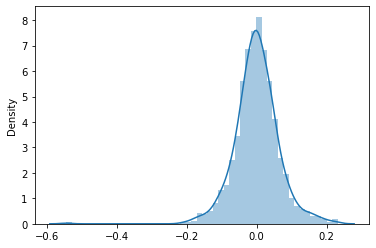

In [116]:
sns.distplot(res)
plt.show()

# Let test and Predict with help of the model created

In [117]:
#list of the numeric variables
print(numeric_scalable_vars)

#scaling the numeric variables using fit_transform

housing_data_test[numeric_scalable_vars] = mm_scaler.transform(housing_data_test[numeric_scalable_vars])
housing_data_test.head()
housing_data_test.describe()

['EnclosedPorch', 'PoolArea', '1stFlrSF', 'BsmtUnfSF', 'YearBuilt', '2ndFlrSF', 'MiscVal', 'LotArea', 'ScreenPorch', 'GrLivArea', 'LowQualFinSF', 'SalePrice', 'OpenPorchSF', 'WoodDeckSF', 'LotFrontage', 'MasVnrArea', 'BsmtFinSF2', 'GarageArea', '3SsnPorch', 'BsmtFinSF1']


LotFrontage     LotArea   YearBuilt  MasVnrArea  BsmtFinSF1  \
count   438.000000  438.000000  438.000000  438.000000  438.000000   
mean      0.500804    0.457970    0.613503    0.202395    0.332496   
std       0.237313    0.248899    0.311872    0.303708    0.323039   
min       0.000000    0.000000    0.000000    0.000000    0.000000   
25%       0.353417    0.315151    0.417582    0.000000    0.000000   
50%       0.500367    0.431230    0.615385    0.000000    0.282967   
75%       0.647318    0.595360    0.934066    0.381579    0.557104   
max       1.000000    1.000000    1.000000    1.000000    1.000000   

       BsmtFinSF2   BsmtUnfSF    1stFlrSF    2ndFlrSF  LowQualFinSF  \
count  438.000000  438.000000  438.000000  438.000000         438.0   
mean     0.074350    0.385084    0.404915    0.304793           0.0   
std      0.234519    0.271972    0.278058    0.370168           0.0   
min      0.000000    0.000000    0.000000    0.000000           0.0   
25%      0.000000    0.173365    0.196020    0.000000           0.0   
50%      0.000000    0.340940    0.358759    0.000000           0.0   
75%      0.000000    0.551431    0.578261    0.650059           0.0   
max      1.000000    1.000000    1.000000    1.000000           0.0   

        GrLivArea  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  \
count  438.000000  438.000000  438.000000   438.000000     438.000000   
mean     0.403554    0.553951    0.275097     0.239281       0.091625   
std      0.284825    0.239974    0.329105     0.299810       0.260839   
min      0.000000    0.000000    0.000000     0.000000       0.000000   
25%      0.168871    0.395248    0.000000     0.000000       0.000000   
50%      0.375749    0.553464    0.000000     0.137104       0.000000   
75%      0.585254    0.677567    0.537313     0.375607       0.000000   
max      1.000000    1.000000    1.000000     1.000000       1.000000   

       3SsnPorch  ScreenPorch  PoolArea  MiscVal   SalePrice  MSZoning_FV  \
count      438.0   438.000000     438.0    438.0  438.000000   438.000000   
mean         0.0     0.074857       0.0      0.0    0.376515     0.045662   
std          0.0     0.252487       0.0      0.0    0.267987     0.208990   
min          0.0     0.000000       0.0      0.0    0.000000     0.000000   
25%          0.0     0.000000       0.0      0.0    0.185321     0.000000   
50%          0.0     0.000000       0.0      0.0    0.323709     0.000000   
75%          0.0     0.000000       0.0      0.0    0.525672     0.000000   
max          0.0     1.000000       0.0      0.0    1.000000     1.000000   

       MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Pave  LotShape_IR2  \
count   438.000000   438.000000   438.000000   438.000000    438.000000   
mean      0.006849     0.794521     0.146119     0.995434      0.022831   
std       0.082571     0.404514     0.353629     0.067496      0.149535   
min       0.000000     0.000000     0.000000     0.000000      0.000000   
25%       0.000000     1.000000     0.000000     1.000000      0.000000   
50%       0.000000     1.000000     0.000000     1.000000      0.000000   
75%       0.000000     1.000000     0.000000     1.000000      0.000000   
max       1.000000     1.000000     1.000000     1.000000      1.000000   

       LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  \
count    438.000000    438.000000       438.000000       438.000000   
mean       0.002283      0.632420         0.034247         0.015982   
std        0.047782      0.482697         0.182070         0.125548   
min        0.000000      0.000000         0.000000         0.000000   
25%        0.000000      0.000000         0.000000         0.000000   
50%        0.000000      1.000000         0.000000         0.000000   
75%        0.000000      1.000000         0.000000         0.000000   
max        1.000000      1.000000         1.000000         1.000000   

       LandContour_Lvl  Utilities_NoSeWa  LotConfig_CulDSac  LotConf

In [118]:
y_test = housing_data_test.pop('SalePrice')
x_test = housing_data_test
x_test = x_test.drop(['KitchenAbvGr_zero_kitchen_above_grd','Fence_MnPrv','FireplaceQu_TA','FireplaceQu_Po','FullBath_two_bath_above_grd',
                       'SaleType_Oth','GarageCond_Po','BsmtHalfBath_two_half_bath','LotShape_IR2','1stFlrSF','BsmtFinSF2',
                       'PoolArea','EnclosedPorch','BsmtFinType1_BLQ','Condition1_RRNe','Exterior1st_CemntBd','Heating_GasA','FullBath_zero_bath_above_grd',
                      'Exterior1st_BrkComm','GarageCars_zero_car_capacity','GarageQual_No_Garage','GarageType_No_Garage',
                    'GarageFinish_No_Garage','BsmtQual_Gd','BsmtQual_No_Basement','LowQualFinSF','LotFrontage',
                    'BsmtFinType1_No_Basement','SaleCondition_Partial','FireplaceQu_No_Fireplace','OverallCond_Very Poor','BsmtCond_Po',
                      'FireplaceQu_No_Fireplace'],axis=1)

#add constant to test

x_test_constant = sm.add_constant(x_test)

In [119]:
#predicting the test data with the model
y_test_pred = lm.predict(x_test_constant)
y_test_pred.head()

1436    0.096128
57      0.446680
780     0.285246
382     0.496041
1170   -0.678100
dtype: float64

In [120]:
#Finally evaluating the model
r2_score(y_true=y_test,y_pred=y_test_pred)

0.8044674041186448

Text(0, 0.5, 'y_pred')

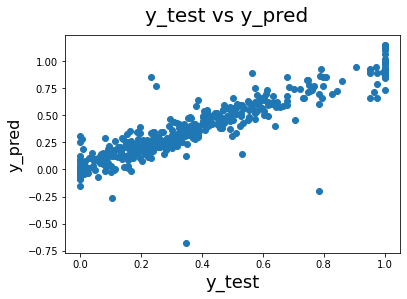

In [121]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)  

# We can clearly see that there is an overfit and we are not getting good result for the test data
# Hence lets apply Ridge and Lasso Regression

## Applying Ridge regression

In [138]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
ridge_model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [139]:
print(ridge_model_cv.best_params_)
print(ridge_model_cv.best_score_)

{'alpha': 3.0}
-0.06286237486988462


## Fitting the Ridge model for alpha = 3.0

In [140]:
alpha = 3.0
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)
ridge.coef_

array([ 7.05010012e-02,  1.02422007e-01,  3.02975785e-02,  9.81334259e-02,
        5.21428967e-02,  6.19184425e-02,  3.47795373e-01,  1.06743571e-01,
        2.30630452e-02,  2.35605755e-02,  0.00000000e+00,  1.45907335e-02,
        0.00000000e+00,  1.97814992e-02,  3.71572675e-02,  2.32831775e-02,
        1.13154640e-02,  1.60166806e-02, -1.90448298e-03,  3.45225753e-03,
        5.05414596e-02,  3.23521190e-02,  3.82875570e-02, -3.29312572e-02,
        2.31350591e-02, -2.48300348e-02, -2.51022668e-02, -4.95210727e-03,
        2.39720335e-02,  2.38723006e-02, -1.96761898e-02,  3.70910706e-02,
        2.22587022e-02, -8.10218606e-03, -4.25061342e-02,  7.22549835e-03,
        3.20055423e-02, -4.80755168e-02, -2.71136444e-02, -6.46971369e-02,
       -2.42929073e-02,  4.41148036e-02,  3.90342054e-02, -5.01030908e-03,
       -9.31490079e-03, -2.53946962e-02,  7.52730076e-03,  4.70908829e-03,
       -1.88991945e-02, -3.00326071e-02,  1.19823088e-01, -4.25230934e-02,
        2.97730988e-02, -

In [141]:
from sklearn.metrics import r2_score, mean_squared_error

y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(x_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)

metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
metric.append(mse_test_lr**0.5)

In [142]:
print(metric)

[0.9348390239901754, 0.8850704050878243, 4.935222794209846, 3.6069567937076563, 0.06952492203340521, 0.09074723782489763]


In [143]:
# ridge model parameters
model_parameters = list(ridge.coef_)
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = x_test.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', -0.156),
 ('LotArea', 0.071),
 ('YearBuilt', 0.102),
 ('MasVnrArea', 0.03),
 ('BsmtFinSF1', 0.098),
 ('BsmtUnfSF', 0.052),
 ('2ndFlrSF', 0.062),
 ('GrLivArea', 0.348),
 ('GarageArea', 0.107),
 ('WoodDeckSF', 0.023),
 ('OpenPorchSF', 0.024),
 ('3SsnPorch', 0.0),
 ('ScreenPorch', 0.015),
 ('MiscVal', 0.0),
 ('MSZoning_FV', 0.02),
 ('MSZoning_RH', 0.037),
 ('MSZoning_RL', 0.023),
 ('MSZoning_RM', 0.011),
 ('Street_Pave', 0.016),
 ('LotShape_IR3', -0.002),
 ('LotShape_Reg', 0.003),
 ('LandContour_HLS', 0.051),
 ('LandContour_Low', 0.032),
 ('LandContour_Lvl', 0.038),
 ('Utilities_NoSeWa', -0.033),
 ('LotConfig_CulDSac', 0.023),
 ('LotConfig_FR2', -0.025),
 ('LotConfig_FR3', -0.025),
 ('LotConfig_Inside', -0.005),
 ('LandSlope_Mod', 0.024),
 ('LandSlope_Sev', 0.024),
 ('Condition1_Feedr', -0.02),
 ('Condition1_Norm', 0.037),
 ('Condition1_PosA', 0.022),
 ('Condition1_PosN', -0.008),
 ('Condition1_RRAe', -0.043),
 ('Condition1_RRAn', 0.007),
 ('Condition1_RRNn', 0.032),
 ('Bldg

## Applying the Lasso Regression

In [144]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


lasso = Lasso()

# cross validation
folds = 5
lasso_model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
lasso_model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [145]:
print(lasso_model_cv.best_params_)
print(lasso_model_cv.best_score_)

{'alpha': 0.0001}
-0.062241492736137896


## Fit the Lasso for alpha = 0.0001

In [146]:
alpha = 0.0001
lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train)
lasso.coef_

array([ 6.04683235e-02,  1.57872972e-01,  3.12836901e-02,  7.89671893e-02,
        2.70450872e-02,  2.19818136e-02,  4.40226851e-01,  1.27945236e-01,
        2.25588448e-02,  2.00000655e-02,  0.00000000e+00,  1.08126274e-02,
        0.00000000e+00,  0.00000000e+00,  2.86277466e-02,  1.34200645e-02,
        0.00000000e+00,  1.72404579e-02,  3.28361977e-02,  2.68596244e-03,
        4.76029658e-02,  2.77160110e-02,  3.18955735e-02, -0.00000000e+00,
        1.85974181e-02, -1.73776370e-02, -7.26053116e-03, -5.48135189e-03,
        1.74329407e-02,  0.00000000e+00, -1.11558222e-02,  3.75093550e-02,
        9.78493219e-05, -5.51528470e-03, -4.41572279e-02,  0.00000000e+00,
        1.31674097e-02, -3.84871072e-02, -3.42766492e-02, -6.83435996e-02,
       -2.20898862e-02,  5.44344350e-02,  3.15828638e-02, -1.15064061e-03,
       -0.00000000e+00, -2.08405101e-02,  3.25111728e-03,  0.00000000e+00,
       -1.90255226e-02, -2.97819302e-02,  1.65557961e-01, -5.72830503e-02,
        3.24198975e-02, -

In [147]:
from sklearn.metrics import r2_score, mean_squared_error

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(x_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)

metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
metric.append(mse_test_lr**0.5)

In [148]:
print(metric)

[0.940143385620043, 0.8407993370473923, 4.533476104281385, 4.996362453365239, 0.06663506020160764, 0.10680458891434697]


In [149]:
# lasso model parameters
model_parameters = list(lasso.coef_)
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = x_test.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', -0.142),
 ('LotArea', 0.06),
 ('YearBuilt', 0.158),
 ('MasVnrArea', 0.031),
 ('BsmtFinSF1', 0.079),
 ('BsmtUnfSF', 0.027),
 ('2ndFlrSF', 0.022),
 ('GrLivArea', 0.44),
 ('GarageArea', 0.128),
 ('WoodDeckSF', 0.023),
 ('OpenPorchSF', 0.02),
 ('3SsnPorch', 0.0),
 ('ScreenPorch', 0.011),
 ('MiscVal', 0.0),
 ('MSZoning_FV', 0.0),
 ('MSZoning_RH', 0.029),
 ('MSZoning_RL', 0.013),
 ('MSZoning_RM', 0.0),
 ('Street_Pave', 0.017),
 ('LotShape_IR3', 0.033),
 ('LotShape_Reg', 0.003),
 ('LandContour_HLS', 0.048),
 ('LandContour_Low', 0.028),
 ('LandContour_Lvl', 0.032),
 ('Utilities_NoSeWa', -0.0),
 ('LotConfig_CulDSac', 0.019),
 ('LotConfig_FR2', -0.017),
 ('LotConfig_FR3', -0.007),
 ('LotConfig_Inside', -0.005),
 ('LandSlope_Mod', 0.017),
 ('LandSlope_Sev', 0.0),
 ('Condition1_Feedr', -0.011),
 ('Condition1_Norm', 0.038),
 ('Condition1_PosA', 0.0),
 ('Condition1_PosN', -0.006),
 ('Condition1_RRAe', -0.044),
 ('Condition1_RRAn', 0.0),
 ('Condition1_RRNn', 0.013),
 ('BldgType_2fmCon',

# So for Ridge it comes
## The train r2 = 0.93
## The test r2 = 0.88

# So for Ridge it comes
## The train r2 = 0.94
## The test r2 = 0.84